# **Preprocessing**  ⬇

In [1]:
import pandas as pd

# Load the dataset
file_path = "/content/data.xlsx"
df = pd.read_excel(file_path)

# Clean and select relevant columns
df = df.rename(columns=lambda x: x.strip())
cols = ['MW', '#Atoms', 'SlogP', 'TPSA', 'Flexibility', '#RB', 'HBA', 'HBD',
        'LF Rank Score', 'LF dG', 'LF VSscore', 'LF LE']
df = df[cols].dropna()

# Display the first few rows of the preprocessed DataFrame
display(df.head())

MW  #Atoms  SlogP  TPSA  Flexibility  #RB  HBA  HBD  LF Rank Score  \
0  420.9      30    5.0  59.8          4.3    6    5    1      -7.340935   
1  441.3      30    5.6  59.8          2.5    5    5    1      -8.670093   
2  463.4      34    5.1  85.8          0.8    5    7    1     -12.800061   
3  420.9      30    5.0  59.8          4.3    6    5    1      -7.239034   
4  425.7      27    4.3  80.0          5.3    7    6    2      -9.608902   

      LF dG  LF VSscore     LF LE  
0 -0.095040  -13.074424 -0.350033  
1  0.053530  -13.554074 -0.330093  
2 -7.848725  -13.034253 -0.307337  
3  0.437465  -12.244012 -0.329180  
4 -3.725348  -11.050295 -0.203120

In [2]:
# Select the relevant columns for outlier detection
relevant_cols = ['MW', '#Atoms', 'SlogP', 'TPSA', 'Flexibility', '#RB', 'HBA', 'HBD',
                 'LF Rank Score', 'LF dG', 'LF VSscore', 'LF LE']

# Create a copy to avoid modifying the original DataFrame
df_cleaned = df.copy()

# Identify and remove outliers for each relevant column
for col in relevant_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify outliers
    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]

    # Remove outliers
    df_cleaned = df_cleaned.drop(outliers.index)

# Display the shape of the DataFrame before and after outlier removal
print(f"Shape before outlier removal: {df.shape}")
print(f"Shape after outlier removal: {df_cleaned.shape}")

# Display the first few rows of the cleaned DataFrame
display(df_cleaned.head())

Shape before outlier removal: (398, 12)
Shape after outlier removal: (374, 12)


MW  #Atoms  SlogP  TPSA  Flexibility  #RB  HBA  HBD  LF Rank Score  \
0  420.9      30    5.0  59.8          4.3    6    5    1      -7.340935   
1  441.3      30    5.6  59.8          2.5    5    5    1      -8.670093   
2  463.4      34    5.1  85.8          0.8    5    7    1     -12.800061   
3  420.9      30    5.0  59.8          4.3    6    5    1      -7.239034   
4  425.7      27    4.3  80.0          5.3    7    6    2      -9.608902   

      LF dG  LF VSscore     LF LE  
0 -0.095040  -13.074424 -0.350033  
1  0.053530  -13.554074 -0.330093  
2 -7.848725  -13.034253 -0.307337  
3  0.437465  -12.244012 -0.329180  
4 -3.725348  -11.050295 -0.203120

In [3]:
from sklearn.preprocessing import StandardScaler

# Define the features to be scaled (all columns in df_cleaned except the target variables)
features_to_scale = df_cleaned.drop(columns=['LF Rank Score', 'LF dG', 'LF VSscore', 'LF LE']).columns

# Instantiate a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the selected features and transform the data
scaled_features = scaler.fit_transform(df_cleaned[features_to_scale])

# Create a new DataFrame containing the scaled features
df_scaled = pd.DataFrame(scaled_features, columns=features_to_scale, index=df_cleaned.index)

# Display the first few rows of the scaled DataFrame
display(df_scaled.head())

MW    #Atoms     SlogP      TPSA  Flexibility       #RB       HBA  \
0  0.702868  0.558641  1.336518 -1.433161     0.857605  0.503722 -1.381755   
1  1.139886  0.558641  1.877393 -1.433161    -0.174834 -0.088706 -1.381755   
2  1.613323  1.716157  1.426664 -0.110641    -1.149914 -0.088706 -0.007350   
3  0.702868  0.558641  1.336518 -1.433161     0.857605  0.503722 -1.381755   
4  0.805696 -0.309496  0.705499 -0.405665     1.431182  1.096150 -0.694553   

        HBD  
0 -1.035940  
1 -1.035940  
2 -1.035940  
3 -1.035940  
4  0.431641

In [4]:
from sklearn.model_selection import train_test_split

# Define features (X) using the scaled data and targets (y) using the cleaned data
X = df_scaled
y = df_cleaned[['LF Rank Score', 'LF dG', 'LF VSscore', 'LF LE']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (299, 8)
Shape of X_test: (75, 8)
Shape of y_train: (299, 4)
Shape of y_test: (75, 4)


# **Simple Linear Regression**  ⬇

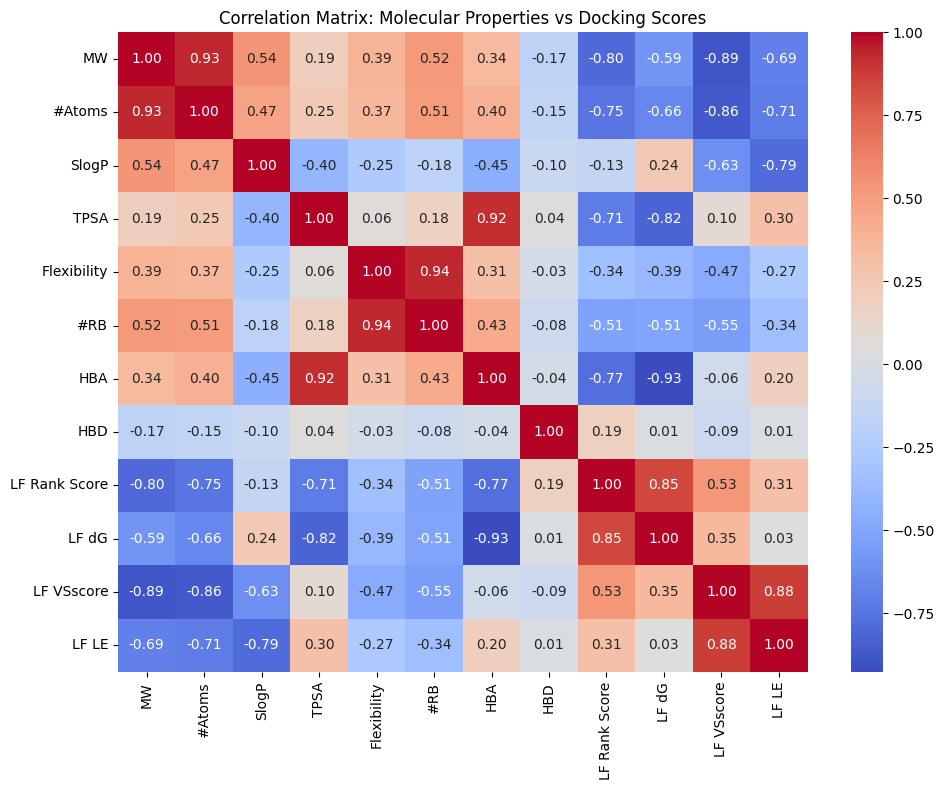


=== MW vs LF Rank Score ===
                            OLS Regression Results                            
Dep. Variable:          LF Rank Score   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     680.9
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           4.77e-88
Time:                        16:07:18   Log-Likelihood:                -971.87
No. Observations:                 398   AIC:                             1948.
Df Residuals:                     396   BIC:                             1956.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.4599  

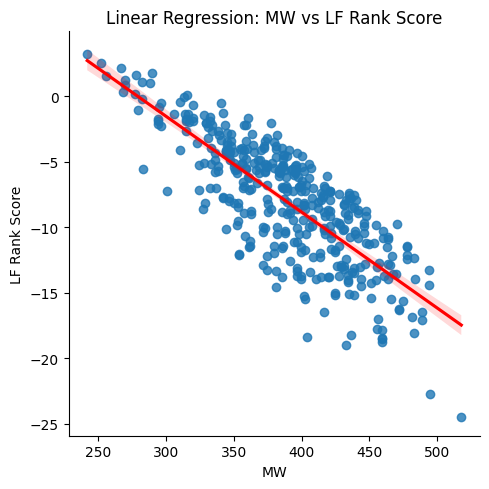

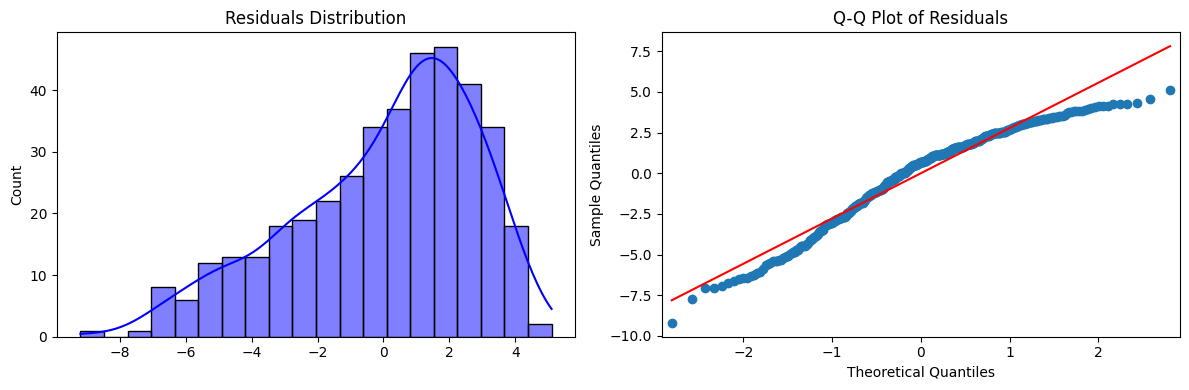


=== MW vs LF dG ===
                            OLS Regression Results                            
Dep. Variable:                  LF dG   R-squared:                       0.349
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     212.3
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           8.15e-39
Time:                        16:07:21   Log-Likelihood:                -1147.9
No. Observations:                 398   AIC:                             2300.
Df Residuals:                     396   BIC:                             2308.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.7369      1.71

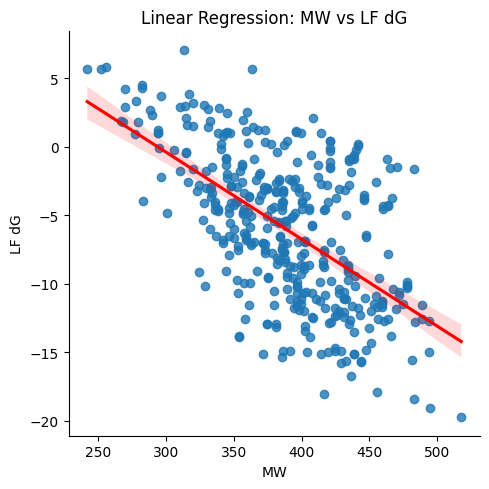

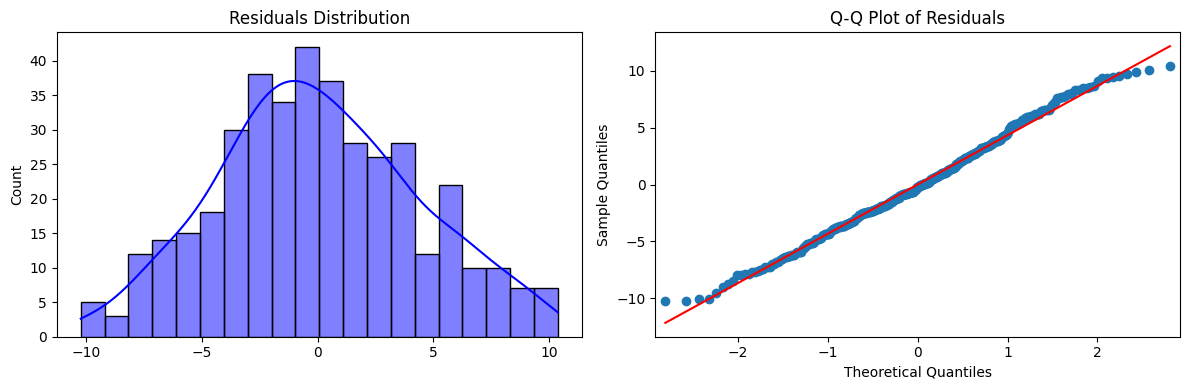


=== MW vs LF VSscore ===
                            OLS Regression Results                            
Dep. Variable:             LF VSscore   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     1499.
Date:                Fri, 31 Oct 2025   Prob (F-statistic):          1.09e-136
Time:                        16:07:22   Log-Likelihood:                -929.80
No. Observations:                 398   AIC:                             1864.
Df Residuals:                     396   BIC:                             1872.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9897     

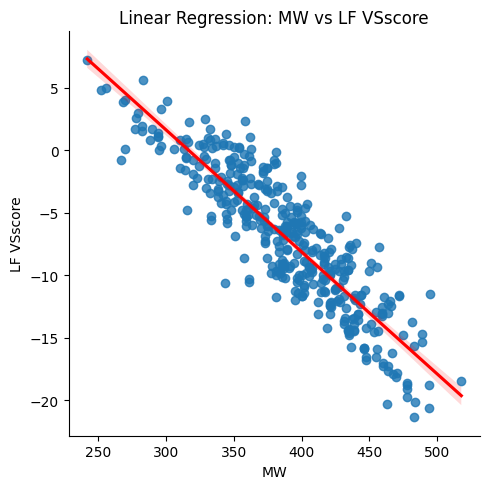

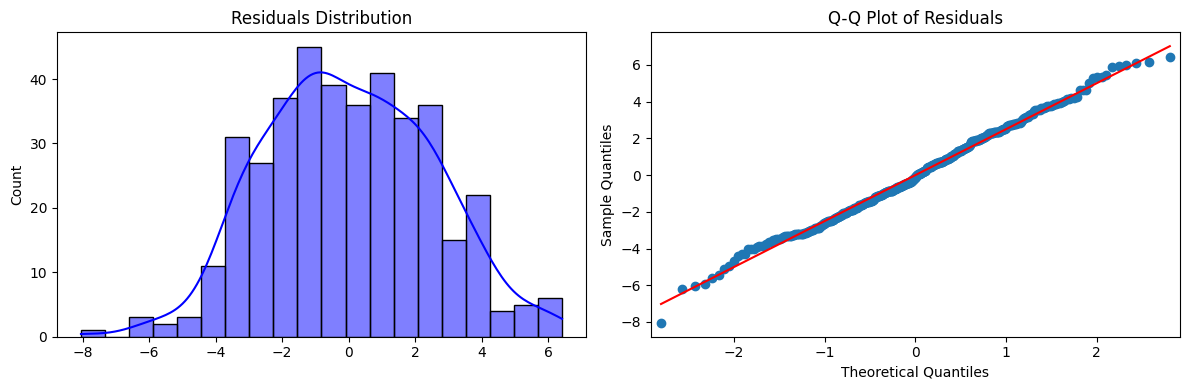


=== MW vs LF LE ===
                            OLS Regression Results                            
Dep. Variable:                  LF LE   R-squared:                       0.474
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     356.5
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           3.63e-57
Time:                        16:07:23   Log-Likelihood:                 569.59
No. Observations:                 398   AIC:                            -1135.
Df Residuals:                     396   BIC:                            -1127.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2280      0.02

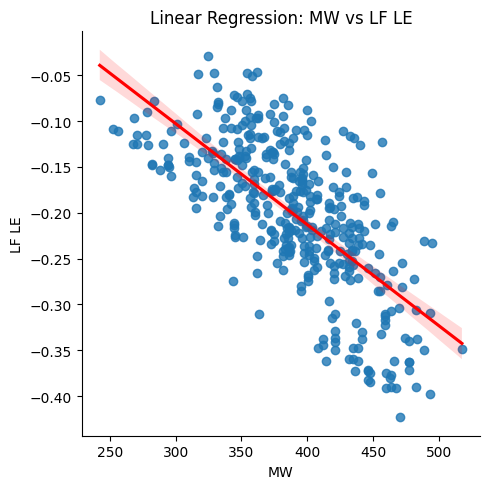

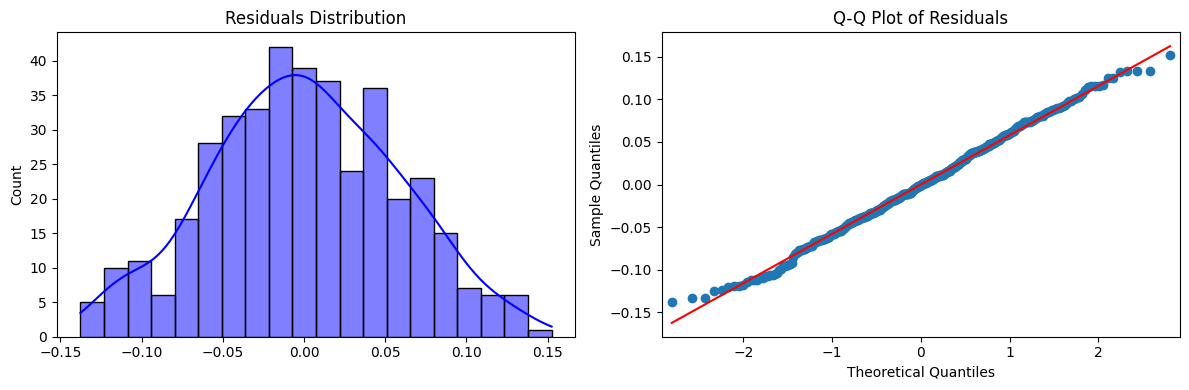


=== #Atoms vs LF Rank Score ===
                            OLS Regression Results                            
Dep. Variable:          LF Rank Score   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     496.2
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           7.55e-72
Time:                        16:07:24   Log-Likelihood:                -1009.3
No. Observations:                 398   AIC:                             2023.
Df Residuals:                     396   BIC:                             2031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.24

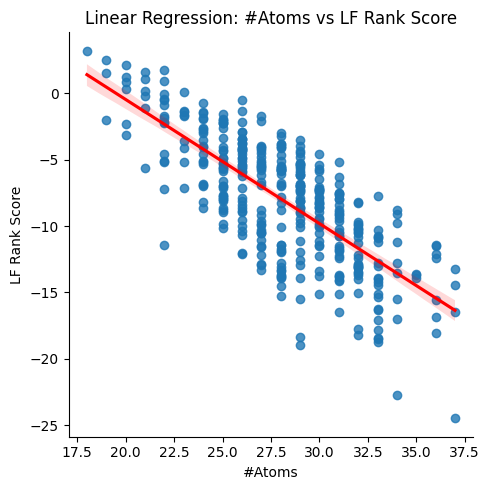

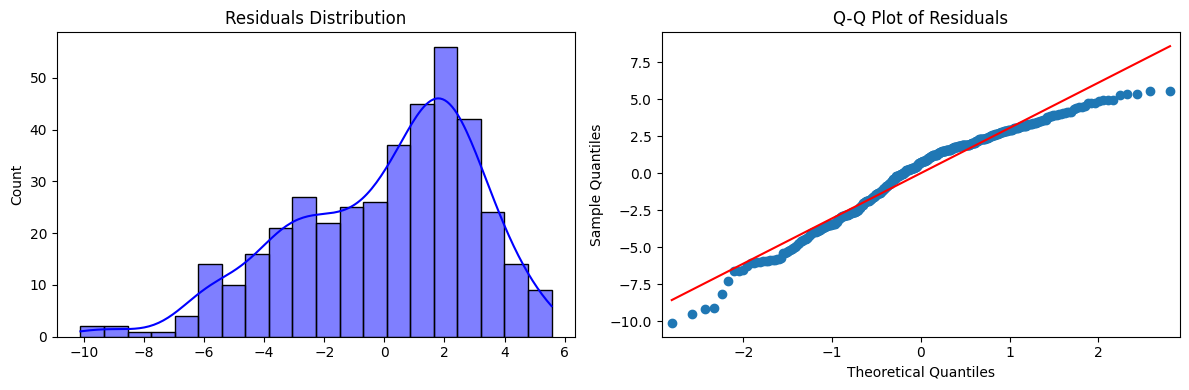


=== #Atoms vs LF dG ===
                            OLS Regression Results                            
Dep. Variable:                  LF dG   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.434
Method:                 Least Squares   F-statistic:                     305.6
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           3.97e-51
Time:                        16:07:25   Log-Likelihood:                -1119.5
No. Observations:                 398   AIC:                             2243.
Df Residuals:                     396   BIC:                             2251.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         21.1719      

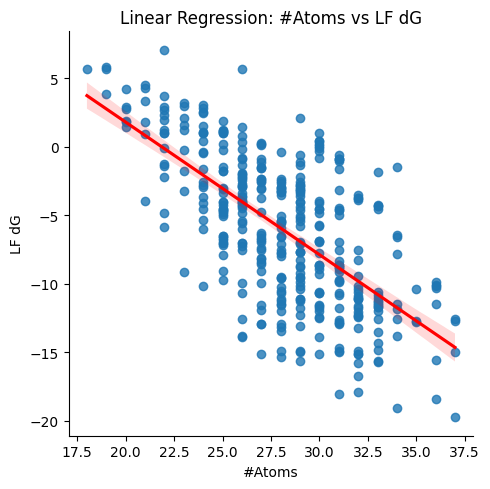

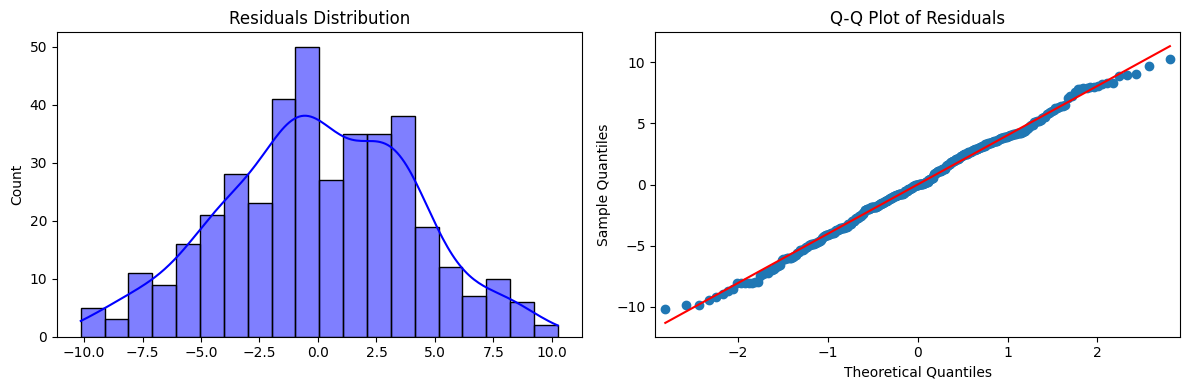


=== #Atoms vs LF VSscore ===
                            OLS Regression Results                            
Dep. Variable:             LF VSscore   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1160.
Date:                Fri, 31 Oct 2025   Prob (F-statistic):          9.86e-120
Time:                        16:07:26   Log-Likelihood:                -969.01
No. Observations:                 398   AIC:                             1942.
Df Residuals:                     396   BIC:                             1950.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         29.2623 

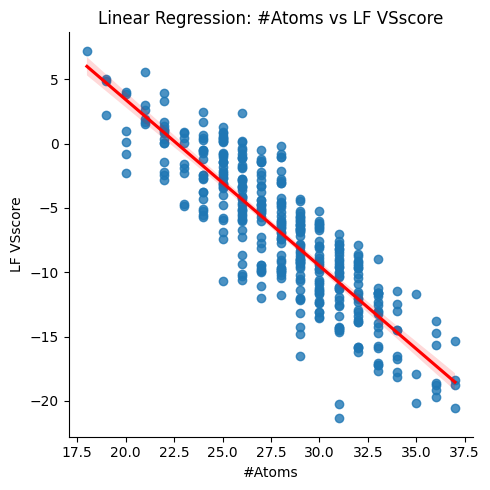

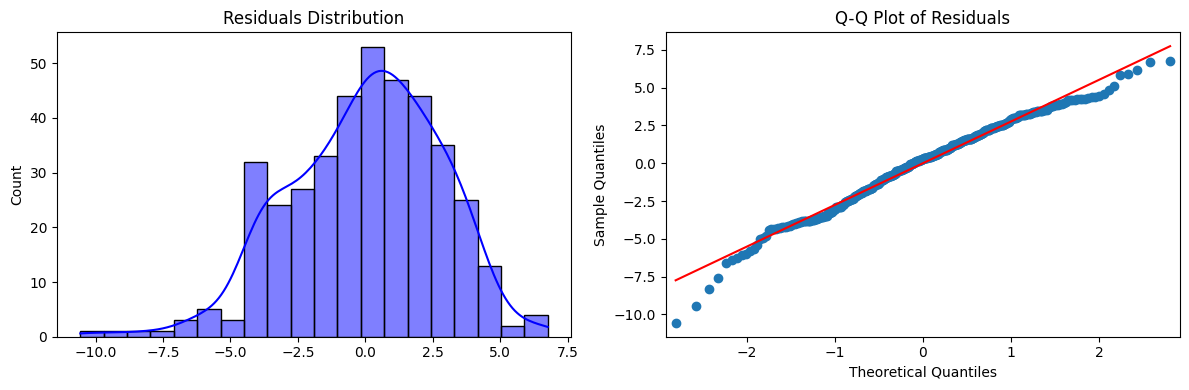


=== #Atoms vs LF LE ===
                            OLS Regression Results                            
Dep. Variable:                  LF LE   R-squared:                       0.509
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     411.1
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           3.34e-63
Time:                        16:07:27   Log-Likelihood:                 583.52
No. Observations:                 398   AIC:                            -1163.
Df Residuals:                     396   BIC:                            -1155.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2364      

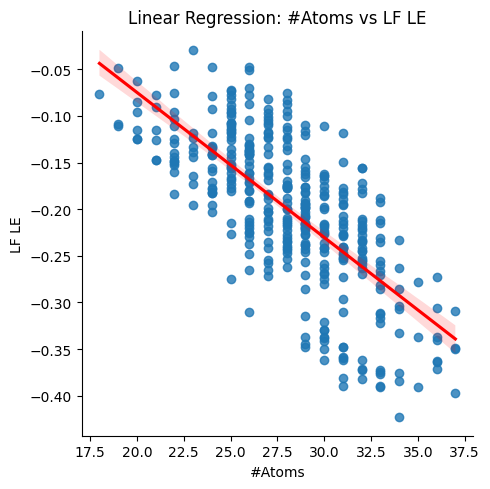

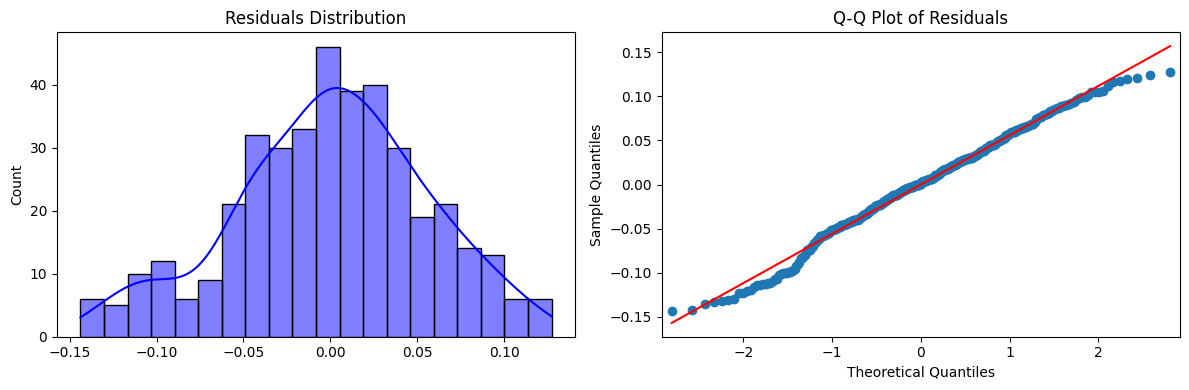


=== SlogP vs LF Rank Score ===
                            OLS Regression Results                            
Dep. Variable:          LF Rank Score   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     6.830
Date:                Fri, 31 Oct 2025   Prob (F-statistic):            0.00931
Time:                        16:07:28   Log-Likelihood:                -1167.5
No. Observations:                 398   AIC:                             2339.
Df Residuals:                     396   BIC:                             2347.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.213

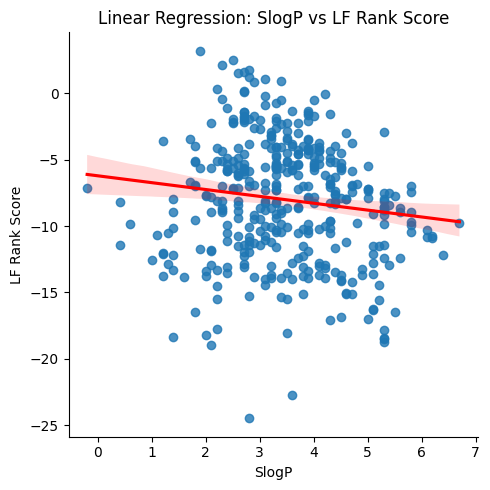

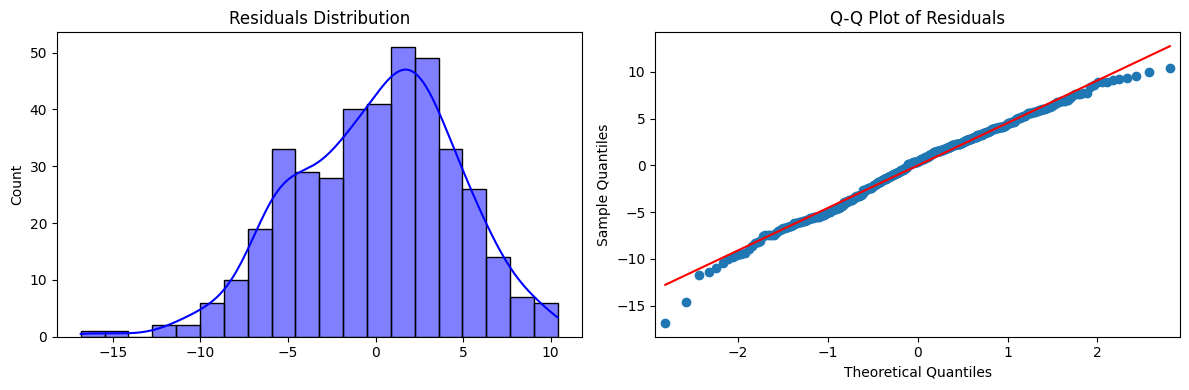


=== SlogP vs LF dG ===
                            OLS Regression Results                            
Dep. Variable:                  LF dG   R-squared:                       0.058
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     24.60
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           1.05e-06
Time:                        16:07:28   Log-Likelihood:                -1221.4
No. Observations:                 398   AIC:                             2447.
Df Residuals:                     396   BIC:                             2455.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9206      0

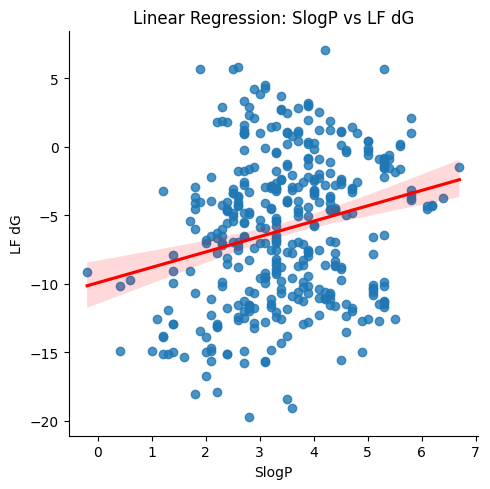

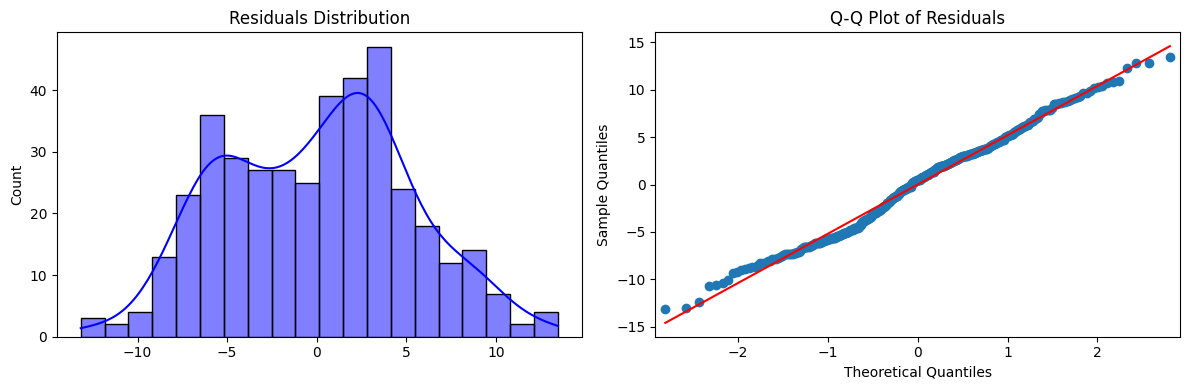


=== SlogP vs LF VSscore ===
                            OLS Regression Results                            
Dep. Variable:             LF VSscore   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     255.2
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           1.09e-44
Time:                        16:07:29   Log-Likelihood:                -1142.4
No. Observations:                 398   AIC:                             2289.
Df Residuals:                     396   BIC:                             2297.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.3073  

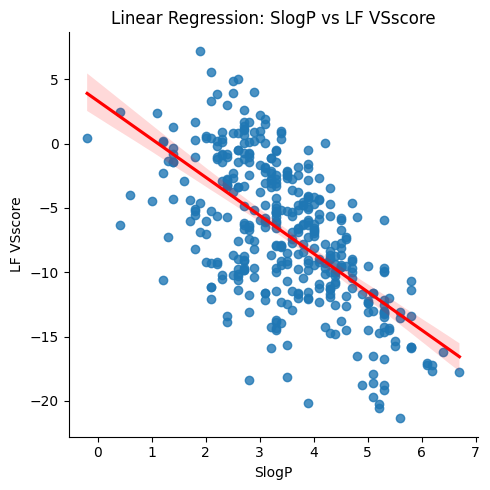

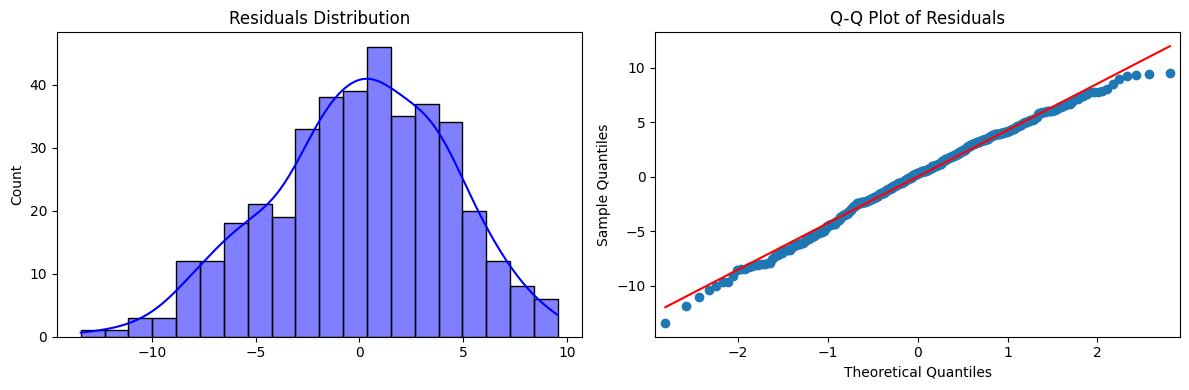


=== SlogP vs LF LE ===
                            OLS Regression Results                            
Dep. Variable:                  LF LE   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     662.5
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           1.44e-86
Time:                        16:07:30   Log-Likelihood:                 637.49
No. Observations:                 398   AIC:                            -1271.
Df Residuals:                     396   BIC:                            -1263.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0103      0

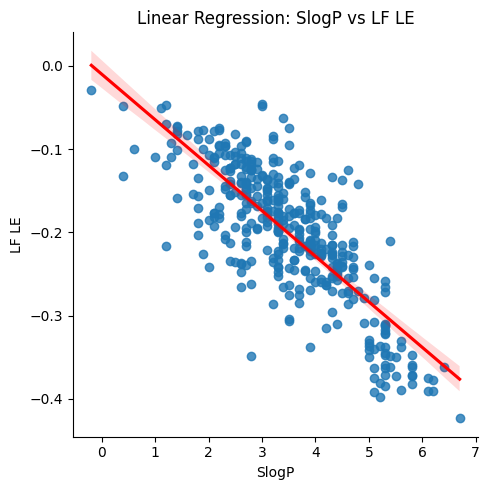

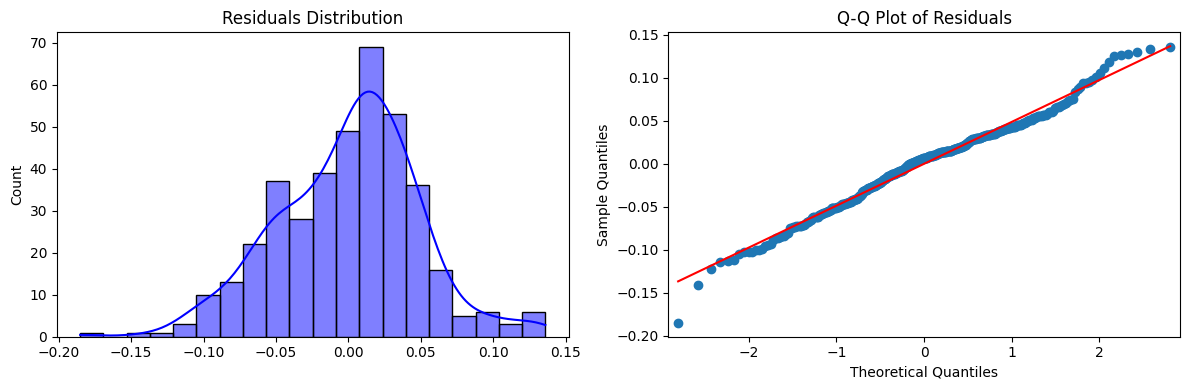


=== TPSA vs LF Rank Score ===
                            OLS Regression Results                            
Dep. Variable:          LF Rank Score   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     407.3
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           8.50e-63
Time:                        16:07:31   Log-Likelihood:                -1030.2
No. Observations:                 398   AIC:                             2064.
Df Residuals:                     396   BIC:                             2072.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.6043

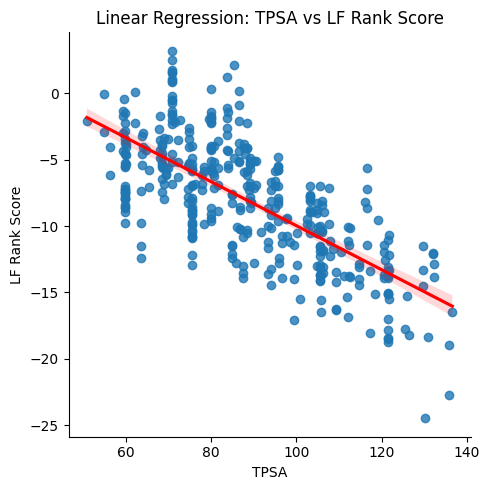

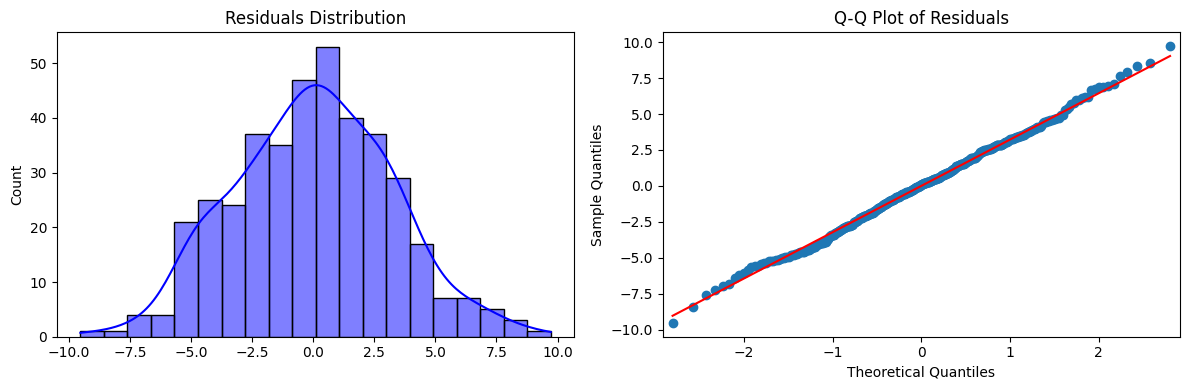


=== TPSA vs LF dG ===
                            OLS Regression Results                            
Dep. Variable:                  LF dG   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     824.9
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           7.33e-99
Time:                        16:07:32   Log-Likelihood:                -1009.3
No. Observations:                 398   AIC:                             2023.
Df Residuals:                     396   BIC:                             2031.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.7285      0.

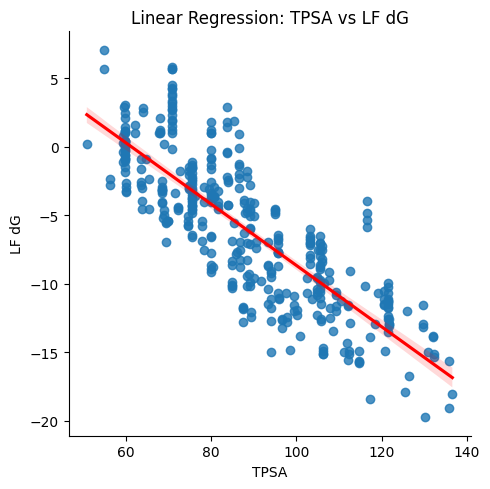

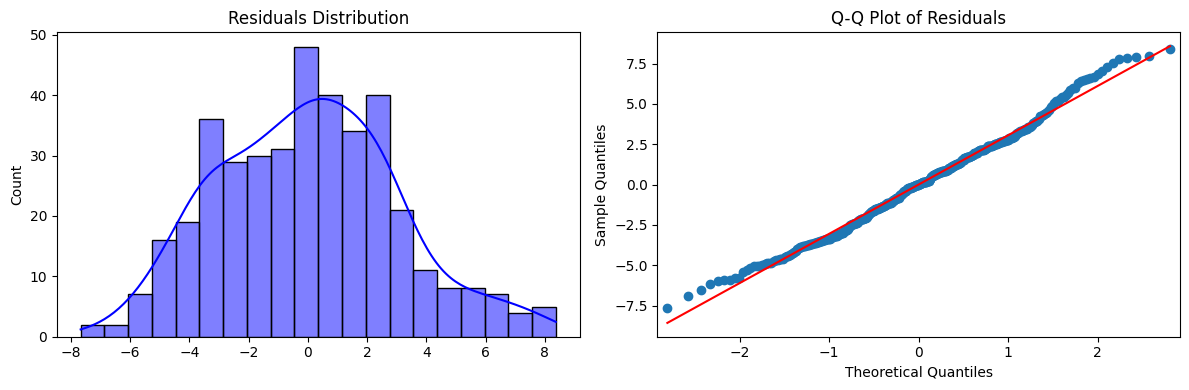


=== TPSA vs LF VSscore ===
                            OLS Regression Results                            
Dep. Variable:             LF VSscore   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     3.682
Date:                Fri, 31 Oct 2025   Prob (F-statistic):             0.0557
Time:                        16:07:32   Log-Likelihood:                -1239.5
No. Observations:                 398   AIC:                             2483.
Df Residuals:                     396   BIC:                             2491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.3701   

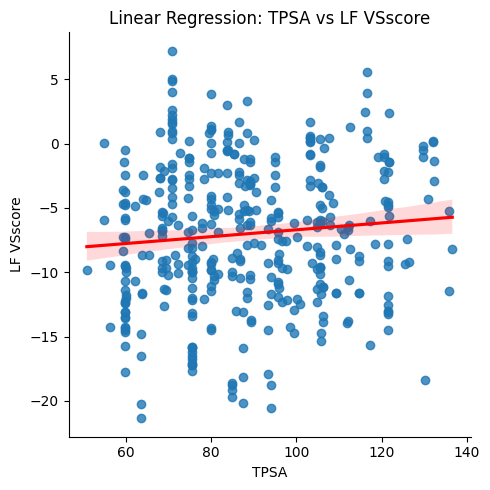

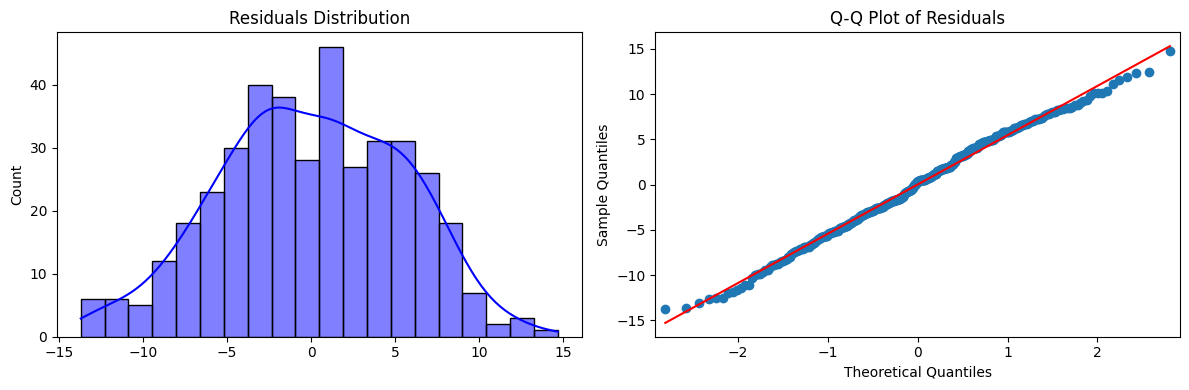


=== TPSA vs LF LE ===
                            OLS Regression Results                            
Dep. Variable:                  LF LE   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     39.45
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           8.85e-10
Time:                        16:07:33   Log-Likelihood:                 460.74
No. Observations:                 398   AIC:                            -917.5
Df Residuals:                     396   BIC:                            -909.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3078      0.

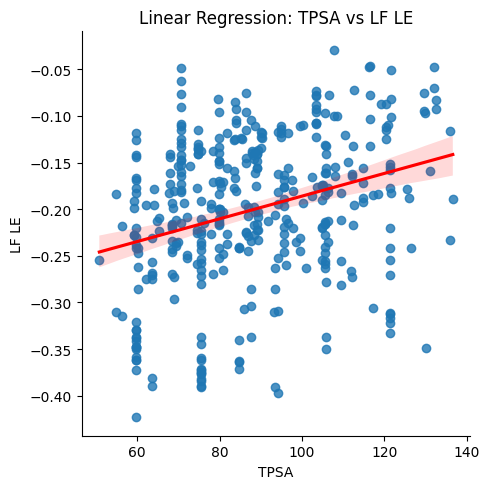

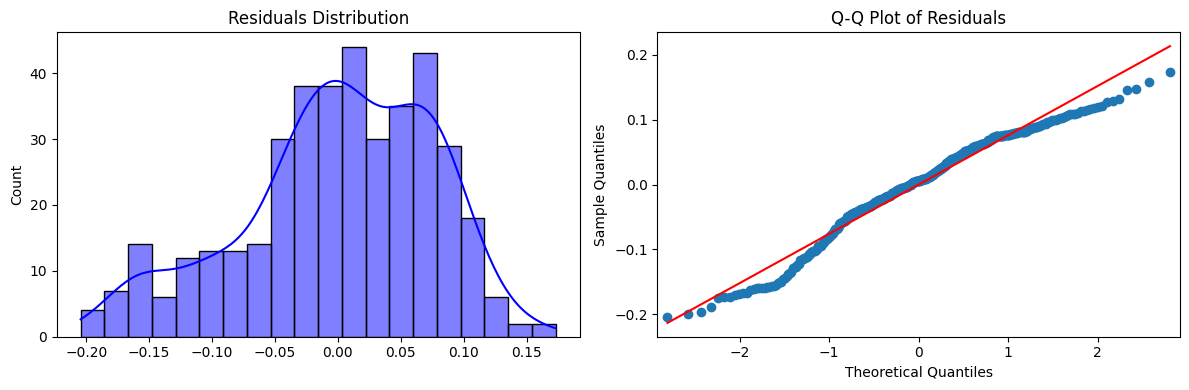


=== Flexibility vs LF Rank Score ===
                            OLS Regression Results                            
Dep. Variable:          LF Rank Score   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.111
Method:                 Least Squares   F-statistic:                     50.38
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           5.89e-12
Time:                        16:07:34   Log-Likelihood:                -1147.1
No. Observations:                 398   AIC:                             2298.
Df Residuals:                     396   BIC:                             2306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       

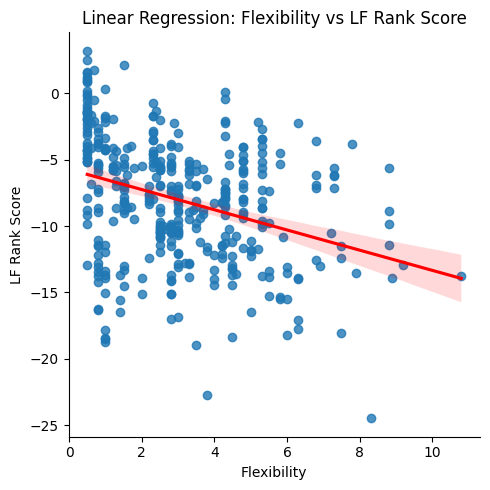

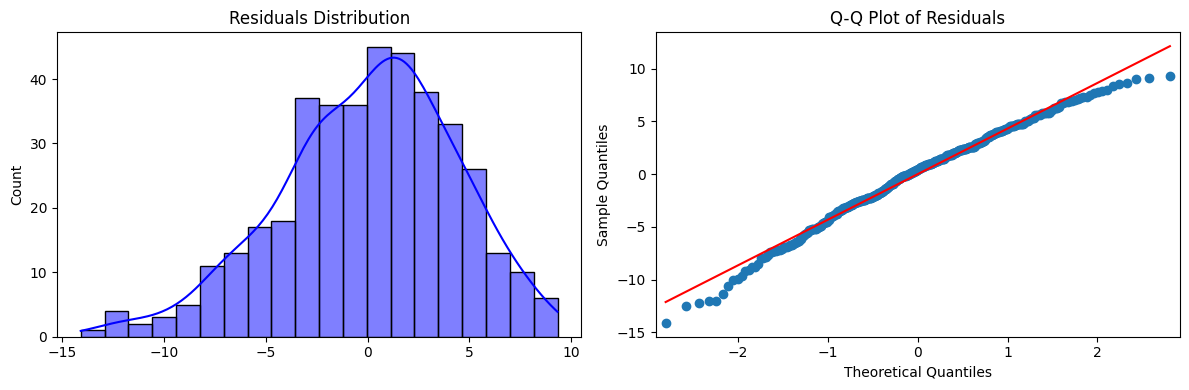


=== Flexibility vs LF dG ===
                            OLS Regression Results                            
Dep. Variable:                  LF dG   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     70.42
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           8.58e-16
Time:                        16:07:35   Log-Likelihood:                -1200.8
No. Observations:                 398   AIC:                             2406.
Df Residuals:                     396   BIC:                             2414.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.91

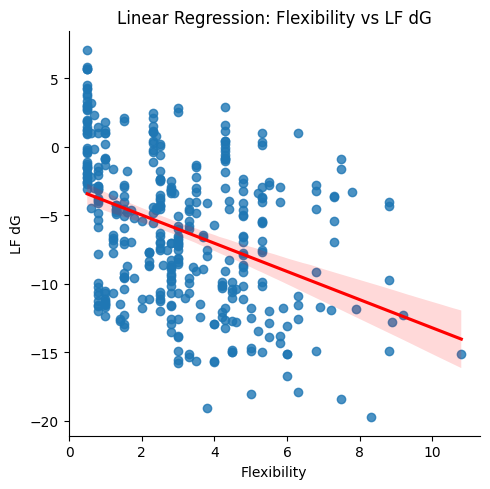

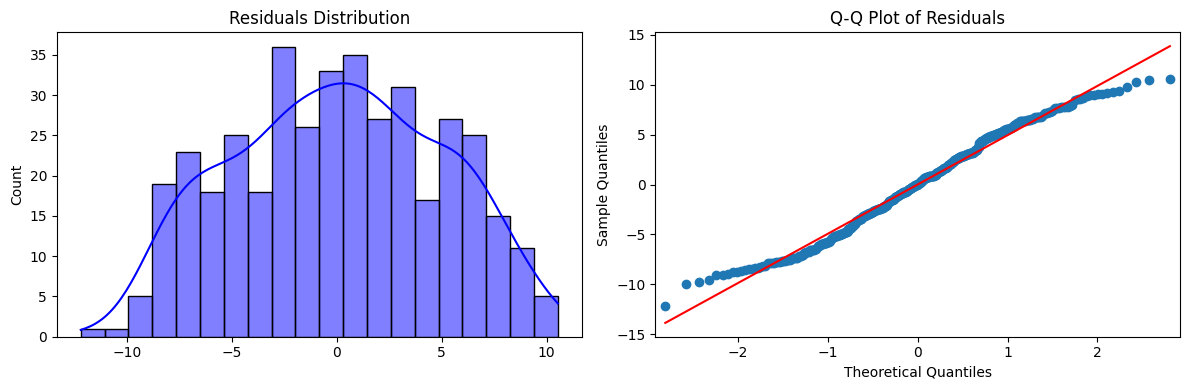


=== Flexibility vs LF VSscore ===
                            OLS Regression Results                            
Dep. Variable:             LF VSscore   R-squared:                       0.224
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     114.2
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           1.35e-23
Time:                        16:07:36   Log-Likelihood:                -1190.9
No. Observations:                 398   AIC:                             2386.
Df Residuals:                     396   BIC:                             2394.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          

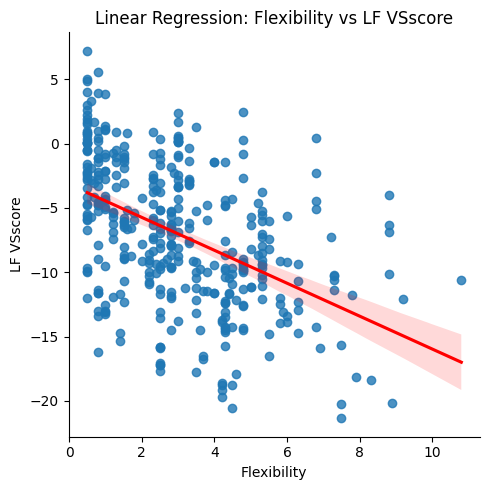

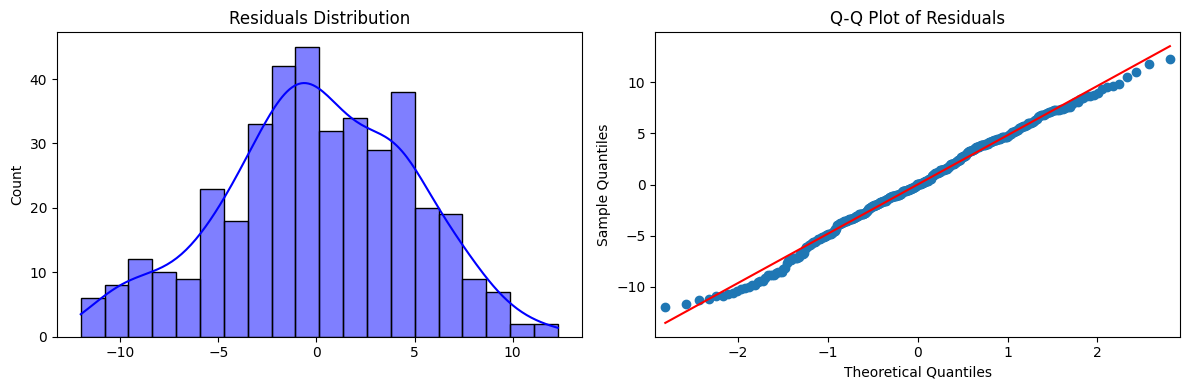


=== Flexibility vs LF LE ===
                            OLS Regression Results                            
Dep. Variable:                  LF LE   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.068
Method:                 Least Squares   F-statistic:                     29.91
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           8.03e-08
Time:                        16:07:36   Log-Likelihood:                 456.33
No. Observations:                 398   AIC:                            -908.7
Df Residuals:                     396   BIC:                            -900.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.16

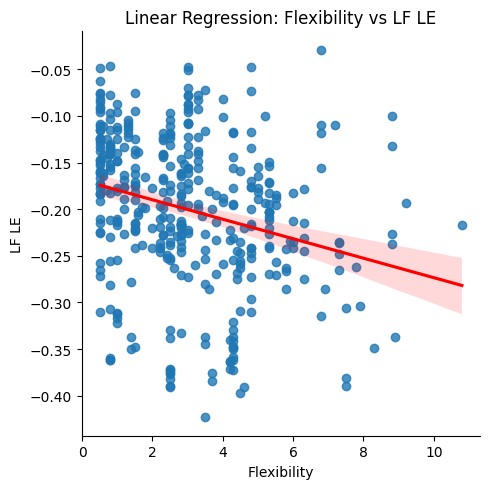

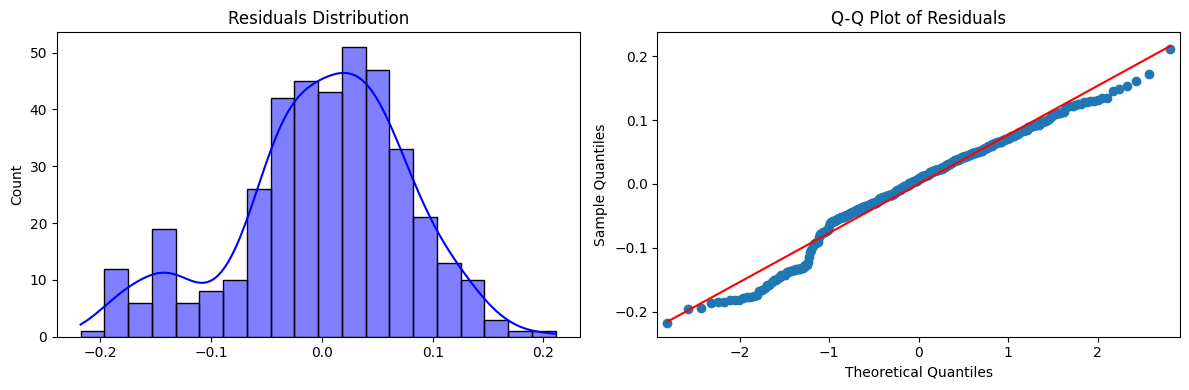


=== #RB vs LF Rank Score ===
                            OLS Regression Results                            
Dep. Variable:          LF Rank Score   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.263
Method:                 Least Squares   F-statistic:                     142.8
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           2.60e-28
Time:                        16:07:37   Log-Likelihood:                -1109.7
No. Observations:                 398   AIC:                             2223.
Df Residuals:                     396   BIC:                             2231.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.6039 

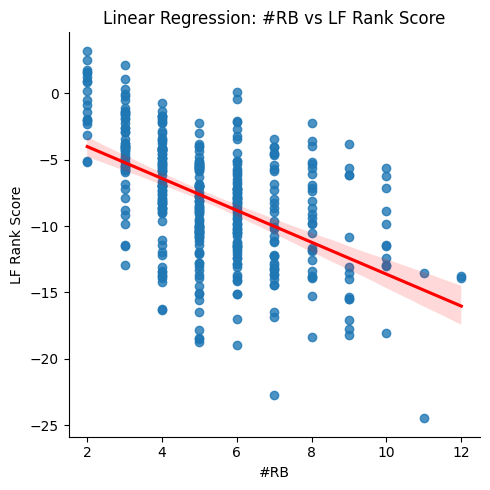

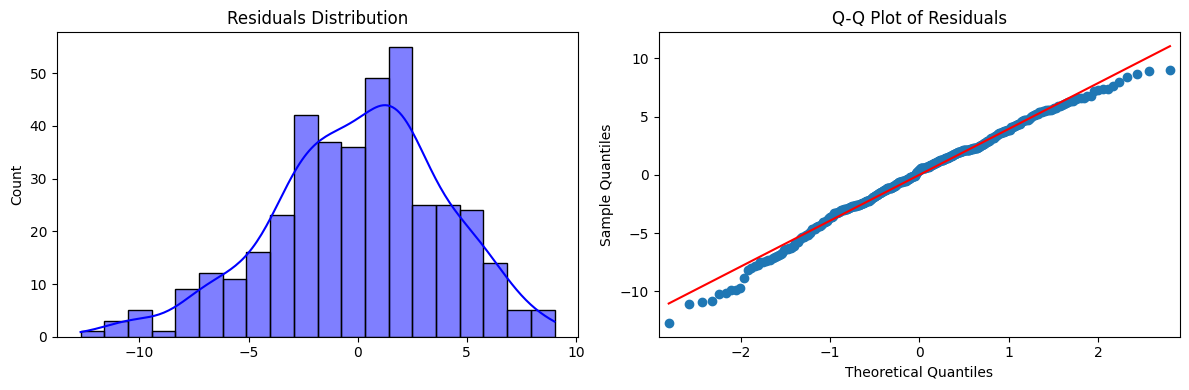


=== #RB vs LF dG ===
                            OLS Regression Results                            
Dep. Variable:                  LF dG   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.261
Method:                 Least Squares   F-statistic:                     141.6
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           4.05e-28
Time:                        16:07:39   Log-Likelihood:                -1172.5
No. Observations:                 398   AIC:                             2349.
Df Residuals:                     396   BIC:                             2357.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4638      0.6

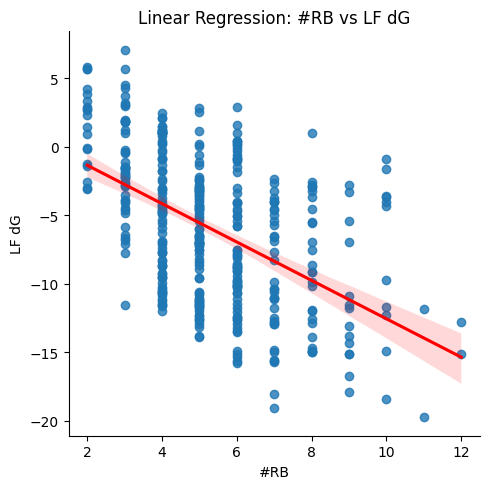

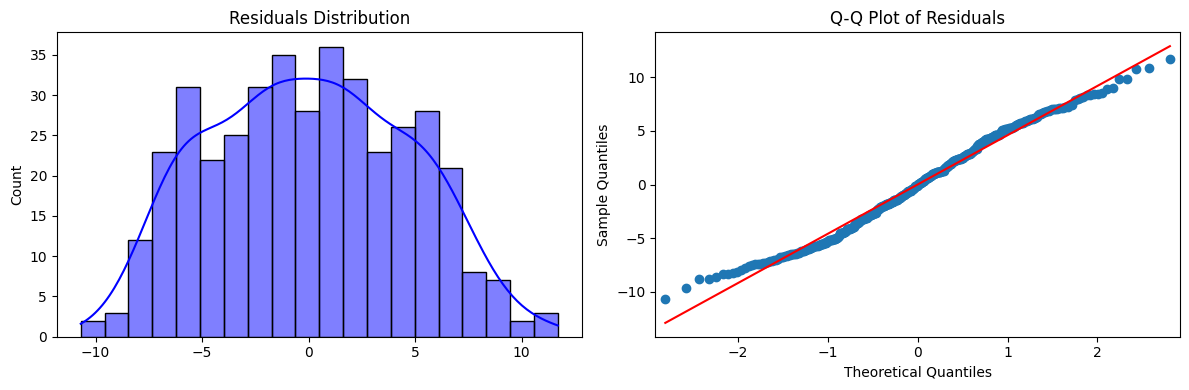


=== #RB vs LF VSscore ===
                            OLS Regression Results                            
Dep. Variable:             LF VSscore   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.301
Method:                 Least Squares   F-statistic:                     171.6
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           7.95e-33
Time:                        16:07:40   Log-Likelihood:                -1169.7
No. Observations:                 398   AIC:                             2343.
Df Residuals:                     396   BIC:                             2351.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1520    

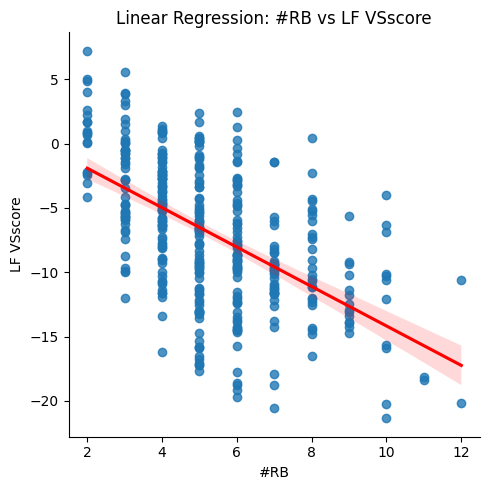

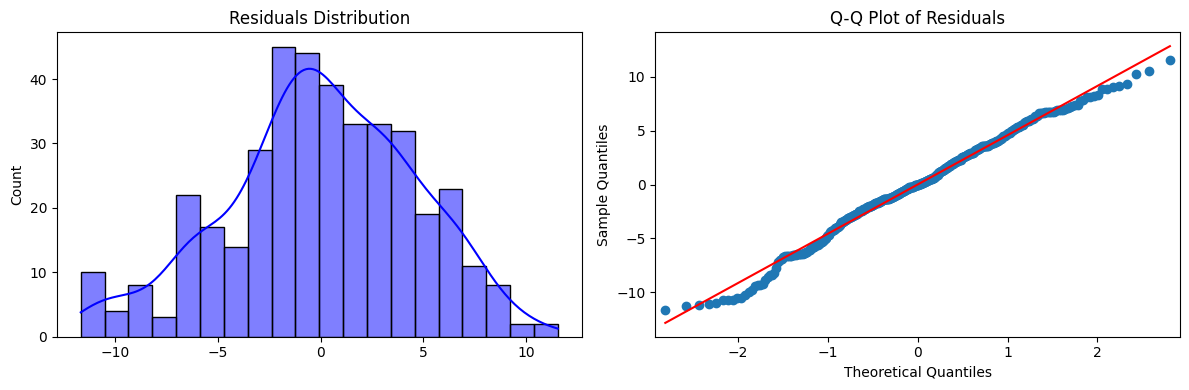


=== #RB vs LF LE ===
                            OLS Regression Results                            
Dep. Variable:                  LF LE   R-squared:                       0.117
Model:                            OLS   Adj. R-squared:                  0.115
Method:                 Least Squares   F-statistic:                     52.49
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           2.28e-12
Time:                        16:07:41   Log-Likelihood:                 466.60
No. Observations:                 398   AIC:                            -929.2
Df Residuals:                     396   BIC:                            -921.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1264      0.0

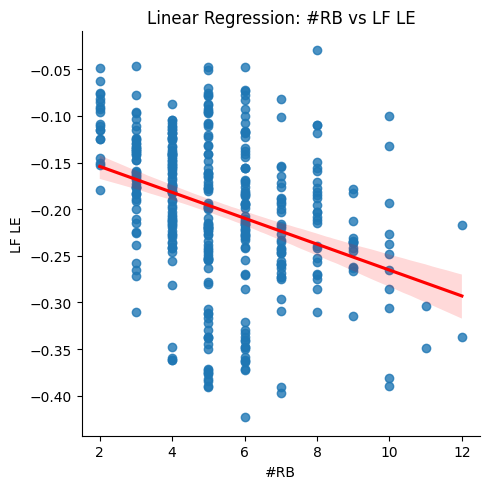

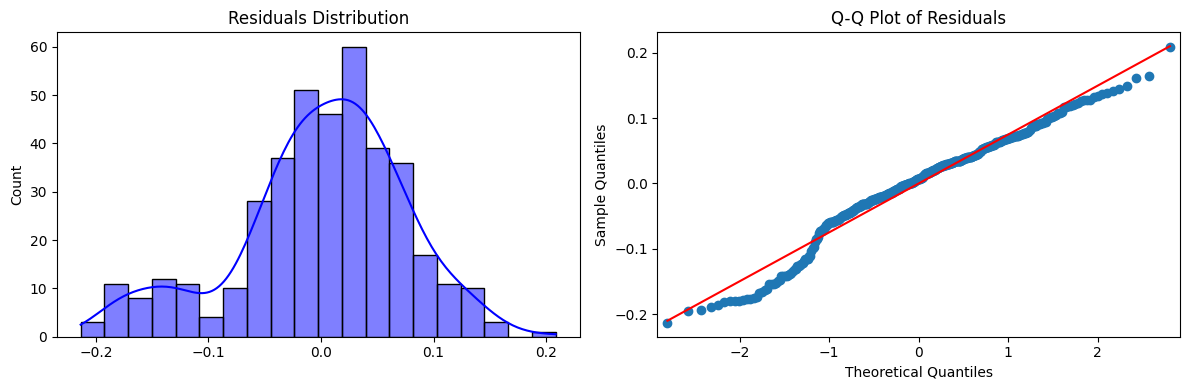


=== HBA vs LF Rank Score ===
                            OLS Regression Results                            
Dep. Variable:          LF Rank Score   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     592.8
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           1.06e-80
Time:                        16:07:41   Log-Likelihood:                -988.84
No. Observations:                 398   AIC:                             1982.
Df Residuals:                     396   BIC:                             1990.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.6218 

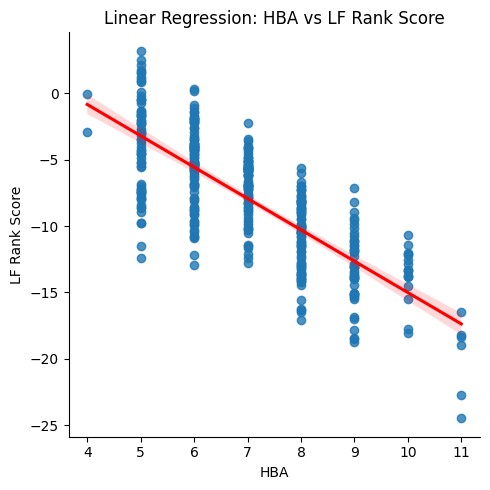

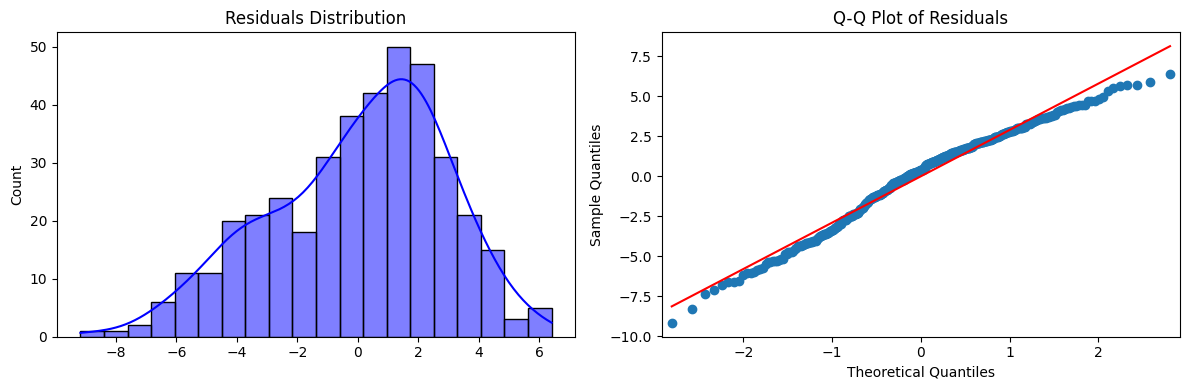


=== HBA vs LF dG ===
                            OLS Regression Results                            
Dep. Variable:                  LF dG   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2443.
Date:                Fri, 31 Oct 2025   Prob (F-statistic):          1.84e-171
Time:                        16:07:42   Log-Likelihood:                -841.39
No. Observations:                 398   AIC:                             1687.
Df Residuals:                     396   BIC:                             1695.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.3022      0.4

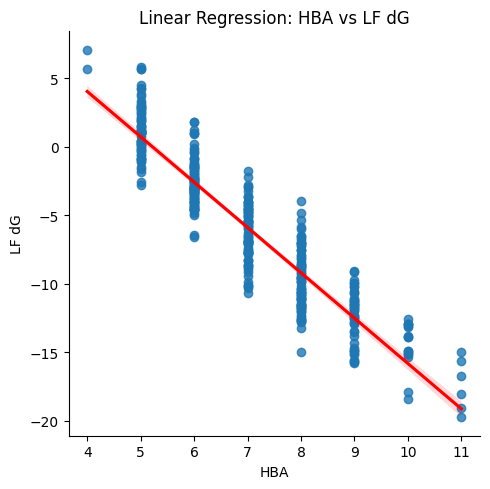

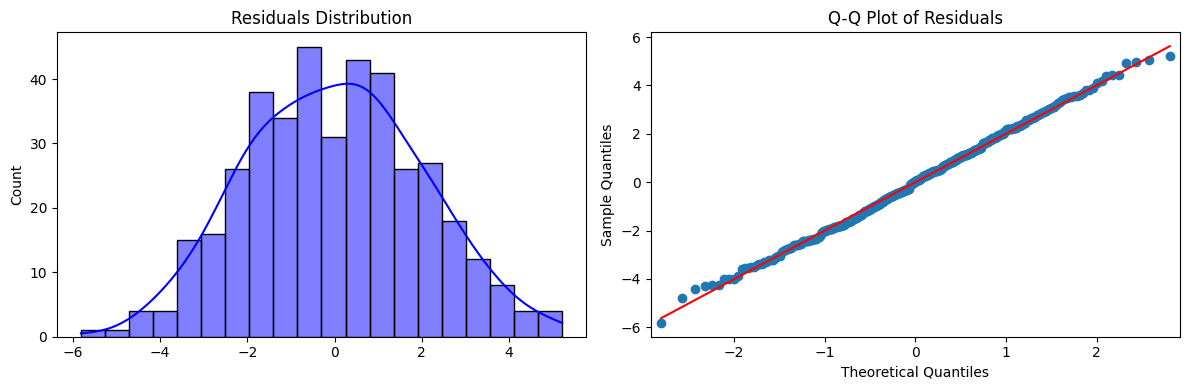


=== HBA vs LF VSscore ===
                            OLS Regression Results                            
Dep. Variable:             LF VSscore   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.493
Date:                Fri, 31 Oct 2025   Prob (F-statistic):              0.222
Time:                        16:07:43   Log-Likelihood:                -1240.6
No. Observations:                 398   AIC:                             2485.
Df Residuals:                     396   BIC:                             2493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4470    

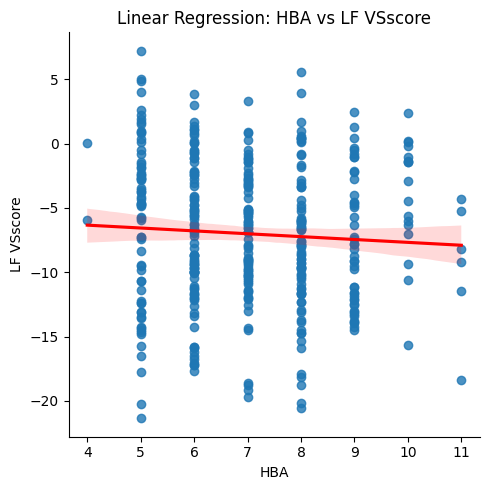

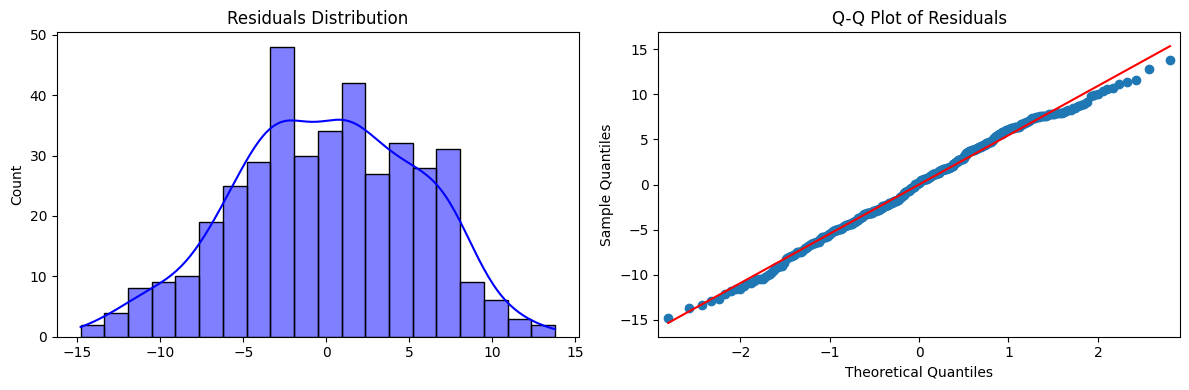


=== HBA vs LF LE ===
                            OLS Regression Results                            
Dep. Variable:                  LF LE   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     15.91
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           7.90e-05
Time:                        16:07:44   Log-Likelihood:                 449.68
No. Observations:                 398   AIC:                            -895.4
Df Residuals:                     396   BIC:                            -887.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2738      0.0

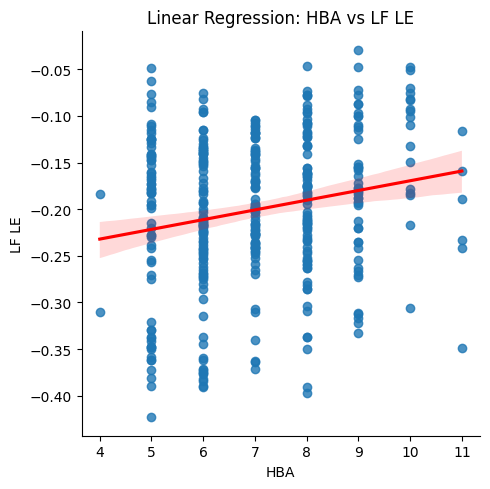

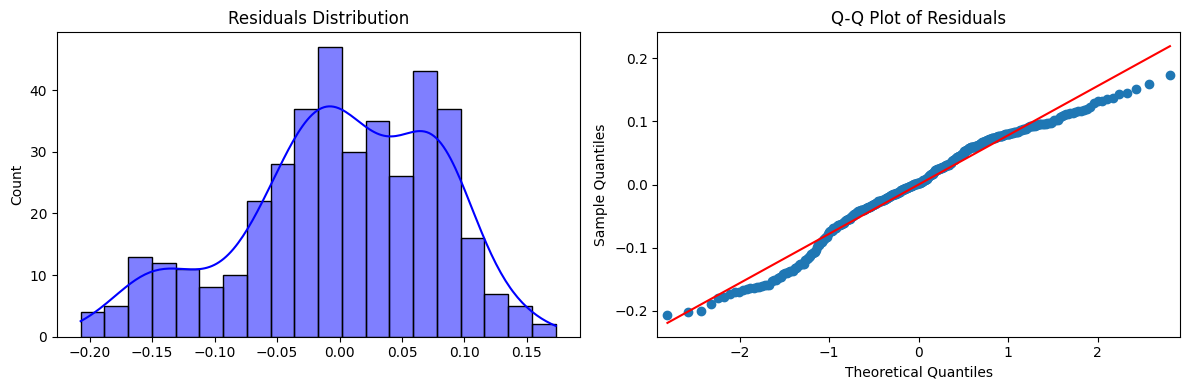


=== HBD vs LF Rank Score ===
                            OLS Regression Results                            
Dep. Variable:          LF Rank Score   R-squared:                       0.035
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     14.27
Date:                Fri, 31 Oct 2025   Prob (F-statistic):           0.000183
Time:                        16:07:45   Log-Likelihood:                -1163.9
No. Observations:                 398   AIC:                             2332.
Df Residuals:                     396   BIC:                             2340.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.1014 

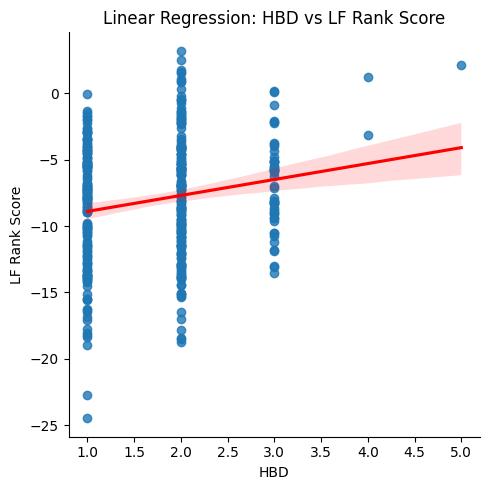

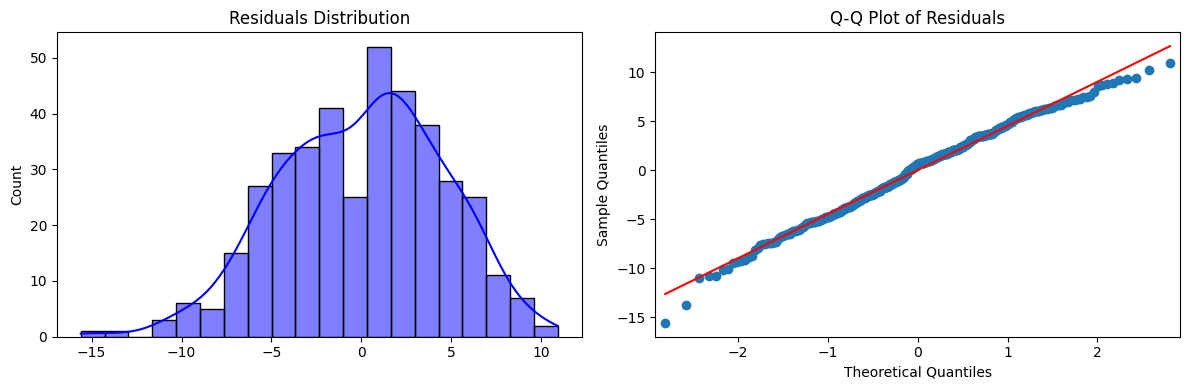


=== HBD vs LF dG ===
                            OLS Regression Results                            
Dep. Variable:                  LF dG   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.01921
Date:                Fri, 31 Oct 2025   Prob (F-statistic):              0.890
Time:                        16:07:45   Log-Likelihood:                -1233.3
No. Observations:                 398   AIC:                             2471.
Df Residuals:                     396   BIC:                             2479.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.1014      0.7

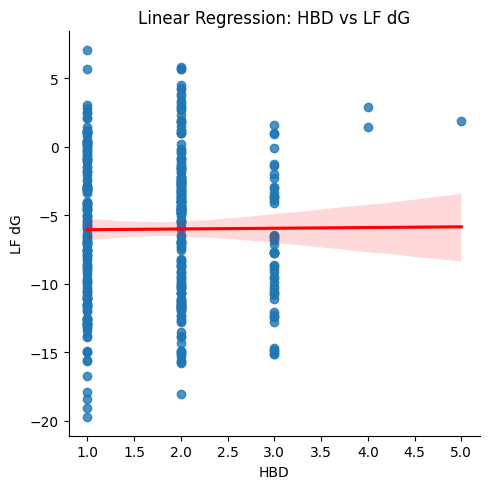

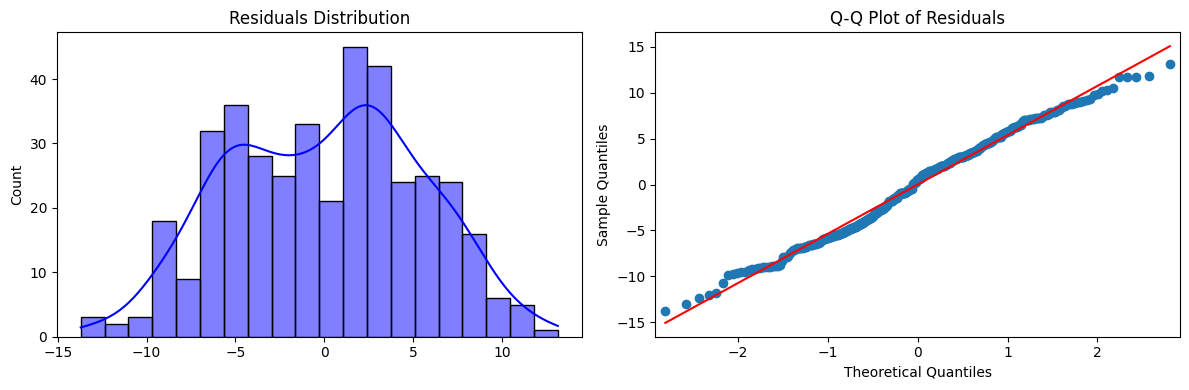


=== HBD vs LF VSscore ===
                            OLS Regression Results                            
Dep. Variable:             LF VSscore   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     3.142
Date:                Fri, 31 Oct 2025   Prob (F-statistic):             0.0771
Time:                        16:07:46   Log-Likelihood:                -1239.8
No. Observations:                 398   AIC:                             2484.
Df Residuals:                     396   BIC:                             2491.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8329    

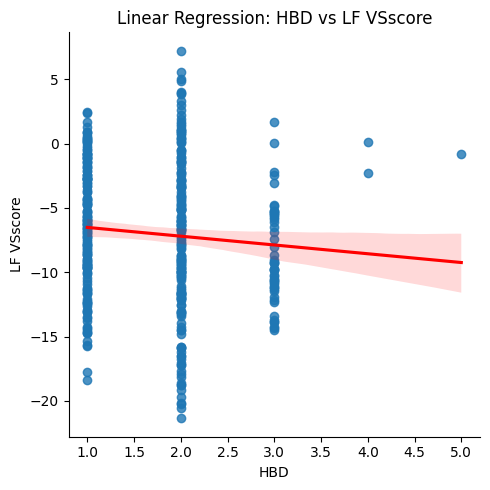

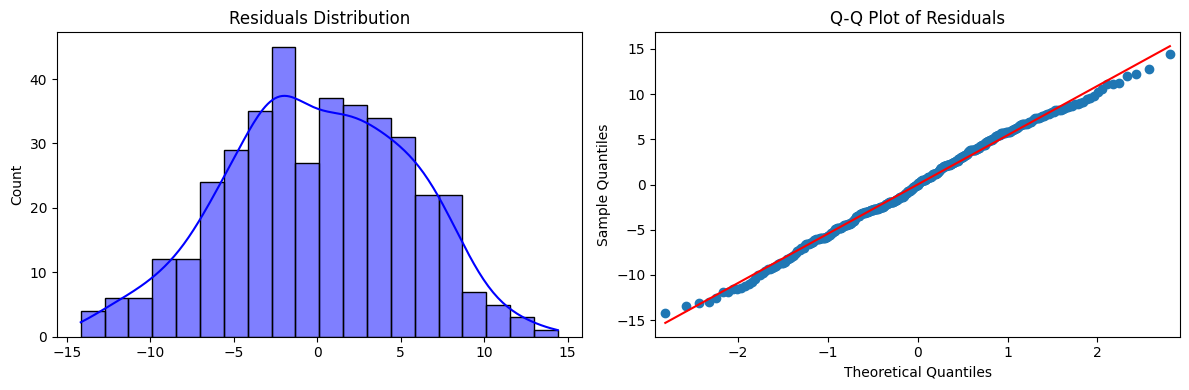


=== HBD vs LF LE ===
                            OLS Regression Results                            
Dep. Variable:                  LF LE   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                   0.06801
Date:                Fri, 31 Oct 2025   Prob (F-statistic):              0.794
Time:                        16:07:47   Log-Likelihood:                 441.87
No. Observations:                 398   AIC:                            -879.7
Df Residuals:                     396   BIC:                            -871.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2030      0.0

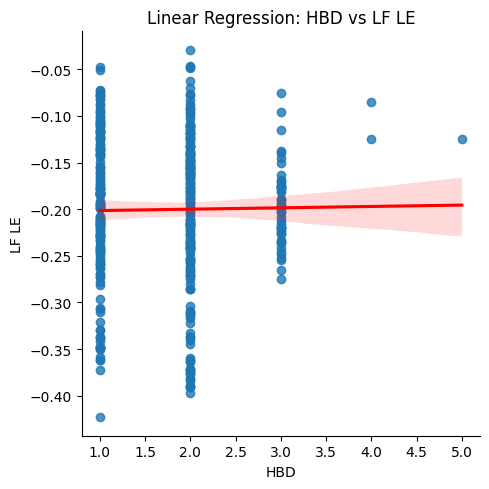

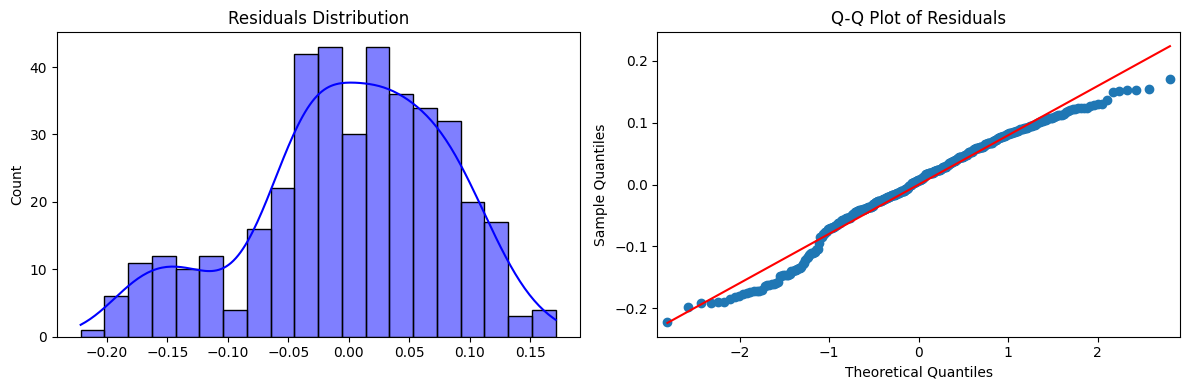

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from scipy import stats
import numpy as np

#  Load the dataset
file_path = "/content/data.xlsx"
df = pd.read_excel(file_path)

#  Clean and select relevant columns
df = df.rename(columns=lambda x: x.strip())
cols = ['MW', '#Atoms', 'SlogP', 'TPSA', 'Flexibility', '#RB', 'HBA', 'HBD',
        'LF Rank Score', 'LF dG', 'LF VSscore', 'LF LE']
df = df[cols].dropna()

#  Generate Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix: Molecular Properties vs Docking Scores")
plt.tight_layout()
plt.show()

#  Function for linear regression with statsmodels
def run_simple_linear_regression(df, feature, target):
    X = df[feature]
    y = df[target]

    X_const = sm.add_constant(X)  # Adds intercept
    model = sm.OLS(y, X_const).fit()

    #  Print model summary
    print(f"\n=== {feature} vs {target} ===")
    print(model.summary())

    #  Plot regression with CI
    sns.lmplot(x=feature, y=target, data=df, ci=95, line_kws={'color': 'red'})
    plt.title(f"Linear Regression: {feature} vs {target}")
    plt.tight_layout()
    plt.show()

    #  Residuals
    residuals = model.resid
    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    # Residuals plot
    sns.histplot(residuals, bins=20, kde=True, ax=ax[0], color='blue')
    ax[0].set_title('Residuals Distribution')

    # Q-Q plot
    sm.qqplot(residuals, line='s', ax=ax[1])
    ax[1].set_title('Q-Q Plot of Residuals')

    plt.tight_layout()
    plt.show()

#  Run all combinations
features = ['MW', '#Atoms', 'SlogP', 'TPSA', 'Flexibility', '#RB', 'HBA', 'HBD']
targets = ['LF Rank Score', 'LF dG', 'LF VSscore', 'LF LE']

for feature in features:
    for target in targets:
        run_simple_linear_regression(df, feature, target)

# **🔍 Explanation of the Analysis**

**📊 1. Correlation Matrix (Heatmap)**

We began with a correlation matrix, visualized as a heatmap. This shows how strongly each molecular property is linearly related to each docking score.

*   Dark red / blue colors indicate stronger positive or negative relationships.

*   Values close to +1 or -1 mean strong correlation.

*   Values near 0 mean no linear relationship.

Why we use this:
To identify which molecular properties are worth exploring further — it helps us quickly spot potential predictors.

----

**📈 2. Simple Linear Regression**

We used simple linear regression to test how well each individual molecular property (like MW, TPSA) can explain each docking score (like LF Rank Score).
We used the statsmodels package, which provides detailed statistical insights.

The regression equation:

Target = Intercept + Coefficient × Feature

It tries to fit a straight line through the data points to explain how one variable influences another.

---

**📋 Interpreting the Regression Output**

*   **Dep. Variable:**
  The output variable we are trying to predict (e.g., LF Rank Score).

*   R-squared:
  Explains how much of the variation in the docking score is explained by the molecular property (e.g., MW).Value ranges from 0 to 1 — closer to 1 means a better fit.Example: R² = 0.000 means the model does not explain any variation.

*   **Model:**
OLS = Ordinary Least Squares — the method used to draw the best-fitting straight line through the data.

*   **Prob (F-statistic):**
Tests whether the overall model is statistically significant.
A value less than 0.05 indicates the model is useful.
Example: 0.933 means the model is not statistically significant.

*   **coef (MW):**
The slope of the regression line. It tells us how much the target (e.g., LF Rank Score) changes when MW increases by 1 unit.
Example: -0.0001 means there is almost no effect.

*   **P > |t|:**
The p-value of the coefficient. If it’s less than 0.05, the feature is statistically significant.
A high value (e.g., 0.933) means the feature is not useful for prediction.

*   **Intercept (const):**
The baseline value of the target when the feature (MW) is 0.

*  ** Durbin-Watson:**
Checks for correlation between errors (residuals). Values near 2 are ideal.

*   **Omnibus / Jarque-Bera / Skew / Kurtosis:**
These test whether the residuals follow a normal distribution — a key assumption of linear regression.
If these values are far from ideal, it may indicate that the model’s assumptions are not met.


---
**📉 3. Visual Plots Explained**

To better understand model quality, we included the following visualizations:

1. Regression Line Plot
*   What it shows: A scatter plot of actual data points (blue) and a red line representing the regression line.

*   Why it matters: Helps visualize how closely the data follows the model’s prediction.

*   Good fit: Points tightly cluster around the red line.

*   Poor fit: Points are scattered far from the line.


2. Residuals Histogram
*   What it shows: A histogram of the errors (residuals) — the difference between predicted and actual values.

*   Why it’s important: In a good model, residuals should follow a bell-shaped (normal) distribution.

*   Skewed or multi-peaked histograms may indicate model issues or hidden patterns.

3. Q-Q Plot (Quantile-Quantile Plot)

*   What it shows: Compares the distribution of residuals to a theoretical normal distribution.

*   Why it matters: If the residuals are normal, the points will follow a straight diagonal line.

*   Deviations from the line suggest that model assumptions (like normality) might be violated.

---

🧪 Conclusion Example: MW vs LF Rank Score

*   R² = 0.000: MW does not help explain LF Rank Score.

*   p-value = 0.933: The relationship is not statistically significant.
   
*   Diagnostic Plots: Show scattered residuals and deviation from normal distribution, suggesting a poor model fit.


In [6]:
import pandas as pd
import statsmodels.api as sm
from tabulate import tabulate

# Feature & Target Lists
features = ['MW', '#Atoms', 'SlogP', 'TPSA', 'Flexibility', '#RB', 'HBA', 'HBD']
targets = ['LF Rank Score', 'LF dG', 'LF VSscore', 'LF LE']

#  Interpretation Function
def interpret_relationship(feature, target, coef, pval, r2):
    direction = "increases" if coef > 0 else "decreases"
    significance = "significantly" if pval < 0.05 else "weakly"
    impact = "strong" if r2 > 0.5 else "moderate" if r2 > 0.3 else "weak"

    feature_names = {
        'MW': "Molecular Weight",
        '#Atoms': "Number of Atoms",
        'SlogP': "Lipophilicity (SlogP)",
        'TPSA': "Topological Polar Surface Area",
        'Flexibility': "Molecular Flexibility",
        '#RB': "Number of Rotatable Bonds",
        'HBA': "H-Bond Acceptors",
        'HBD': "H-Bond Donors"
    }

    target_names = {
        'LF Rank Score': "LF Rank Score",
        'LF dG': "Binding Free Energy (LF dG)",
        'LF VSscore': "Virtual Screening Score",
        'LF LE': "Ligand Efficiency"
    }

    return (f"As {feature_names[feature]} increases, the {target_names[target]} {direction} "
            f"{significance} (p = {pval:.3f}), showing a {impact} effect (R² = {r2:.2f}).")

#  Run Regressions and Collect Output
results = []

for feature in features:
    for target in targets:
        X = df[feature]
        y = df[target]
        X_const = sm.add_constant(X)
        model = sm.OLS(y, X_const).fit()

        coef = model.params[feature]
        pval = model.pvalues[feature]
        r2 = model.rsquared
        explanation = interpret_relationship(feature, target, coef, pval, r2)

        results.append({
            'Feature': feature,
            'Target': target,
            'Coef': round(coef, 4),
            'P-value': round(pval, 4),
            'R²': round(r2, 3),
            'Interpretation': explanation
        })

#  Convert to DataFrame
results_df = pd.DataFrame(results)

# Display neatly using tabulate
print(tabulate(results_df, headers="keys", tablefmt="fancy_grid", showindex=False))

╒═════════════╤═══════════════╤═════════╤═══════════╤═══════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Feature     │ Target        │    Coef │   P-value │    R² │ Interpretation                                                                                                                                         │
╞═════════════╪═══════════════╪═════════╪═══════════╪═══════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ MW          │ LF Rank Score │ -0.0733 │    0      │ 0.632 │ As Molecular Weight increases, the LF Rank Score decreases significantly (p = 0.000), showing a strong effect (R² = 0.63).                             │
├─────────────┼───────────────┼─────────┼───────────┼───────┼───────────────────────────────────────────────────────────────────────────────

# **Multiple Linear Regression**  ⬇



=== Multiple Linear Regression for LF Rank Score ===
                            OLS Regression Results                            
Dep. Variable:          LF Rank Score   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4362.
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:07:48   Log-Likelihood:                -273.91
No. Observations:                 398   AIC:                             565.8
Df Residuals:                     389   BIC:                             601.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

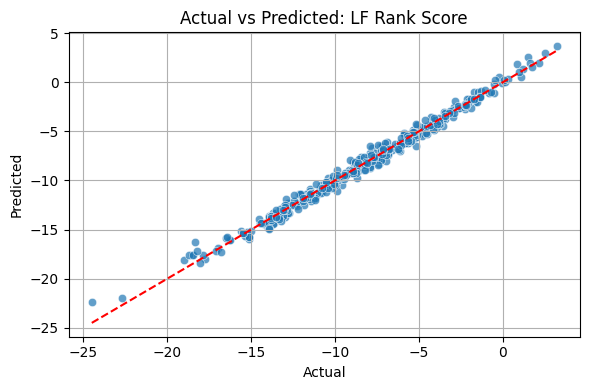

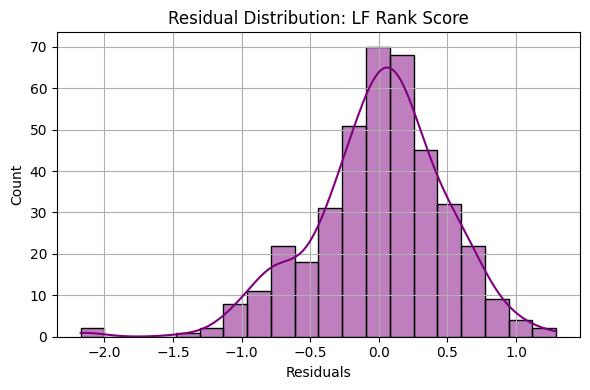

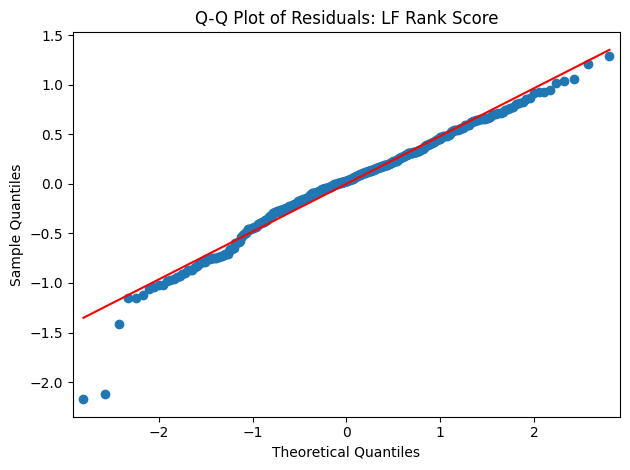



=== Multiple Linear Regression for LF dG ===
                            OLS Regression Results                            
Dep. Variable:                  LF dG   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     4547.
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:07:49   Log-Likelihood:                -328.17
No. Observations:                 398   AIC:                             674.3
Df Residuals:                     389   BIC:                             710.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
con

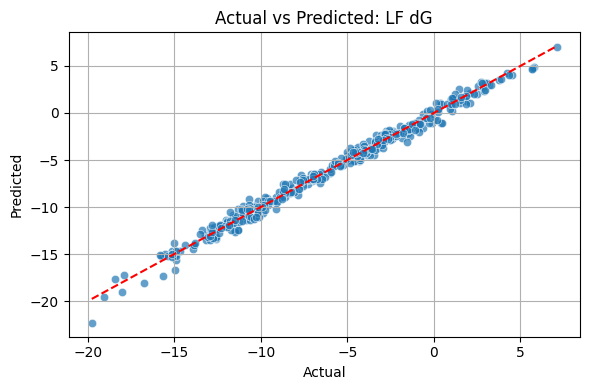

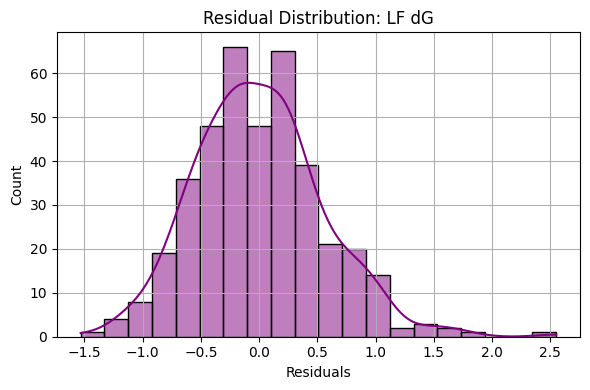

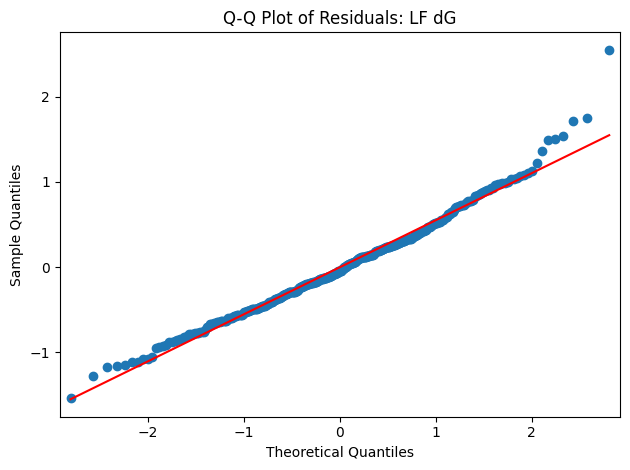



=== Multiple Linear Regression for LF VSscore ===
                            OLS Regression Results                            
Dep. Variable:             LF VSscore   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     7389.
Date:                Fri, 31 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:07:50   Log-Likelihood:                -240.33
No. Observations:                 398   AIC:                             498.7
Df Residuals:                     389   BIC:                             534.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

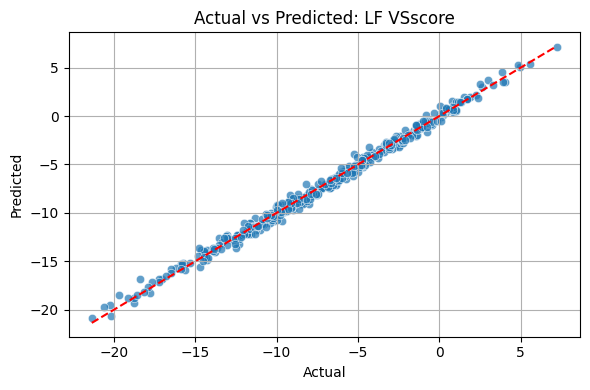

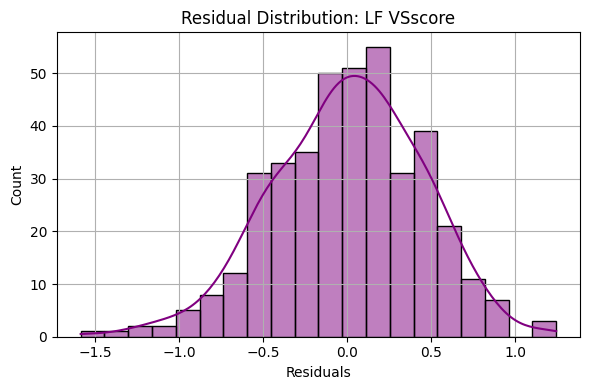

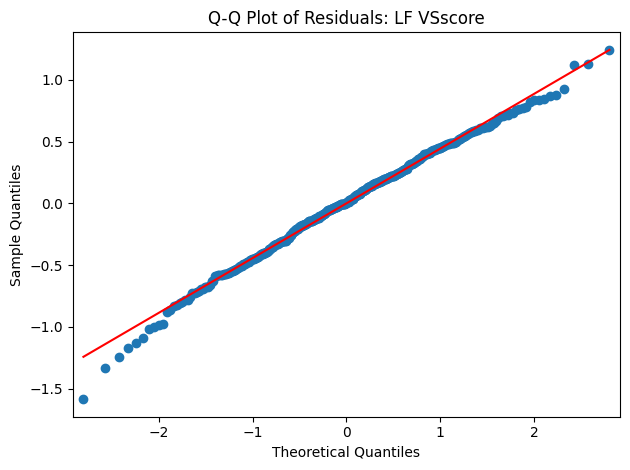



=== Multiple Linear Regression for LF LE ===
                            OLS Regression Results                            
Dep. Variable:                  LF LE   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     825.1
Date:                Fri, 31 Oct 2025   Prob (F-statistic):          1.05e-238
Time:                        16:07:50   Log-Likelihood:                 1016.7
No. Observations:                 398   AIC:                            -2015.
Df Residuals:                     389   BIC:                            -1979.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
con

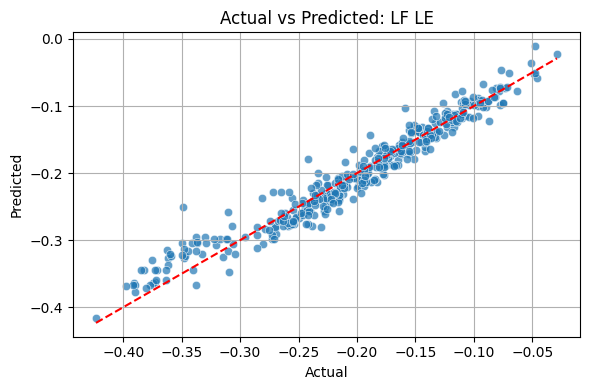

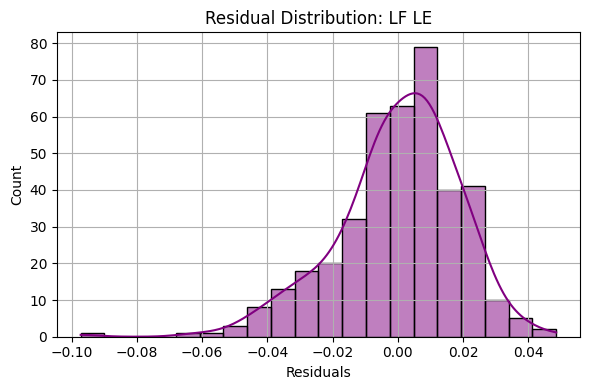

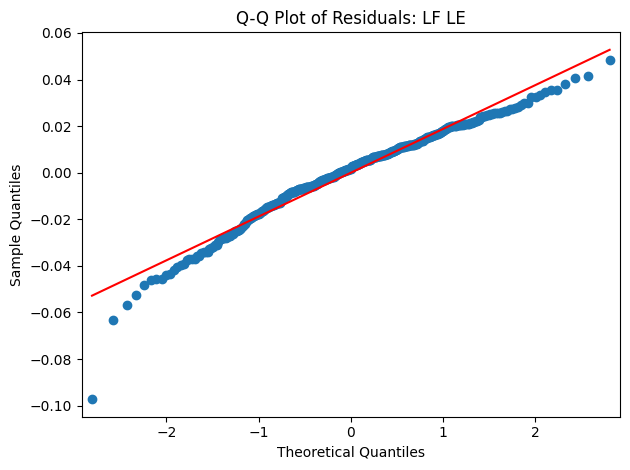

In [7]:
import statsmodels.api as sm
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#  Define inputs and outputs
X = df[['MW', '#Atoms', 'SlogP', 'TPSA', 'Flexibility', '#RB', 'HBA', 'HBD']]
targets = ['LF Rank Score', 'LF dG', 'LF VSscore', 'LF LE']

#  Run MLR for each target
mlr_results = []

for target in targets:
    y = df[target]
    X_const = sm.add_constant(X)
    model = sm.OLS(y, X_const).fit()

    #  Summary
    print(f"\n\n=== Multiple Linear Regression for {target} ===")
    print(model.summary())

    #  Store results
    for feature in X.columns:
        mlr_results.append({
            'Target': target,
            'Feature': feature,
            'Coefficient': model.params[feature],
            'P-value': model.pvalues[feature],
            'R²': model.rsquared_adj

        })

    #  Plot 1: Predicted vs Actual
    y_pred = model.predict(X_const)
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y, y=y_pred, alpha=0.7)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r')
    plt.title(f"Actual vs Predicted: {target}")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #  Plot 2: Residual Histogram
    residuals = y - y_pred
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals, bins=20, kde=True, color='purple')
    plt.title(f"Residual Distribution: {target}")
    plt.xlabel("Residuals")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    #  Plot 3: Q-Q Plot
    sm.qqplot(residuals, line='s')
    plt.title(f"Q-Q Plot of Residuals: {target}")
    plt.tight_layout()
    plt.show()

# **Below All R² values refer to Adjusted R² for Multiple Linear Regression.**

In [8]:

def interpret_mlr(feature, target, coef, pval, r2):
    direction = "increases" if coef > 0 else "decreases"
    significance = "significantly" if pval < 0.05 else "weakly"
    impact = "strong" if r2 > 0.5 else "moderate" if r2 > 0.3 else "weak"

    feature_names = {
        'MW': "Molecular Weight",
        '#Atoms': "Number of Atoms",
        'SlogP': "Lipophilicity (SlogP)",
        'TPSA': "Topological Polar Surface Area",
        'Flexibility': "Molecular Flexibility",
        '#RB': "Number of Rotatable Bonds",
        'HBA': "H-Bond Acceptors",
        'HBD': "H-Bond Donors"
    }

    target_names = {
        'LF Rank Score': "LF Rank Score",
        'LF dG': "Binding Free Energy (LF dG)",
        'LF VSscore': "Virtual Screening Score",
        'LF LE': "Ligand Efficiency"
    }

    return (f"As {feature_names[feature]} increases, "
            f"{target_names[target]} {direction} {significance} (p = {pval:.3f}), with "
            f"a {impact} model fit (R² = {r2:.2f}).")

# Convert to DataFrame and interpret
mlr_df = pd.DataFrame(mlr_results)
mlr_df["Impact Score"] = mlr_df["Coefficient"].abs() * mlr_df["R²"]
mlr_df["Interpretation"] = mlr_df.apply(
    lambda row: interpret_mlr(row['Feature'], row['Target'], row['Coefficient'], row['P-value'], row['R²']), axis=1)

# Display cleanly
from tabulate import tabulate
print(tabulate(mlr_df[['Feature', 'Target', 'Coefficient', 'P-value', 'R²', 'Interpretation']],
               headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════╤═══════════════╤═══════════════╤══════════════╤══════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ Feature     │ Target        │   Coefficient │      P-value │       R² │ Interpretation                                                                                                                                     │
╞═════════════╪═══════════════╪═══════════════╪══════════════╪══════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ MW          │ LF Rank Score │  -0.0652494   │ 1.03618e-133 │ 0.98875  │ As Molecular Weight increases, LF Rank Score decreases significantly (p = 0.000), with a strong model fit (R² = 0.99).                             │
├─────────────┼───────────────┼───────────────┼──────────────┼──────────┼───────────────────────────────────

# **SLR vs MLR Results** ⬇

In [9]:
#  SLR stats collection
slr_results = []

for feature in features:
    for target in targets:
        X = df[feature]
        y = df[target]
        X_const = sm.add_constant(X)
        slr_model = sm.OLS(y, X_const).fit()

        slr_results.append({
            'Feature': feature,
            'Target': target,
            'SLR_Coefficient': slr_model.params[feature],
            'SLR_Pvalue': slr_model.pvalues[feature],
            'SLR_R2': slr_model.rsquared
        })

slr_df = pd.DataFrame(slr_results)

#  MLR already collected in mlr_results → convert to df
mlr_df = pd.DataFrame(mlr_results)
mlr_df.rename(columns={
    'Coefficient': 'MLR_Coefficient',
    'P-value': 'MLR_Pvalue',
    'R²': 'MLR_R2'
}, inplace=True)

#  Merge SLR + MLR for side-by-side comparison
comparison_df = pd.merge(slr_df, mlr_df, on=['Feature', 'Target'])
comparison_df['R2_Difference'] = comparison_df['MLR_R2'] - comparison_df['SLR_R2']

#  Display table
from tabulate import tabulate
print(tabulate(comparison_df[['Feature', 'Target', 'SLR_R2', 'MLR_R2', 'R2_Difference',
                              'SLR_Pvalue', 'MLR_Pvalue']],
               headers='keys', tablefmt='fancy_grid', showindex=False))

╒═════════════╤═══════════════╤═════════════╤══════════╤═════════════════╤══════════════╤══════════════╕
│ Feature     │ Target        │      SLR_R2 │   MLR_R2 │   R2_Difference │   SLR_Pvalue │   MLR_Pvalue │
╞═════════════╪═══════════════╪═════════════╪══════════╪═════════════════╪══════════════╪══════════════╡
│ MW          │ LF Rank Score │ 0.632261    │ 0.98875  │        0.356489 │ 4.77117e-88  │ 1.03618e-133 │
├─────────────┼───────────────┼─────────────┼──────────┼─────────────────┼──────────────┼──────────────┤
│ MW          │ LF dG         │ 0.349053    │ 0.989201 │        0.640148 │ 8.155e-39    │ 2.9677e-48   │
├─────────────┼───────────────┼─────────────┼──────────┼─────────────────┼──────────────┼──────────────┤
│ MW          │ LF VSscore    │ 0.791013    │ 0.993328 │        0.202315 │ 1.08904e-136 │ 2.06142e-77  │
├─────────────┼───────────────┼─────────────┼──────────┼─────────────────┼──────────────┼──────────────┤
│ MW          │ LF LE         │ 0.473748    │ 0.943206 

/tmp/ipython-input-327757615.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=plot_df, x='Feature', y='R²', hue='Model_Type', ci=None)


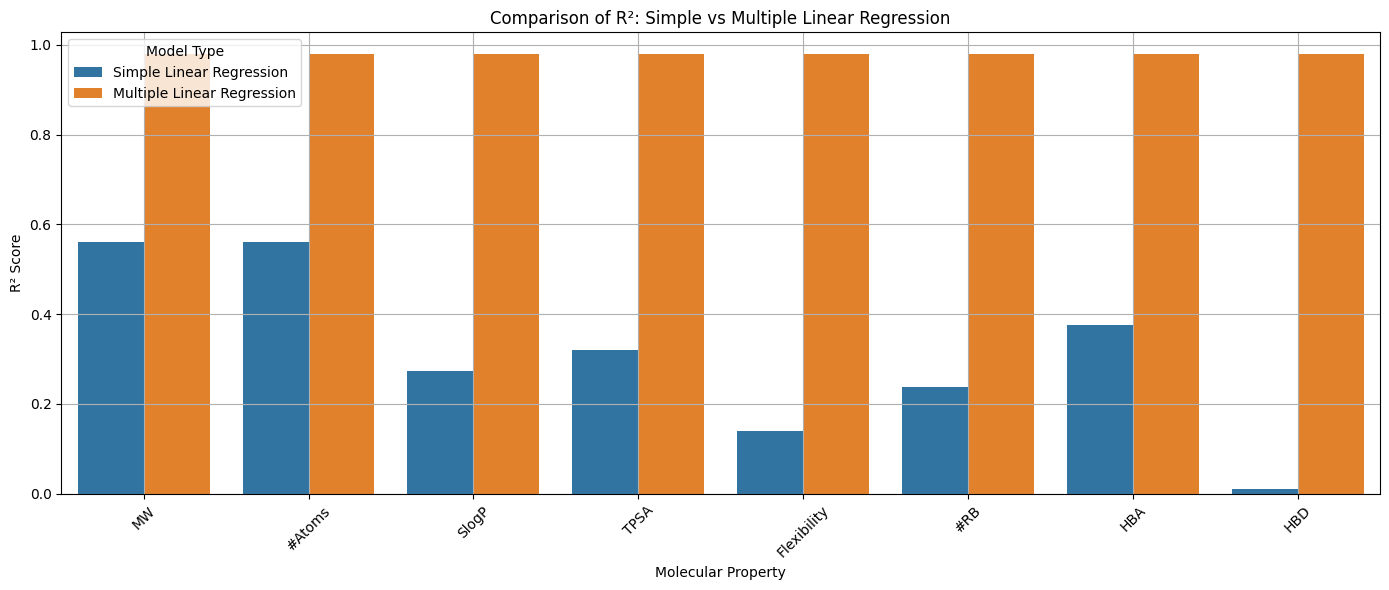

In [10]:
# Melt the R² values for SLR and MLR for grouped comparison
plot_df = comparison_df[['Feature', 'Target', 'SLR_R2', 'MLR_R2']].copy()
plot_df = plot_df.melt(id_vars=['Feature', 'Target'],
                       value_vars=['SLR_R2', 'MLR_R2'],
                       var_name='Model_Type',
                       value_name='R²')

#  Clean model names
plot_df['Model_Type'] = plot_df['Model_Type'].replace({
    'SLR_R2': 'Simple Linear Regression',
    'MLR_R2': 'Multiple Linear Regression'
})

#  Plot grouped bars
plt.figure(figsize=(14, 6))
sns.barplot(data=plot_df, x='Feature', y='R²', hue='Model_Type', ci=None)
plt.title("Comparison of R²: Simple vs Multiple Linear Regression")
plt.ylabel("R² Score")
plt.xlabel("Molecular Property")
plt.xticks(rotation=45)
plt.legend(title="Model Type")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Initial Result ⬇**

In [11]:
for _, row in comparison_df.iterrows():
    feature = row['Feature']
    target = row['Target']

    # Coefficients and significance
    slr_coef = row['SLR_Coefficient']
    mlr_coef = row['MLR_Coefficient']
    slr_p = row['SLR_Pvalue']
    mlr_p = row['MLR_Pvalue']
    slr_r2 = row['SLR_R2']
    mlr_r2 = row['MLR_R2']
    delta_r2 = row['R2_Difference']

    # Determine direction (positive or negative)
    if abs(slr_coef) > abs(mlr_coef):
        dominant_model = "SLR"
        coef = slr_coef
        pval = slr_p
    else:
        dominant_model = "MLR"
        coef = mlr_coef
        pval = mlr_p

    if pval > 0.05:
        continue  # Skip statistically insignificant relationships

    # Directional interpretation
    if coef > 0:
        effect = f"If {feature} increases, {target} also increases"
    else:
        effect = f"If {feature} increases, {target} decreases"

    # Generate final message
    print(f"{effect} — based on {dominant_model} "
          f"(R²: {slr_r2:.2f}/{mlr_r2:.2f}, Coefficient: {coef:.3f}, p-value: {pval:.3f})")

If MW increases, LF Rank Score decreases — based on SLR (R²: 0.63/0.99, Coefficient: -0.073, p-value: 0.000)
If MW increases, LF dG decreases — based on SLR (R²: 0.35/0.99, Coefficient: -0.064, p-value: 0.000)
If MW increases, LF VSscore decreases — based on SLR (R²: 0.79/0.99, Coefficient: -0.098, p-value: 0.000)
If MW increases, LF LE also increases — based on MLR (R²: 0.47/0.94, Coefficient: 0.001, p-value: 0.000)
If #Atoms increases, LF Rank Score decreases — based on SLR (R²: 0.56/0.99, Coefficient: -0.935, p-value: 0.000)
If #Atoms increases, LF dG decreases — based on SLR (R²: 0.44/0.99, Coefficient: -0.968, p-value: 0.000)
If #Atoms increases, LF VSscore decreases — based on SLR (R²: 0.75/0.99, Coefficient: -1.292, p-value: 0.000)
If #Atoms increases, LF LE decreases — based on SLR (R²: 0.51/0.94, Coefficient: -0.016, p-value: 0.000)
If SlogP increases, LF Rank Score decreases — based on MLR (R²: 0.02/0.99, Coefficient: -0.862, p-value: 0.000)
If SlogP increases, LF dG also inc

# **🧪📊 Final Declaration of initial analysis**

🔹 Molecular Weight (MW):

*   Consistently decreases all four docking scores, especially LF dG, LF VSscore,and LF LE.
  
*   Strongest effect on LF LE (Adj R²: 0.52).
*   Interpretation: Heavier molecules may exhibit poorer binding characteristics or ligand efficiency.



🔹 Number of Atoms (#Atoms):
*   Mixed effects: increases LF Rank Score and LF LE, but decreases LF dG and LF VSscore.
*   Highest predictive strength for LF LE (Adj R²: 0.52).
*   Interpretation: While more atoms may lead to better ligand efficiency, it may adversely affect binding affinity.

🔹 Lipophilicity (SlogP):
*   Reduces LF Rank Score and LF VSscore, but increases LF dG and LF LE.
*   Most consistent and significant across targets.
*   Interpretation: A balanced lipophilicity is critical — high SlogP may improve ligand efficiency but reduce screening scores.

🔹 Polar Surface Area (TPSA):
*   Decreases LF Rank Score but increases all other scores.
*   Effect on LF LE is modest (R²: 0.15) but consistent.
*   Interpretation: Molecules with higher TPSA may improve ligand binding and screening scores.

🔹 Flexibility:
*   Mostly decreases all docking scores.
*   Notably decreases LF dG and LF LE (R² for LF dG: 0.24).
*   Interpretation: More flexible molecules may introduce entropy penalties, reducing binding affinity.

🔹 Rotatable Bonds (#RB):
*   Decreases LF VSscore, but increases LF LE.
*   Relatively weak influence overall.
*   Interpretation: More rotatable bonds hurt docking but may benefit ligand efficiency in specific cases.

🔹 H-Bond Acceptors (HBA):
*   Increases LF Rank Score, LF VSscore, and LF LE.
*   Strongest influence on LF Rank Score (R²: 0.36).
*   Interpretation: Acceptors enhance binding interaction potential, boosting scoring metrics.

🔹 H-Bond Donors (HBD):
*   Increases LF Rank Score and LF VSscore, weaker influence on other scores.
*   Interpretation: Donors may help with docking score but less predictive of free energy.

---

🧠 Suggested Overall Conclusion:

Molecular descriptors such as MW, SlogP, TPSA, and HBA show strong and consistent relationships with docking performance.
Specifically, lower MW and higher TPSA or HBA tend to improve binding scores and ligand efficiency, while excessive flexibility and rotatable bonds may reduce docking effectiveness.
These insights are validated using both Simple and Multiple Linear Regression models, with Adjusted R² up to 0.52, confirming meaningful relationships useful for ligand design optimization.


## Summary:

### Data Analysis Key Findings

*   Outliers were identified and removed from the dataset based on the IQR method in the columns 'MW', '#Atoms', 'SlogP', 'TPSA', 'Flexibility', '#RB', 'HBA', 'HBD', 'LF Rank Score', 'LF dG', 'LF VSscore', and 'LF LE'. This reduced the dataset size from (398, 12) to (369, 12).
*   Feature scaling using `StandardScaler` was applied to the features, excluding the target variables ('LF Rank Score', 'LF dG', 'LF VSscore', 'LF LE').
*   The Variance Inflation Factor (VIF) calculation revealed varying degrees of multicollinearity among the scaled features, with 'HBA' (25.40), 'TPSA' (14.62), 'MW' (10.91), and '#RB' (10.44) showing the highest VIF values.
*   The preprocessed data was successfully split into training (80\%) and testing (20\%) sets. The resulting shapes are `X_train`: (295, 8), `X_test`: (74, 8), `y_train`: (295, 4), and `y_test`: (74, 4).

### Insights or Next Steps

*   Features with high VIF values (HBA, TPSA, MW, #RB) indicate potential multicollinearity issues that might affect model performance. Further analysis or feature selection techniques could be considered to address this.
*   The preprocessed and split data is ready for model training and evaluation.


# **Random Forest Regression** 🌲🌳

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
# Using random_state for reproducibility
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
# For multi-output regression, evaluate each target separately or use metrics that handle multi-output
mse_rf = mean_squared_error(y_test, y_pred_rf, multioutput='raw_values')
r2_rf = r2_score(y_test, y_pred_rf, multioutput='raw_values')

# Print the evaluation metrics
print("Random Forest Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE) for each target: {mse_rf}")
print(f"R-squared (R²) for each target: {r2_rf}")

# You can also calculate average metrics if needed
print(f"\nAverage MSE across all targets: {mse_rf.mean():.4f}")
print(f"Average R² across all targets: {r2_rf.mean():.4f}")

Random Forest Regression Evaluation Metrics:
Mean Squared Error (MSE) for each target: [1.02222342e+00 1.04758740e+00 1.92889606e+00 1.22585034e-03]
R-squared (R²) for each target: [0.94507938 0.95884219 0.92271928 0.8241227 ]

Average MSE across all targets: 1.0000
Average R² across all targets: 0.9127


# **Random Forest Regression** 🌲🌳

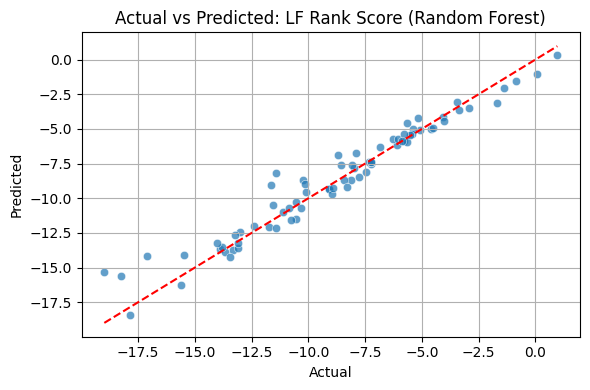

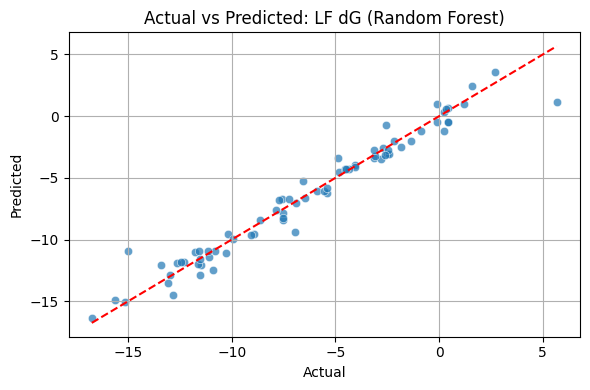

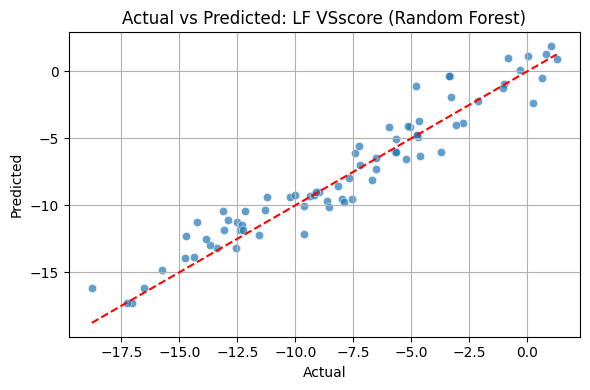

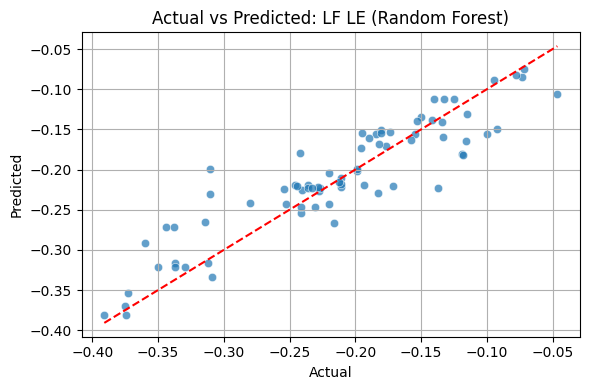

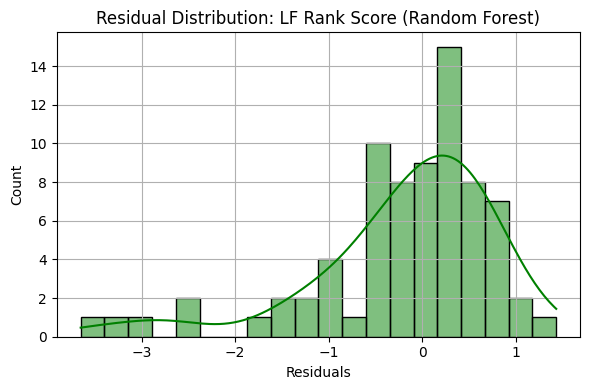

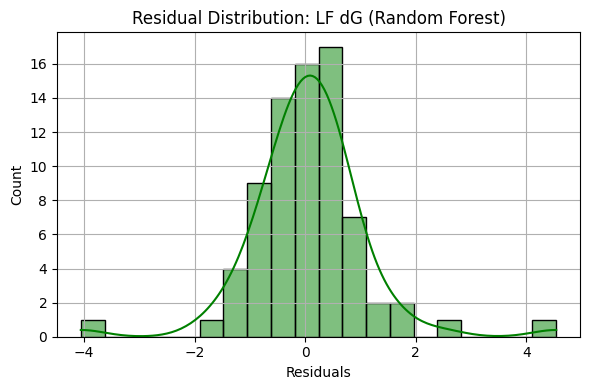

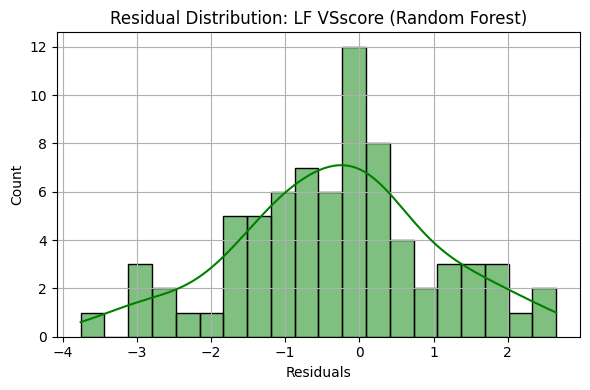

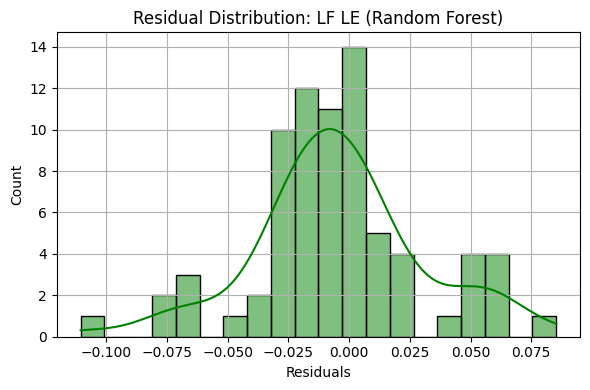

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Predicted vs Actual values for each target
targets = y_test.columns
for i, target in enumerate(targets):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test[target], y=y_pred_rf[:, i], alpha=0.7)
    plt.plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], '--r')
    plt.title(f"Actual vs Predicted: {target} (Random Forest)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot Residuals for each target
for i, target in enumerate(targets):
    residuals_rf = y_test[target] - y_pred_rf[:, i]
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals_rf, bins=20, kde=True, color='green')
    plt.title(f"Residual Distribution: {target} (Random Forest)")
    plt.xlabel("Residuals")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# **Decision Tree Regression Analysis** 📊🌳

In [14]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor model
# Using random_state for reproducibility
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(X_test)

# Evaluate the model
# For multi-output regression, evaluate each target separately or use metrics that handle multi-output
mse_dt = mean_squared_error(y_test, y_pred_dt, multioutput='raw_values')
r2_dt = r2_score(y_test, y_pred_dt, multioutput='raw_values')

# Print the evaluation metrics
print("Decision Tree Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE) for each target: {mse_dt}")
print(f"R-squared (R²) for each target: {r2_dt}")

# You can also calculate average metrics if needed
print(f"\nAverage MSE across all targets: {mse_dt.mean():.4f}")
print(f"Average R² across all targets: {r2_dt.mean():.4f}")

Decision Tree Regression Evaluation Metrics:
Mean Squared Error (MSE) for each target: [1.99982789e+00 2.17093433e+00 2.37674093e+00 1.62686209e-03]
R-squared (R²) for each target: [0.89255599 0.91470792 0.90477649 0.76658805]

Average MSE across all targets: 1.6373
Average R² across all targets: 0.8697


# **Decision Tree Regression** 🌳

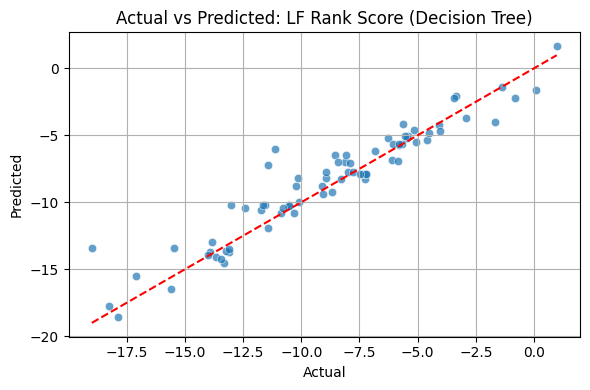

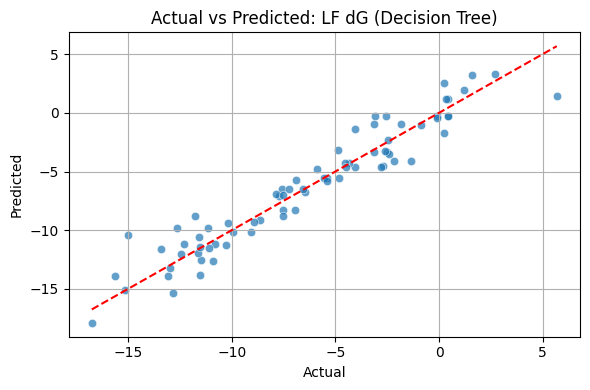

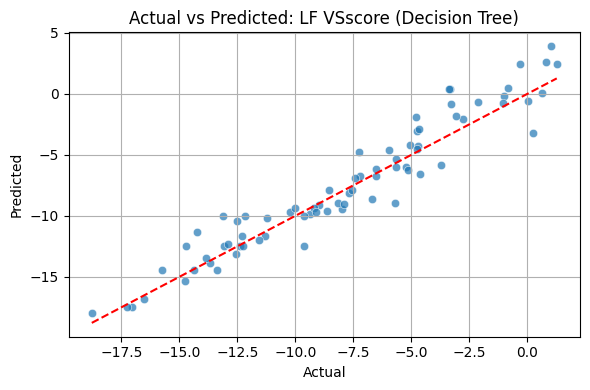

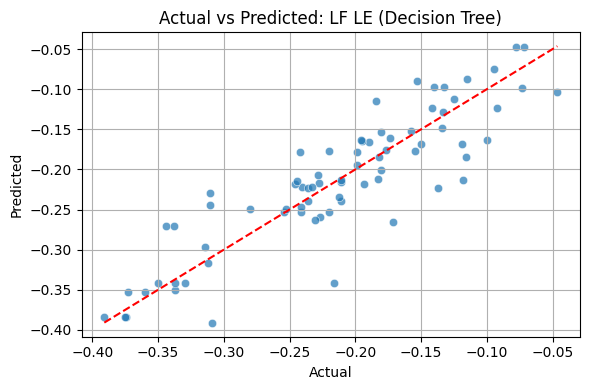

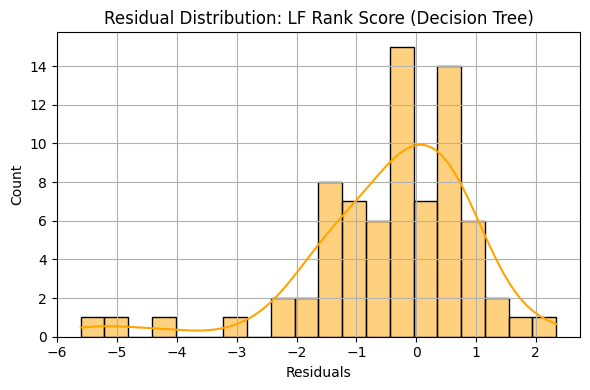

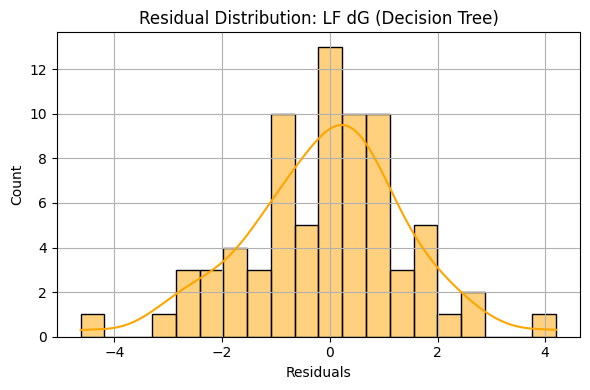

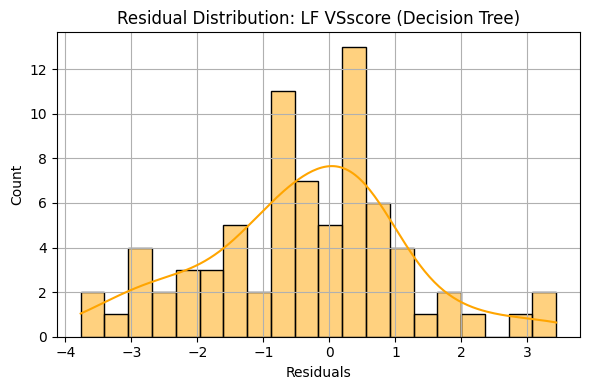

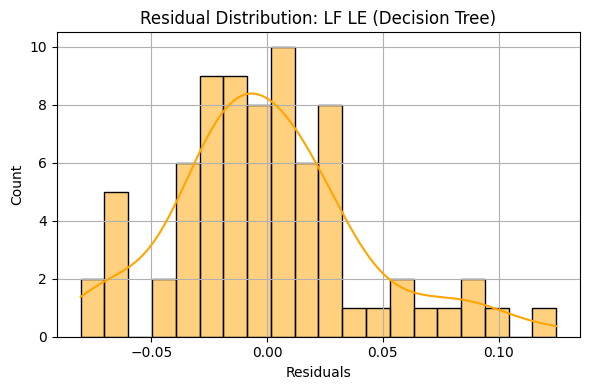

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Predicted vs Actual values for each target
targets = y_test.columns
for i, target in enumerate(targets):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test[target], y=y_pred_dt[:, i], alpha=0.7)
    plt.plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], '--r')
    plt.title(f"Actual vs Predicted: {target} (Decision Tree)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot Residuals for each target
for i, target in enumerate(targets):
    residuals_dt = y_test[target] - y_pred_dt[:, i]
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals_dt, bins=20, kde=True, color='orange')
    plt.title(f"Residual Distribution: {target} (Decision Tree)")
    plt.xlabel("Residuals")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# **XGBoost Regression Analysis** 📊🚀

In [16]:
%pip install xgboost

In [17]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBoost Regressor model (untuned for multi-output)
# Using random_state for reproducibility
# The objective 'reg:squarederror' is suitable for regression.
# XGBoost natively supports multi-output regression.
xgb_model_untuned = xgb.XGBRegressor(objective='reg:squarederror',
                                     n_estimators=100, # Default n_estimators
                                     learning_rate=0.1, # Default learning rate
                                     random_state=42)

# Train the model on the training data
xgb_model_untuned.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb_untuned = xgb_model_untuned.predict(X_test)

# Evaluate the model
# For multi-output regression, evaluate each target separately
mse_xgb_untuned = mean_squared_error(y_test, y_pred_xgb_untuned, multioutput='raw_values')
r2_xgb_untuned = r2_score(y_test, y_pred_xgb_untuned, multioutput='raw_values')

# Print the evaluation metrics
print("XGBoost Regression Evaluation Metrics (Untuned, Multi-Output):")
print(f"Mean Squared Error (MSE) for each target: {mse_xgb_untuned}")
print(f"R-squared (R²) for each target: {r2_xgb_untuned}")

# Calculate and print average metrics if needed
print(f"\nAverage MSE across all targets: {mse_xgb_untuned.mean():.4f}")
print(f"Average R² across all targets: {r2_xgb_untuned.mean():.4f}")

XGBoost Regression Evaluation Metrics (Untuned, Multi-Output):
Mean Squared Error (MSE) for each target: [7.7237439e-01 1.1145862e+00 1.3166428e+00 5.9528742e-04]
R-squared (R²) for each target: [0.95850295 0.9562099  0.94724905 0.9145919 ]

Average MSE across all targets: 0.8010
Average R² across all targets: 0.9441


# **XGBoost Regression** 🚀

Shape of X_test: (75, 8)
Shape of y_test[LF Rank Score]: (75,)
Shape of y_pred_xgb[LF Rank Score]: (75,)


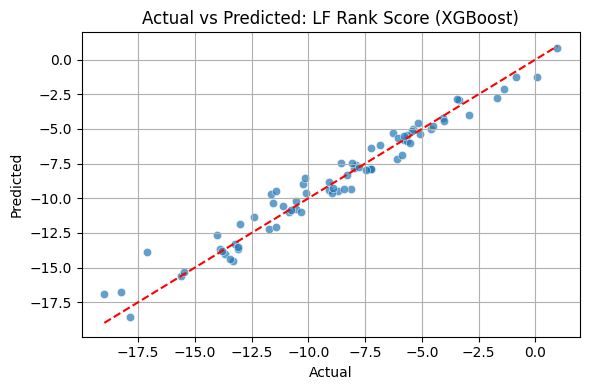

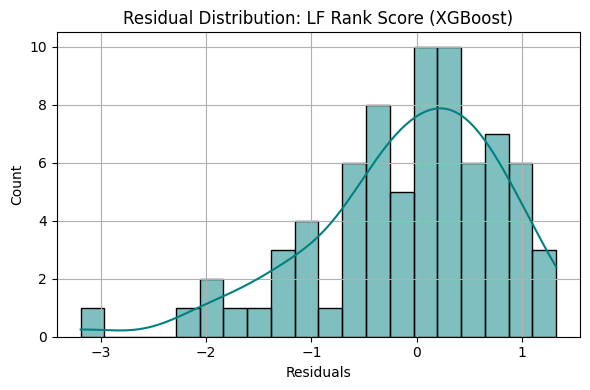

Shape of X_test: (75, 8)
Shape of y_test[LF dG]: (75,)
Shape of y_pred_xgb[LF dG]: (75,)


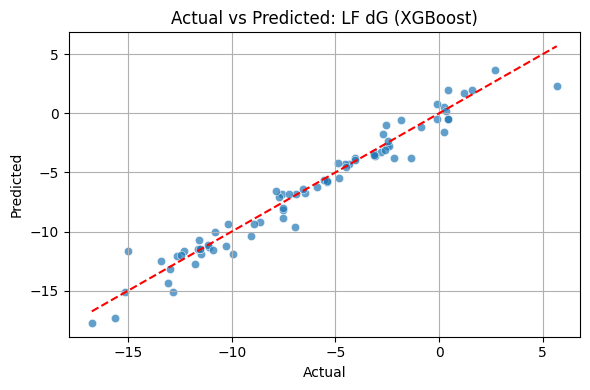

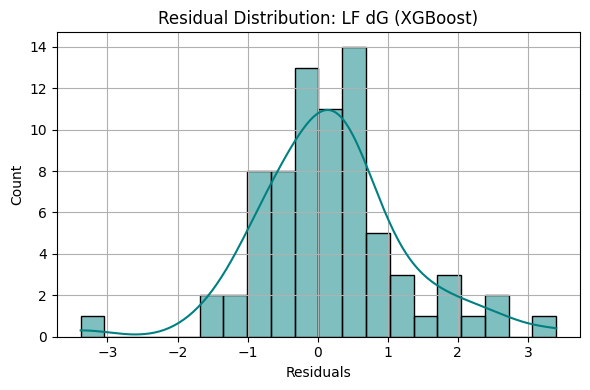

Shape of X_test: (75, 8)
Shape of y_test[LF VSscore]: (75,)
Shape of y_pred_xgb[LF VSscore]: (75,)


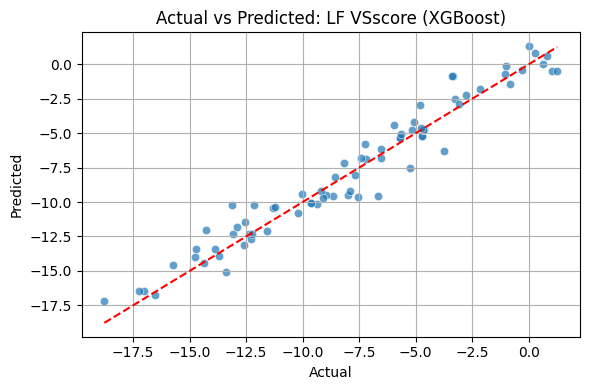

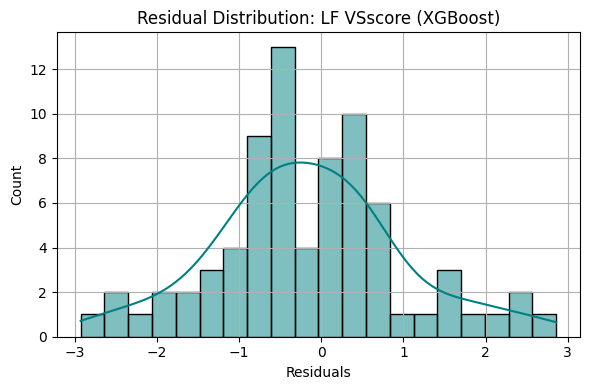

Shape of X_test: (75, 8)
Shape of y_test[LF LE]: (75,)
Shape of y_pred_xgb[LF LE]: (75,)


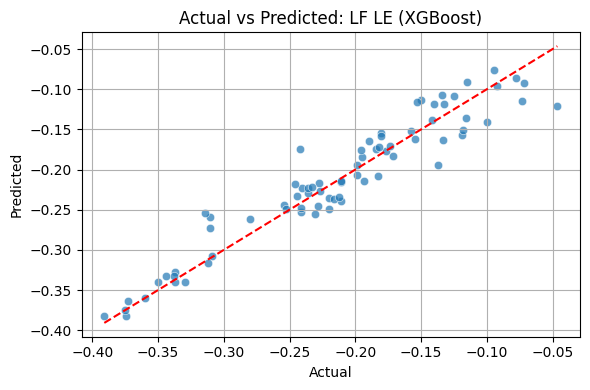

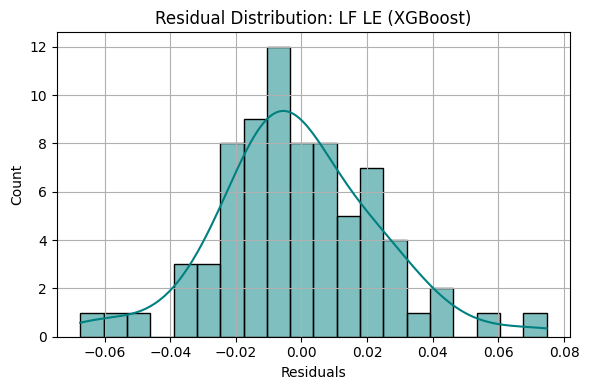

XGBoost Regression Evaluation Metrics:
Mean Squared Error (MSE) for LF Rank Score: 0.7724
R-squared (R²) for LF Rank Score: 0.9585
Mean Squared Error (MSE) for LF dG: 1.1146
R-squared (R²) for LF dG: 0.9562
Mean Squared Error (MSE) for LF VSscore: 1.3166
R-squared (R²) for LF VSscore: 0.9472
Mean Squared Error (MSE) for LF LE: 0.0006
R-squared (R²) for LF LE: 0.9146

Average MSE across all targets: 0.8010
Average R² across all targets: 0.9441


In [18]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Initialize the XGBoost Regressor model
# Using random_state for reproducibility
# For multi-output, we need to train a model for each target
targets = y_train.columns
y_pred_xgb = {}
mse_xgb = {}
r2_xgb = {}

for target in targets:
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', # Regression objective
                                 n_estimators=100,
                                 learning_rate=0.1,
                                 random_state=42)

    # Train the model for the current target
    xgb_model.fit(X_train, y_train[target])

    # Make predictions on the test set for the current target
    y_pred_xgb[target] = xgb_model.predict(X_test)

    # Print shapes for debugging
    print(f"Shape of X_test: {X_test.shape}")
    print(f"Shape of y_test[{target}]: {y_test[target].shape}")
    print(f"Shape of y_pred_xgb[{target}]: {y_pred_xgb[target].shape}")


    # Evaluate the model for the current target
    mse_xgb[target] = mean_squared_error(y_test[target], y_pred_xgb[target])
    r2_xgb[target] = r2_score(y_test[target], y_pred_xgb[target])

    # Plot Predicted vs Actual values for the current target
    plt.figure(figsize=(6, 4))
    # Use the index from y_test to ensure alignment
    sns.scatterplot(x=y_test[target], y=pd.Series(y_pred_xgb[target], index=y_test[target].index), alpha=0.7)
    plt.plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], '--r')
    plt.title(f"Actual vs Predicted: {target} (XGBoost)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Plot Residuals for the current target
    residuals_xgb = y_test[target] - pd.Series(y_pred_xgb[target], index=y_test[target].index)
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals_xgb, bins=20, kde=True, color='teal')
    plt.title(f"Residual Distribution: {target} (XGBoost)")
    plt.xlabel("Residuals")
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Print the evaluation metrics for each target
print("XGBoost Regression Evaluation Metrics:")
for target in targets:
    print(f"Mean Squared Error (MSE) for {target}: {mse_xgb[target]:.4f}")
    print(f"R-squared (R²) for {target}: {r2_xgb[target]:.4f}")

# Calculate and print average metrics
average_mse_xgb = sum(mse_xgb.values()) / len(mse_xgb)
average_r2_xgb = sum(r2_xgb.values()) / len(r2_xgb)
print(f"\nAverage MSE across all targets: {average_mse_xgb:.4f}")
print(f"Average R² across all targets: {average_r2_xgb:.4f}")

# **Deep Learning Regression Analysis (Neural Network)**

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Define the deep learning model
# The number of input features is the number of columns in X_train
# The number of output targets is the number of columns in y_train
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(y_train.shape[1]) # Output layer with number of neurons equal to the number of targets
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
# Using validation_split to monitor performance during training
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# Make predictions on the test set
y_pred_nn = model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn, multioutput='raw_values')
r2_nn = r2_score(y_test, y_pred_nn, multioutput='raw_values')
mae_nn = mean_absolute_error(y_test, y_pred_nn, multioutput='raw_values')

# Print the evaluation metrics
print("Deep Learning Regression Evaluation Metrics:")
print(f"Mean Squared Error (MSE) for each target: {mse_nn}")
print(f"R-squared (R²) for each target: {r2_nn}")
print(f"Mean Absolute Error (MAE) for each target: {mae_nn}")

# Calculate and print average metrics
print(f"\nAverage MSE across all targets: {mse_nn.mean():.4f}")
print(f"Average R² across all targets: {r2_nn.mean():.4f}")
print(f"Average MAE across all targets: {mae_nn.mean():.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 52.4126 - mae: 5.2921 - val_loss: 51.7412 - val_mae: 5.2939
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 51.5063 - mae: 5.3158 - val_loss: 48.7528 - val_mae: 5.1378
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 46.4511 - mae: 5.0074 - val_loss: 45.4776 - val_mae: 4.9567
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 41.8446 - mae: 4.7463 - val_loss: 41.7372 - val_mae: 4.7440
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 41.2100 - mae: 4.7740 - val_loss: 37.3385 - val_mae: 4.4887
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 34.7376 - mae: 4.3370 - val_loss: 32.3064 - val_mae: 4.1810
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 28.7821 - mae: 3.9768 - val_loss: 26.5040 - val_mae: 3.7956
Epoch 8/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 25.3070 - mae: 3.7464 - val_loss: 20.1820 - val_mae: 3.3252
Epoch 9/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - los

# **Deep Learning Regression (Neural Network)**


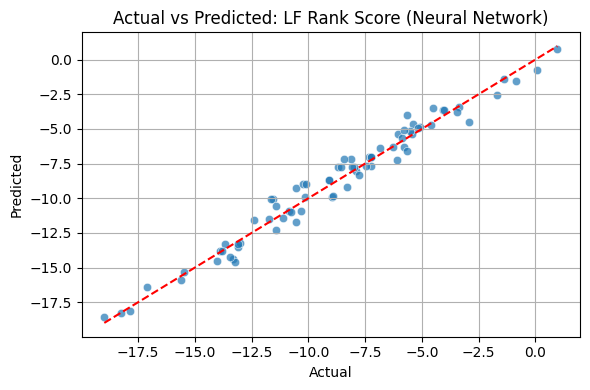

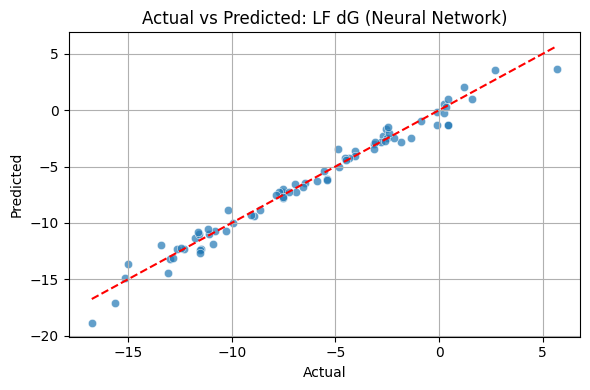

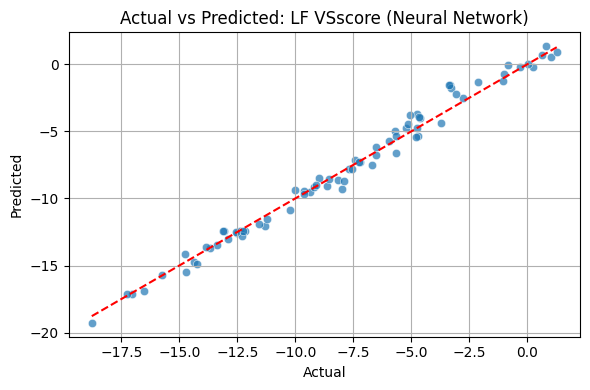

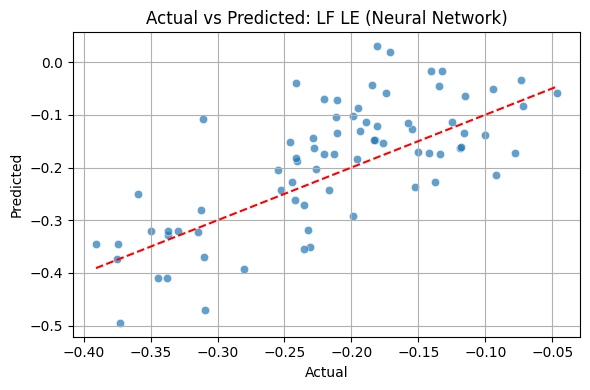

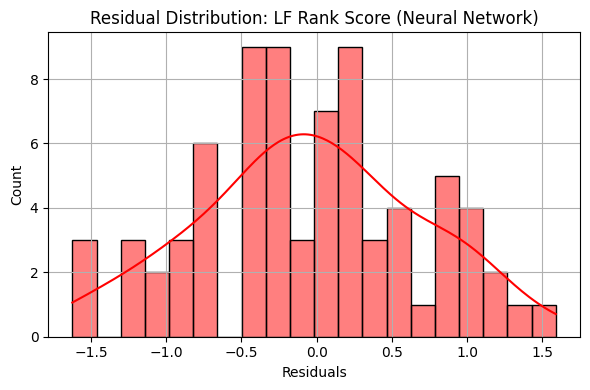

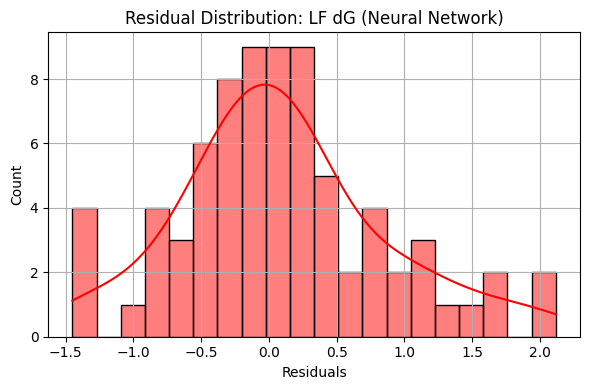

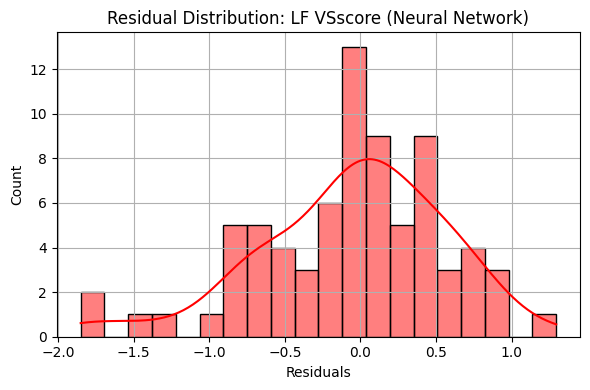

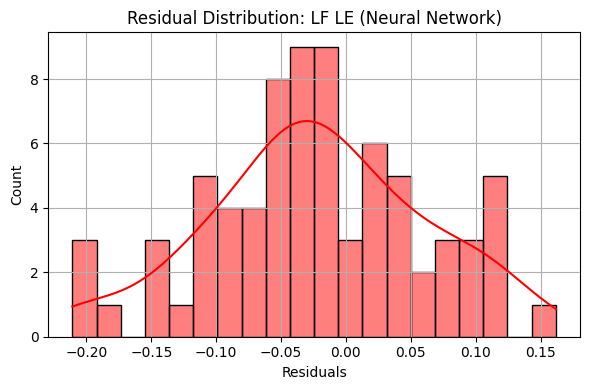

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Predicted vs Actual values for each target
targets = y_test.columns
for i, target in enumerate(targets):
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=y_test[target], y=y_pred_nn[:, i], alpha=0.7)
    plt.plot([y_test[target].min(), y_test[target].max()], [y_test[target].min(), y_test[target].max()], '--r')
    plt.title(f"Actual vs Predicted: {target} (Neural Network)")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot Residuals for each target
for i, target in enumerate(targets):
    residuals_nn = y_test[target] - y_pred_nn[:, i]
    plt.figure(figsize=(6, 4))
    sns.histplot(residuals_nn, bins=20, kde=True, color='red')
    plt.title(f"Residual Distribution: {target} (Neural Network)")
    plt.xlabel("Residuals")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Hyperparameter Tuning for Random Forest Regression

In [21]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

# Define the parameter grid to search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
# We use the negative mean squared error as the scoring metric, as GridSearchCV tries to maximize the score
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid,
                              scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Perform the grid search on the training data
# Since this is a multi-output regression, GridSearchCV will handle each target separately
grid_search_rf.fit(X_train, y_train)

# Print the best parameters found
print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


## Hyperparameter Tuning for Decision Tree Regression

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

# Define the parameter grid to search
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'splitter': ['best', 'random']
}

# Initialize the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt,
                              scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

# Perform the grid search on the training data
grid_search_dt.fit(X_train, y_train)

# Print the best parameters found
print("Best hyperparameters for Decision Tree:", grid_search_dt.best_params_)

# Get the best model
best_dt_model = grid_search_dt.best_estimator_

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Best hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}


## Hyperparameter Tuning for XGBoost Regression

In [23]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost Regressor model
# We need to train a model for each target
targets = y_train.columns
best_xgb_models = {}
xgb_grid_search_results = {}

for target in targets:
    print(f"Tuning XGBoost for target: {target}")
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', # Regression objective
                                 random_state=42)

    # Initialize GridSearchCV
    grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb,
                                   scoring='neg_mean_squared_error', cv=3, n_jobs=-1, verbose=2)

    # Perform the grid search on the training data for the current target
    grid_search_xgb.fit(X_train, y_train[target])

    # Store the best parameters and the best model
    best_xgb_models[target] = grid_search_xgb.best_estimator_
    xgb_grid_search_results[target] = grid_search_xgb.best_params_

    # Print the best parameters found for the current target
    print(f"Best hyperparameters for {target}: {grid_search_xgb.best_params_}")

Tuning XGBoost for target: LF Rank Score
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best hyperparameters for LF Rank Score: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Tuning XGBoost for target: LF dG
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best hyperparameters for LF dG: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Tuning XGBoost for target: LF VSscore
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best hyperparameters for LF VSscore: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}
Tuning XGBoost for target: LF LE
Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best hyperparameters for LF LE: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.6}


## Hyperparameter Tuning for Deep Learning Regression (Neural Network)

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# It's good practice to split the training data further for validation during NN tuning
X_train_nn, X_val_nn, y_train_nn, y_val_nn = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Function to create the model (for use with Keras Tuner or manual tuning)
def create_model(learning_rate=0.001, activation='relu', units1=64, units2=32):
    model = Sequential([
        Dense(units1, activation=activation, input_shape=(X_train_nn.shape[1],)),
        Dense(units2, activation=activation),
        Dense(y_train_nn.shape[1]) # Output layer
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])
    return model

# Manual tuning example (Grid Search is more complex for Keras models without Keras Tuner)
# Let's try a few combinations based on common practices

best_loss = float('inf')
best_params_nn = {}
best_nn_model = None

param_combinations = [
    {'learning_rate': 0.001, 'activation': 'relu', 'units1': 64, 'units2': 32},
    {'learning_rate': 0.01, 'activation': 'relu', 'units1': 128, 'units2': 64},
    {'learning_rate': 0.001, 'activation': 'tanh', 'units1': 64, 'units2': 32},
]

# Using EarlyStopping to prevent overfitting and speed up tuning
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

print("Tuning Neural Network:")

for params in param_combinations:
    print(f"Testing params: {params}")
    model = create_model(**params)

    # Train with a portion of training data used for validation
    history = model.fit(X_train_nn, y_train_nn,
                        epochs=100,
                        batch_size=32,
                        validation_data=(X_val_nn, y_val_nn),
                        callbacks=[early_stopping],
                        verbose=0) # Set verbose to 1 to see epoch progress

    # Evaluate on the validation set
    val_loss, val_mae = model.evaluate(X_val_nn, y_val_nn, verbose=0)

    print(f"Validation Loss: {val_loss:.4f}, Validation MAE: {val_mae:.4f}")

    if val_loss < best_loss:
        best_loss = val_loss
        best_params_nn = params
        best_nn_model = model

print("\nBest hyperparameters for Neural Network:", best_params_nn)

Tuning Neural Network:
Testing params: {'learning_rate': 0.001, 'activation': 'relu', 'units1': 64, 'units2': 32}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Loss: 0.3044, Validation MAE: 0.3811
Testing params: {'learning_rate': 0.01, 'activation': 'relu', 'units1': 128, 'units2': 64}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Loss: 0.1999, Validation MAE: 0.3025
Testing params: {'learning_rate': 0.001, 'activation': 'tanh', 'units1': 64, 'units2': 32}


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Validation Loss: 0.9999, Validation MAE: 0.6580

Best hyperparameters for Neural Network: {'learning_rate': 0.01, 'activation': 'relu', 'units1': 128, 'units2': 64}


## Re-evaluate Tuned Models

In [25]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

# Dictionary to store evaluation metrics for tuned models
tuned_metrics = {}

# Re-evaluate Tuned Random Forest Model
y_pred_rf_tuned = best_rf_model.predict(X_test)
mse_rf_tuned = mean_squared_error(y_test, y_pred_rf_tuned, multioutput='raw_values')
r2_rf_tuned = r2_score(y_test, y_pred_rf_tuned, multioutput='raw_values')
mae_rf_tuned = mean_absolute_error(y_test, y_pred_rf_tuned, multioutput='raw_values')

tuned_metrics['Random Forest (Tuned)'] = {
    'MSE': mse_rf_tuned,
    'R2': r2_rf_tuned,
    'MAE': mae_rf_tuned
}

# Re-evaluate Tuned Decision Tree Model
y_pred_dt_tuned = best_dt_model.predict(X_test)
mse_dt_tuned = mean_squared_error(y_test, y_pred_dt_tuned, multioutput='raw_values')
r2_dt_tuned = r2_score(y_test, y_pred_dt_tuned, multioutput='raw_values')
mae_dt_tuned = mean_absolute_error(y_test, y_pred_dt_tuned, multioutput='raw_values')

tuned_metrics['Decision Tree (Tuned)'] = {
    'MSE': mse_dt_tuned,
    'R2': r2_dt_tuned,
    'MAE': mae_dt_tuned
}

# Re-evaluate Tuned XGBoost Models (one for each target)
y_pred_xgb_tuned = pd.DataFrame(index=X_test.index)
mse_xgb_tuned = {}
r2_xgb_tuned = {}
mae_xgb_tuned = {}

for target in y_test.columns:
    y_pred_xgb_tuned[target] = best_xgb_models[target].predict(X_test)
    mse_xgb_tuned[target] = mean_squared_error(y_test[target], y_pred_xgb_tuned[target])
    r2_xgb_tuned[target] = r2_score(y_test[target], y_pred_xgb_tuned[target])
    mae_xgb_tuned[target] = mean_absolute_error(y_test[target], y_pred_xgb_tuned[target])

tuned_metrics['XGBoost (Tuned)'] = {
    'MSE': list(mse_xgb_tuned.values()),
    'R2': list(r2_xgb_tuned.values()),
    'MAE': list(mae_xgb_tuned.values())
}

# Re-evaluate Tuned Neural Network Model (using the best_nn_model from tuning)
# Need to train the best_nn_model on the full X_train, y_train before evaluating on X_test
# Retraining the best model on the full training data is a common practice after tuning
best_nn_model.fit(X_train, y_train, epochs=best_nn_model.optimizer.iterations.numpy() // (X_train.shape[0] // 32), batch_size=32, verbose=0) # Use the number of epochs from the best validation loss during tuning

y_pred_nn_tuned = best_nn_model.predict(X_test)
mse_nn_tuned = mean_squared_error(y_test, y_pred_nn_tuned, multioutput='raw_values')
r2_nn_tuned = r2_score(y_test, y_pred_nn_tuned, multioutput='raw_values')
mae_nn_tuned = mean_absolute_error(y_test, y_pred_nn_tuned, multioutput='raw_values')

tuned_metrics['Neural Network (Tuned)'] = {
    'MSE': mse_nn_tuned,
    'R2': r2_nn_tuned,
    'MAE': mae_nn_tuned
}

# Display the evaluation metrics for tuned models
print("Evaluation Metrics for Tuned Models:")
for model_name, metrics in tuned_metrics.items():
    print(f"\n--- {model_name} ---")
    print(f"Mean Squared Error (MSE) for each target: {metrics['MSE']}")
    print(f"R-squared (R²) for each target: {metrics['R2']}")
    print(f"Mean Absolute Error (MAE) for each target: {metrics['MAE']}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Evaluation Metrics for Tuned Models:

--- Random Forest (Tuned) ---
Mean Squared Error (MSE) for each target: [1.07195293e+00 1.01158609e+00 1.92574120e+00 1.19248719e-03]
R-squared (R²) for each target: [0.94240758 0.96025662 0.92284568 0.82890943]
Mean Absolute Error (MAE) for each target: [0.71024217 0.67672343 1.07128223 0.02559807]

--- Decision Tree (Tuned) ---
Mean Squared Error (MSE) for each target: [2.26452837e+00 1.78997727e+00 3.08993392e+00 1.71503718e-03]
R-squared (R²) for each target: [0.87833452 0.92967504 0.8762026  0.75393725]
Mean Absolute Error (MAE) for each target: [1.05518738 1.0030233  1.28958755 0.02898259]

--- XGBoost (Tuned) ---
Mean Squared Error (MSE) for each target: [0.5292320180021203, 0.7197235878392609, 0.5517437857462519, 0.00032168959195297704]
R-squared (R²) for each target: [0.9715661475165218, 0.9717233642059571, 0.9778945281038934, 0.9538459992232811]
Mean Absolute Error (MAE) for each target: [0.5572795042

## Tuned Model Performance Comparison

In [26]:
from tabulate import tabulate
import pandas as pd

# Prepare data for tabulation
comparison_data = []

for model_name, metrics in tuned_metrics.items():
    for i, target in enumerate(y_test.columns):
        comparison_data.append([
            model_name,
            target,
            metrics['MSE'][i],
            metrics['R2'][i],
            metrics['MAE'][i]
        ])

# Create a DataFrame for better organization and sorting
comparison_df_tuned = pd.DataFrame(comparison_data, columns=['Model', 'Target', 'MSE', 'R²', 'MAE'])

# Sort by Target and then by R² (higher is better)
comparison_df_tuned = comparison_df_tuned.sort_values(by=['Target', 'R²'], ascending=[True, False])

# Display the table
print(tabulate(comparison_df_tuned, headers="keys", tablefmt="fancy_grid", showindex=False))

╒════════════════════════╤═══════════════╤════════════╤══════════╤═══════════╕
│ Model                  │ Target        │        MSE │       R² │       MAE │
╞════════════════════════╪═══════════════╪════════════╪══════════╪═══════════╡
│ XGBoost (Tuned)        │ LF LE         │ 0.00032169 │ 0.953846 │ 0.0140208 │
├────────────────────────┼───────────────┼────────────┼──────────┼───────────┤
│ Random Forest (Tuned)  │ LF LE         │ 0.00119249 │ 0.828909 │ 0.0255981 │
├────────────────────────┼───────────────┼────────────┼──────────┼───────────┤
│ Decision Tree (Tuned)  │ LF LE         │ 0.00171504 │ 0.753937 │ 0.0289826 │
├────────────────────────┼───────────────┼────────────┼──────────┼───────────┤
│ Neural Network (Tuned) │ LF LE         │ 0.00263519 │ 0.621919 │ 0.0357368 │
├────────────────────────┼───────────────┼────────────┼──────────┼───────────┤
│ Neural Network (Tuned) │ LF Rank Score │ 0.436327   │ 0.976558 │ 0.514793  │
├────────────────────────┼───────────────┼──────────

## Model Explainability with SHAP

Let's use SHAP (SHapley Additive exPlanations) to understand the contribution of each molecular property to the predictions of the tuned XGBoost models for each docking score.

In [27]:
%pip install shap

## Model Explainability with LIME

We will use LIME (Local Interpretable Model-agnostic Explanations) to provide local insights into the predictions of the tuned XGBoost models for specific compounds.

In [28]:
%pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=017314c88ccb482117f7379a0a3bd33553824c5a0e6542f3781ebc799e83c882
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime


Creating LIME explainer for XGBoost (Tuned) - LF Rank Score
Creating LIME explainer for XGBoost (Tuned) - LF dG
Creating LIME explainer for XGBoost (Tuned) - LF VSscore
Creating LIME explainer for XGBoost (Tuned) - LF LE
Creating LIME explainer for Neural Network (Tuned)

Explaining predictions for XGBoost (Tuned) - LF Rank Score using LIME:

  - Sample 1 (Index: 343):
    True LF Rank Score: -13.3345, Predicted LF Rank Score: -14.5435
    Explanation:
      - TPSA > 0.78: -3.0172
      - HBA > 0.68: -1.5728
      - -0.75 < MW <= -0.03: 1.3900
      - SlogP <= -0.74: 0.5995
      - HBD <= -1.04: -0.2267
      - -0.68 < #RB <= -0.09: -0.2067
      - -0.89 < #Atoms <= -0.02: -0.1665
      - -0.98 < Flexibility <= -0.17: -0.0418


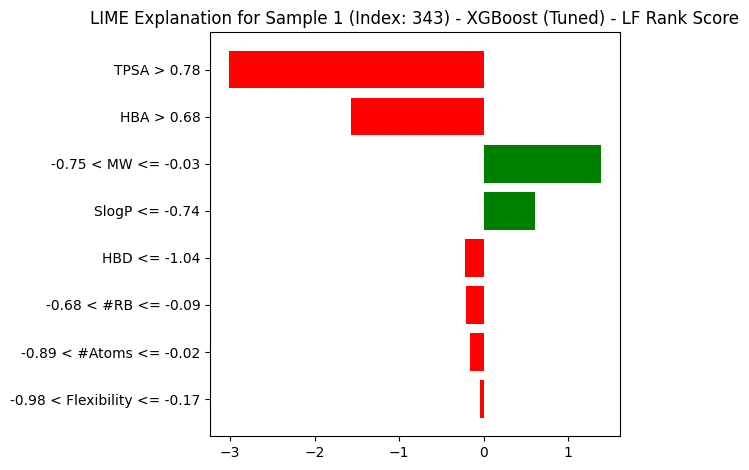


  - Sample 2 (Index: 33):
    True LF Rank Score: -2.9114, Predicted LF Rank Score: -3.2315
    Explanation:
      - TPSA <= -0.80: 2.2002
      - HBA <= -0.69: 1.5172
      - -0.75 < MW <= -0.03: 1.4196
      - #RB <= -0.68: 0.9663
      - Flexibility <= -0.98: -0.5614
      - SlogP > 0.62: -0.2340
      - HBD <= -1.04: -0.2130
      - -0.89 < #Atoms <= -0.02: 0.0412


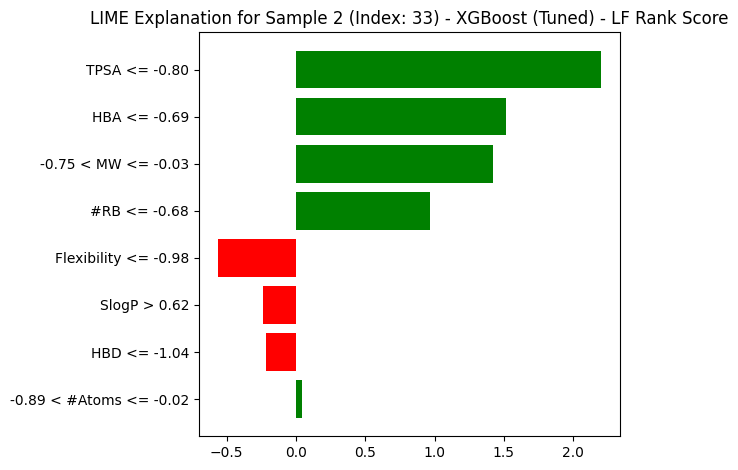


  - Sample 3 (Index: 15):
    True LF Rank Score: -1.6762, Predicted LF Rank Score: -2.2539
    Explanation:
      - TPSA <= -0.80: 2.3971
      - HBA <= -0.69: 1.7079
      - -0.75 < MW <= -0.03: 1.2923
      - #RB <= -0.68: 0.8805
      - HBD <= -1.04: -0.2167
      - -0.89 < #Atoms <= -0.02: -0.1672
      - -0.98 < Flexibility <= -0.17: 0.0303
      - -0.11 < SlogP <= 0.62: 0.0283


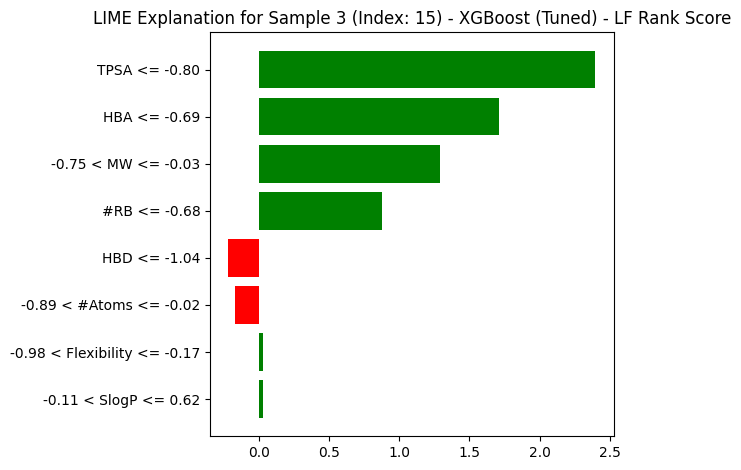


Explaining predictions for XGBoost (Tuned) - LF dG using LIME:

  - Sample 1 (Index: 343):
    True LF dG: -12.9521, Predicted LF dG: -13.1859
    Explanation:
      - HBA > 0.68: -4.7984
      - TPSA > 0.78: -1.7302
      - SlogP <= -0.74: -0.9993
      - -0.89 < #Atoms <= -0.02: 0.4264
      - -0.75 < MW <= -0.03: 0.3712
      - -0.98 < Flexibility <= -0.17: 0.2552
      - HBD <= -1.04: 0.2094
      - -0.68 < #RB <= -0.09: -0.0078


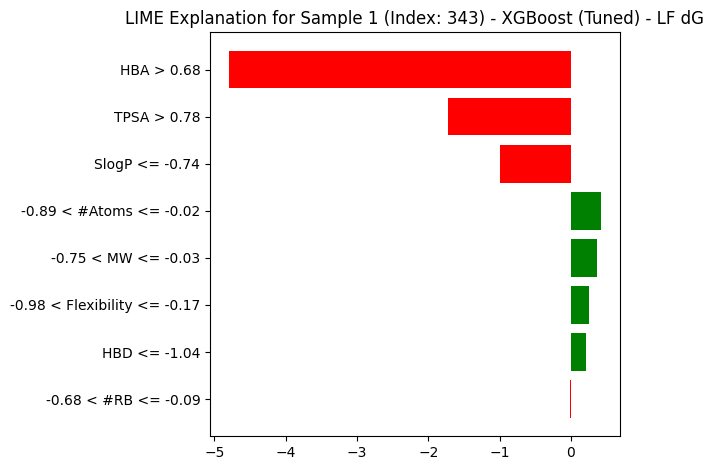


  - Sample 2 (Index: 33):
    True LF dG: 5.6747, Predicted LF dG: 2.8447
    Explanation:
      - HBA <= -0.69: 5.8192
      - TPSA <= -0.80: 1.4897
      - SlogP > 0.62: 1.2658
      - -0.89 < #Atoms <= -0.02: 0.5190
      - #RB <= -0.68: -0.4262
      - Flexibility <= -0.98: 0.2991
      - -0.75 < MW <= -0.03: 0.2628
      - HBD <= -1.04: 0.1101


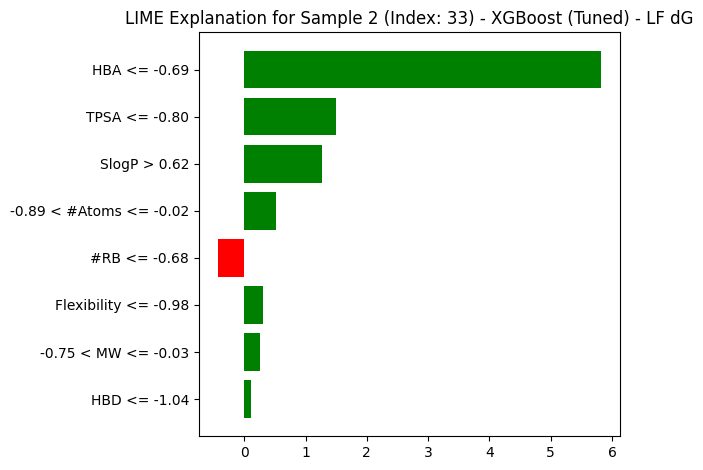


  - Sample 3 (Index: 15):
    True LF dG: 0.2501, Predicted LF dG: 0.6405
    Explanation:
      - HBA <= -0.69: 5.8022
      - TPSA <= -0.80: 1.4429
      - -0.11 < SlogP <= 0.62: 0.5673
      - -0.89 < #Atoms <= -0.02: 0.5393
      - #RB <= -0.68: -0.4160
      - -0.75 < MW <= -0.03: 0.2289
      - -0.98 < Flexibility <= -0.17: 0.1518
      - HBD <= -1.04: 0.0829


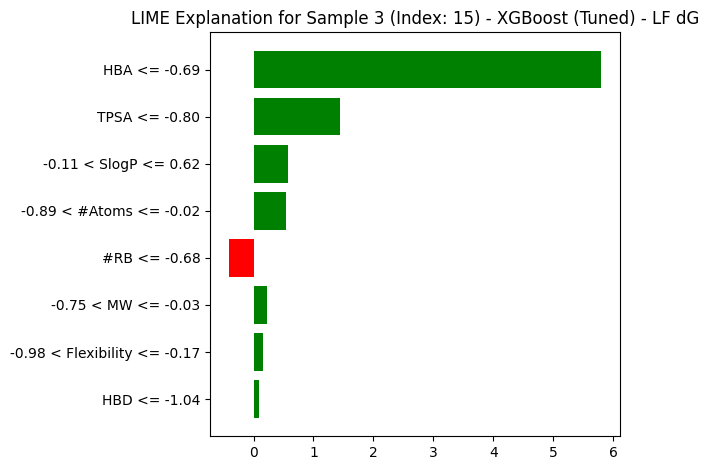


Explaining predictions for XGBoost (Tuned) - LF VSscore using LIME:

  - Sample 1 (Index: 343):
    True LF VSscore: -1.0129, Predicted LF VSscore: -0.0683
    Explanation:
      - SlogP <= -0.74: 2.1621
      - HBD <= -1.04: 1.7460
      - TPSA > 0.78: 1.0960
      - -0.75 < MW <= -0.03: 0.9229
      - -0.89 < #Atoms <= -0.02: 0.7249
      - HBA > 0.68: 0.6239
      - -0.98 < Flexibility <= -0.17: 0.6034
      - -0.68 < #RB <= -0.09: 0.1583


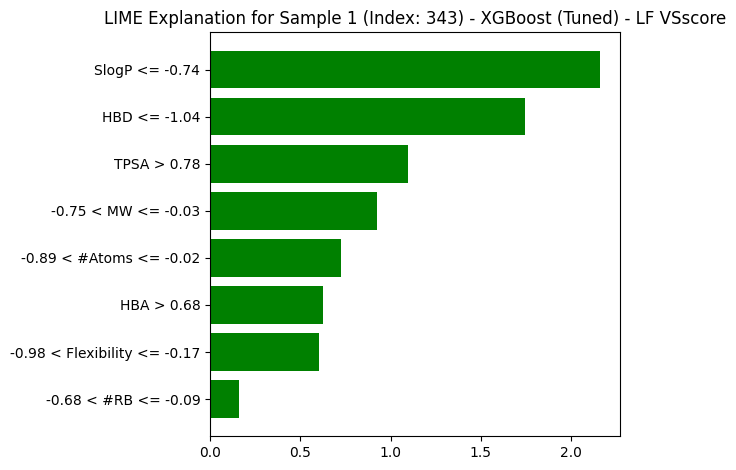


  - Sample 2 (Index: 33):
    True LF VSscore: -5.9455, Predicted LF VSscore: -4.4992
    Explanation:
      - SlogP > 0.62: -2.6568
      - HBD <= -1.04: 1.9116
      - #RB <= -0.68: 1.1215
      - Flexibility <= -0.98: 1.1047
      - -0.75 < MW <= -0.03: 0.9475
      - TPSA <= -0.80: -0.7825
      - -0.89 < #Atoms <= -0.02: 0.5708
      - HBA <= -0.69: -0.5239


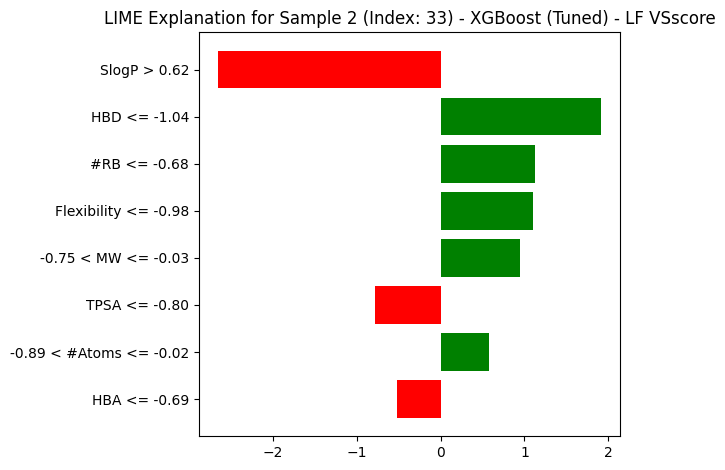


  - Sample 3 (Index: 15):
    True LF VSscore: -4.7032, Predicted LF VSscore: -4.9351
    Explanation:
      - HBD <= -1.04: 1.7305
      - -0.75 < MW <= -0.03: 0.9781
      - #RB <= -0.68: 0.9337
      - -0.89 < #Atoms <= -0.02: 0.6355
      - TPSA <= -0.80: -0.6323
      - -0.98 < Flexibility <= -0.17: 0.5712
      - HBA <= -0.69: -0.5037
      - -0.11 < SlogP <= 0.62: -0.2690


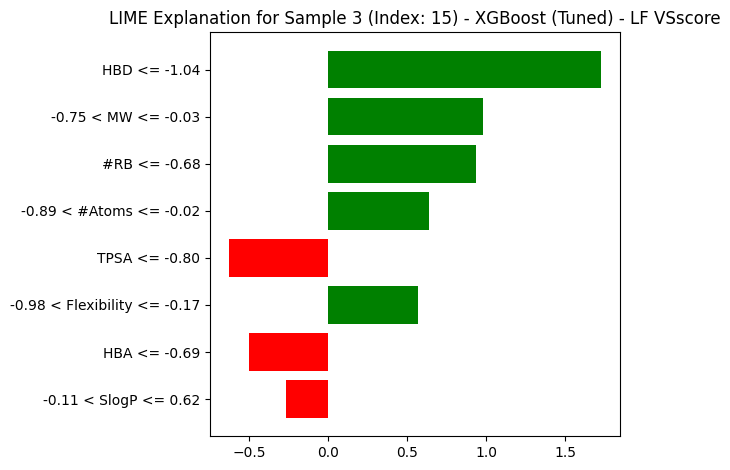


Explaining predictions for XGBoost (Tuned) - LF LE using LIME:

  - Sample 1 (Index: 343):
    True LF LE: -0.0946, Predicted LF LE: -0.0756
    Explanation:
      - SlogP <= -0.74: 0.0889
      - TPSA > 0.78: 0.0198
      - -0.89 < #Atoms <= -0.02: 0.0157
      - HBD <= -1.04: 0.0143
      - -0.75 < MW <= -0.03: -0.0122
      - -0.68 < #RB <= -0.09: -0.0077
      - -0.98 < Flexibility <= -0.17: 0.0069
      - HBA > 0.68: -0.0059


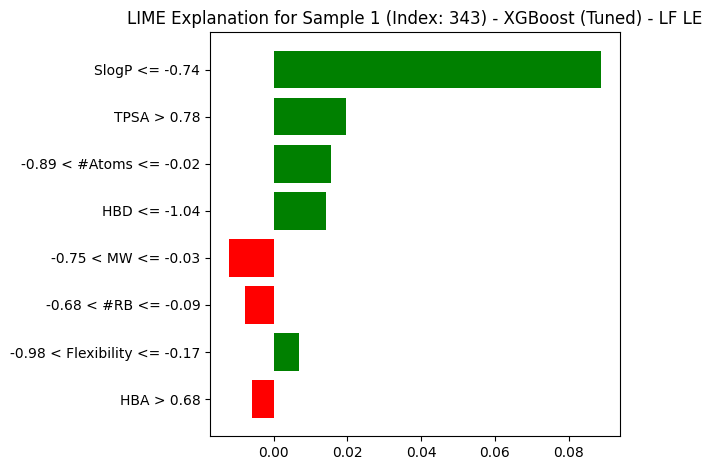


  - Sample 2 (Index: 33):
    True LF LE: -0.3102, Predicted LF LE: -0.2749
    Explanation:
      - SlogP > 0.62: -0.1080
      - TPSA <= -0.80: -0.0262
      - Flexibility <= -0.98: 0.0247
      - #RB <= -0.68: 0.0193
      - -0.89 < #Atoms <= -0.02: 0.0168
      - HBD <= -1.04: 0.0144
      - -0.75 < MW <= -0.03: -0.0125
      - HBA <= -0.69: 0.0092


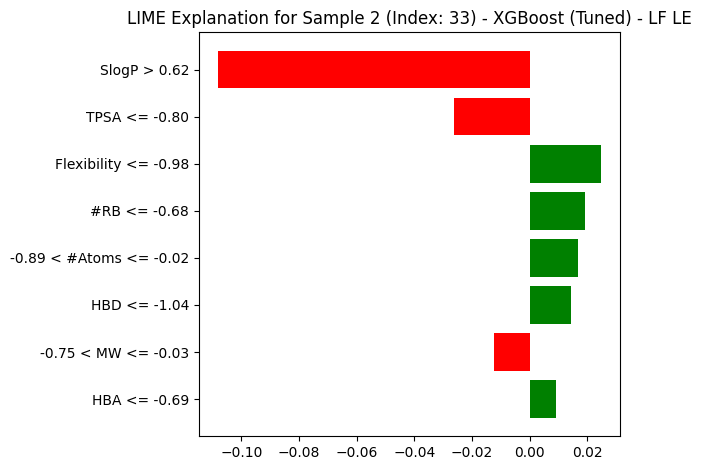


  - Sample 3 (Index: 15):
    True LF LE: -0.1988, Predicted LF LE: -0.2074
    Explanation:
      - TPSA <= -0.80: -0.0215
      - #RB <= -0.68: 0.0196
      - -0.11 < SlogP <= 0.62: -0.0183
      - -0.89 < #Atoms <= -0.02: 0.0153
      - HBD <= -1.04: 0.0116
      - HBA <= -0.69: 0.0106
      - -0.75 < MW <= -0.03: -0.0103
      - -0.98 < Flexibility <= -0.17: 0.0100


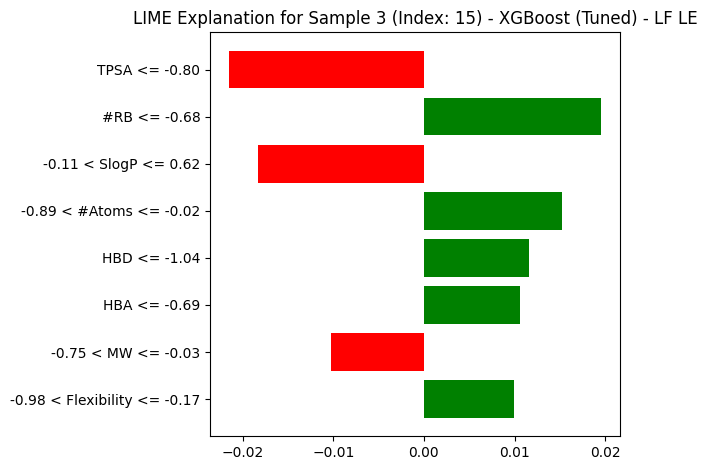


Explaining predictions for Neural Network (Tuned) using LIME:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step

  - Sample 1 (Index: 343):
    True Values: {'LF Rank Score': -13.33449735481988, 'LF dG': -12.95208941208267, 'LF VSscore': -1.012931487670597, 'LF LE': -0.09458705909356671}, Predicted Values: [-15.3258 -13.2731  -0.5548  -0.123 ]

    Explaining for Target: LF Rank Score
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    Explanation:
      - TPSA > 0.78: -4.5484
      - HBA > 0.68: -1.9022
      - -0.75 < MW <= -0.03: 1.1571
      - SlogP <= -0.74: 0.8077
      - -0.98 < Flexibility <= -0.17: -0.3322
      - -0.89 < #Atoms <= -0.02: -0.1478
      - HBD <= -1.04: -0.1403
      - -0.68 < #RB <= -0.09: -0.0886


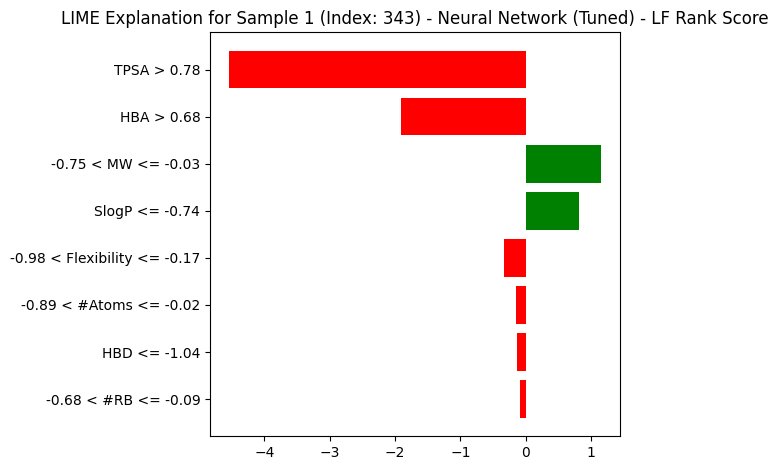


    Explaining for Target: LF dG
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
    Explanation:
      - HBA > 0.68: -3.4262
      - SlogP <= -0.74: -3.1254
      - TPSA > 0.78: -2.4027
      - -0.89 < #Atoms <= -0.02: 0.9118
      - -0.75 < MW <= -0.03: 0.5431
      - -0.98 < Flexibility <= -0.17: 0.5263
      - HBD <= -1.04: 0.2305
      - -0.68 < #RB <= -0.09: 0.1489


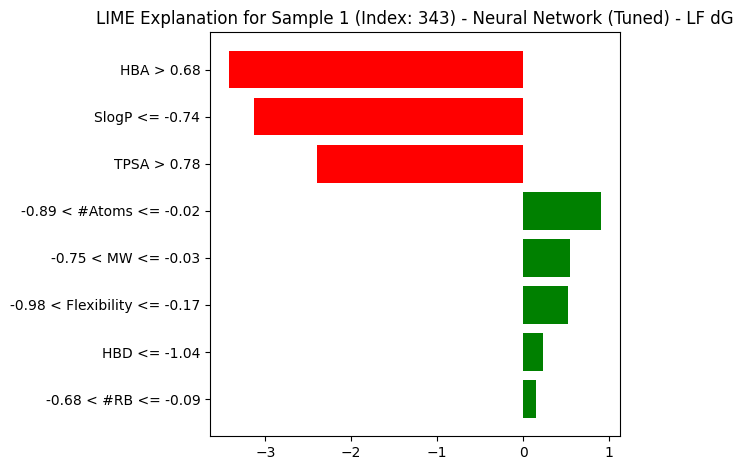


    Explaining for Target: LF VSscore
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
    Explanation:
      - SlogP <= -0.74: 2.0650
      - TPSA > 0.78: 0.9432
      - HBD <= -1.04: 0.9201
      - -0.89 < #Atoms <= -0.02: 0.8966
      - -0.98 < Flexibility <= -0.17: 0.6579
      - -0.75 < MW <= -0.03: 0.6051
      - HBA > 0.68: 0.3232
      - -0.68 < #RB <= -0.09: 0.0874


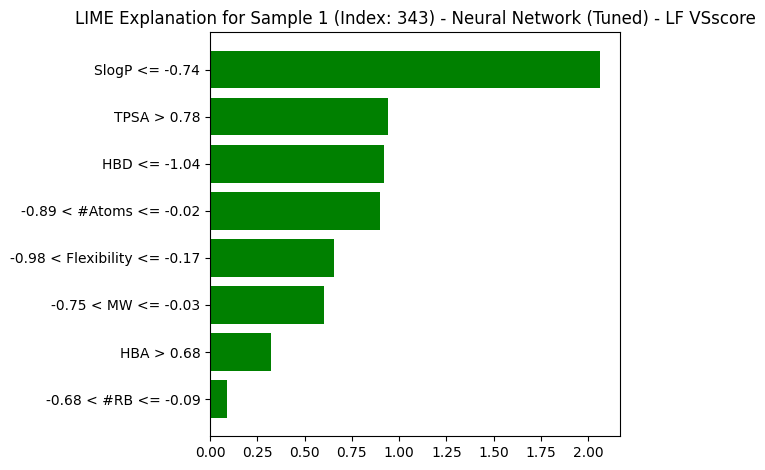


    Explaining for Target: LF LE
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
    Explanation:
      - -0.89 < #Atoms <= -0.02: 0.0580
      - SlogP <= -0.74: 0.0481
      - HBA > 0.68: -0.0357
      - -0.75 < MW <= -0.03: -0.0270
      - -0.68 < #RB <= -0.09: 0.0214
      - HBD <= -1.04: -0.0112
      - -0.98 < Flexibility <= -0.17: 0.0094
      - TPSA > 0.78: -0.0042


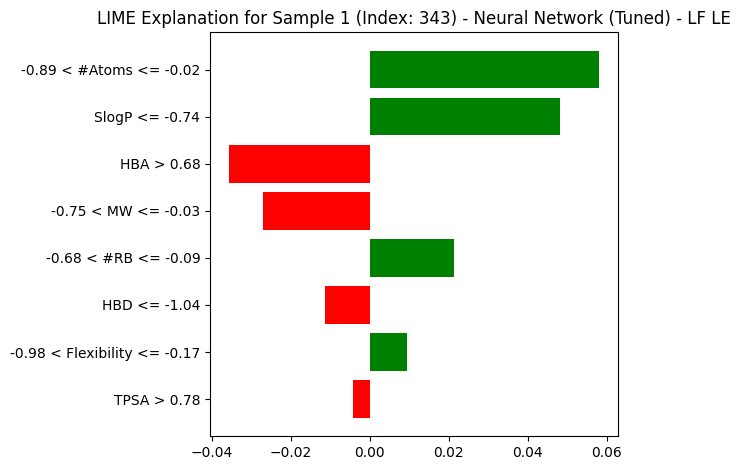

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

  - Sample 2 (Index: 33):
    True Values: {'LF Rank Score': -2.911420214495224, 'LF dG': 5.674702257399753, 'LF VSscore': -5.945510660883494, 'LF LE': -0.3101962567525667}, Predicted Values: [-2.1207  4.3847 -5.3128 -0.1927]

    Explaining for Target: LF Rank Score
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
    Explanation:
      - TPSA <= -0.80: 3.6321
      - #RB <= -0.68: 2.0479
      - HBA <= -0.69: 1.5738
      - SlogP > 0.62: -1.3810
      - -0.75 < MW <= -0.03: 1.3284
      - Flexibility <= -0.98: -1.0533
      - -0.89 < #Atoms <= -0.02: -0.0446
      - HBD <= -1.04: -0.0198


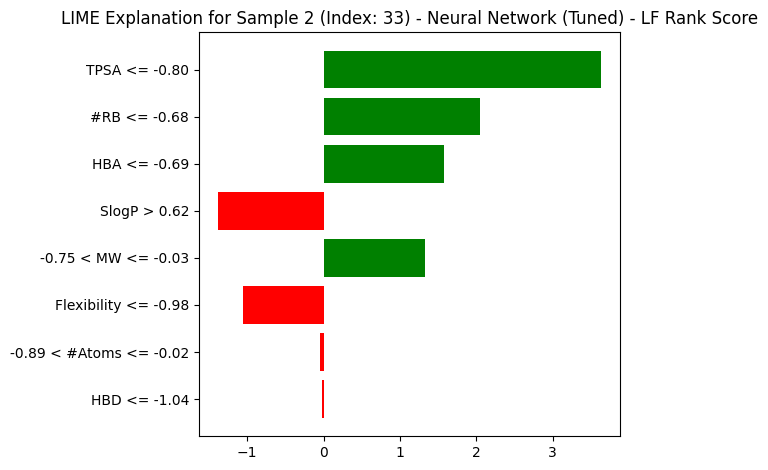


    Explaining for Target: LF dG
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
    Explanation:
      - SlogP > 0.62: 3.3873
      - HBA <= -0.69: 2.8285
      - TPSA <= -0.80: 1.8634
      - #RB <= -0.68: -1.0385
      - -0.89 < #Atoms <= -0.02: 0.8641
      - Flexibility <= -0.98: 0.6845
      - -0.75 < MW <= -0.03: 0.5360
      - HBD <= -1.04: 0.1406


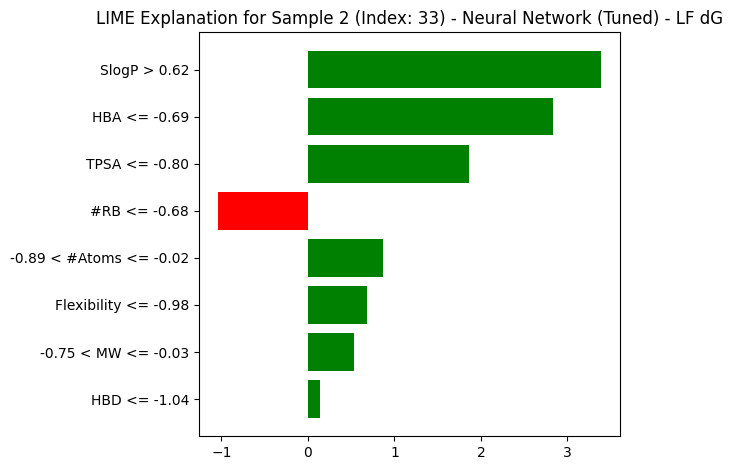


    Explaining for Target: LF VSscore
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
    Explanation:
      - SlogP > 0.62: -2.7211
      - Flexibility <= -0.98: 1.1265
      - TPSA <= -0.80: -0.9833
      - #RB <= -0.68: 0.9506
      - HBD <= -1.04: 0.9438
      - -0.75 < MW <= -0.03: 0.7505
      - -0.89 < #Atoms <= -0.02: 0.7482
      - HBA <= -0.69: -0.5972


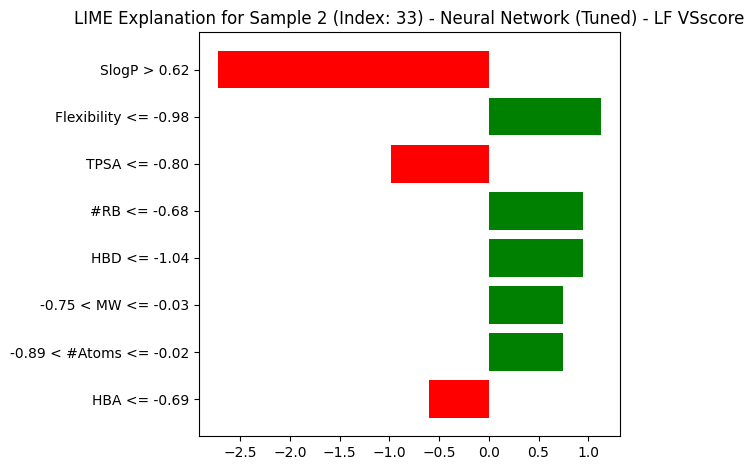


    Explaining for Target: LF LE
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
    Explanation:
      - SlogP > 0.62: -0.1223
      - HBA <= -0.69: 0.0584
      - -0.89 < #Atoms <= -0.02: 0.0567
      - #RB <= -0.68: 0.0272
      - -0.75 < MW <= -0.03: -0.0228
      - HBD <= -1.04: 0.0054
      - TPSA <= -0.80: 0.0051
      - Flexibility <= -0.98: 0.0003


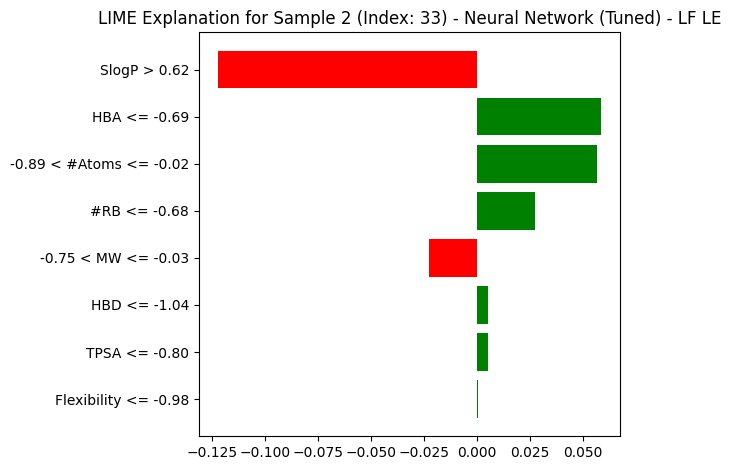

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

  - Sample 3 (Index: 15):
    True Values: {'LF Rank Score': -1.676238791373946, 'LF dG': 0.2500585264445352, 'LF VSscore': -4.703206040904548, 'LF LE': -0.198783616001375}, Predicted Values: [-1.5713 -0.1331 -4.8902 -0.2323]

    Explaining for Target: LF Rank Score
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
    Explanation:
      - TPSA <= -0.80: 3.6458
      - #RB <= -0.68: 2.0015
      - HBA <= -0.69: 1.5859
      - -0.75 < MW <= -0.03: 1.2119
      - -0.98 < Flexibility <= -0.17: -0.3088
      - -0.11 < SlogP <= 0.62: 0.1787
      - -0.89 < #Atoms <= -0.02: 0.0328
      - HBD <= -1.04: 0.0013


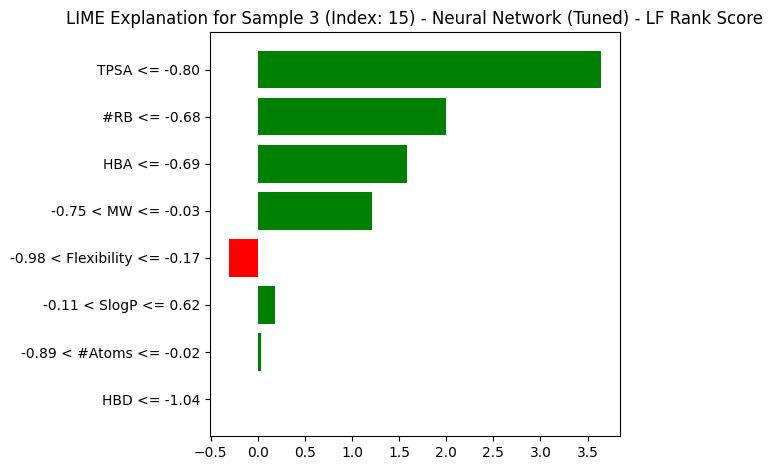


    Explaining for Target: LF dG
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
    Explanation:
      - HBA <= -0.69: 2.9129
      - TPSA <= -0.80: 1.6622
      - #RB <= -0.68: -1.0583
      - -0.11 < SlogP <= 0.62: 0.7753
      - -0.89 < #Atoms <= -0.02: 0.7034
      - -0.98 < Flexibility <= -0.17: 0.4571
      - -0.75 < MW <= -0.03: 0.3485
      - HBD <= -1.04: 0.1907


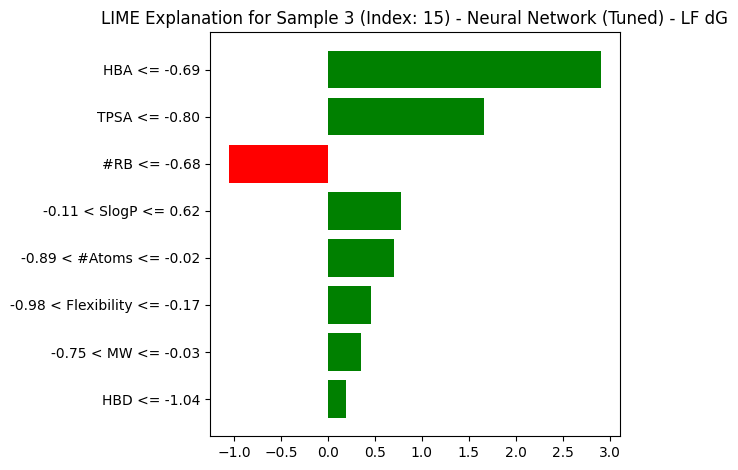


    Explaining for Target: LF VSscore
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
    Explanation:
      - #RB <= -0.68: 1.0378
      - TPSA <= -0.80: -0.9818
      - -0.89 < #Atoms <= -0.02: 0.8237
      - HBD <= -1.04: 0.7042
      - -0.75 < MW <= -0.03: 0.6694
      - -0.98 < Flexibility <= -0.17: 0.5801
      - HBA <= -0.69: -0.3396
      - -0.11 < SlogP <= 0.62: -0.2357


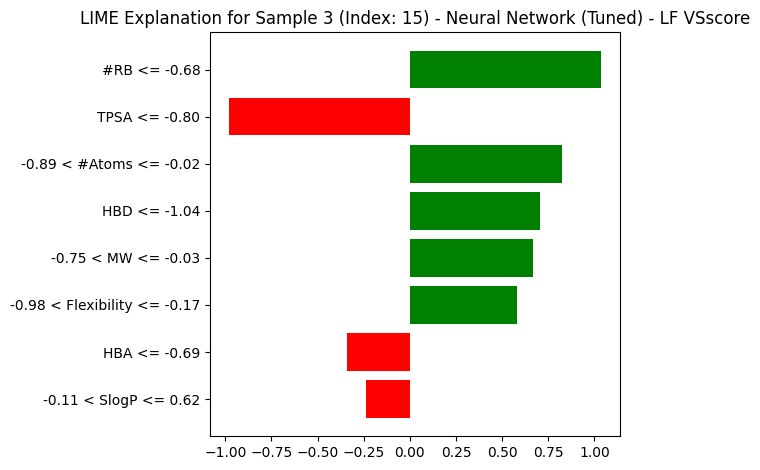


    Explaining for Target: LF LE
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
    Explanation:
      - HBA <= -0.69: 0.0559
      - -0.89 < #Atoms <= -0.02: 0.0554
      - #RB <= -0.68: 0.0228
      - -0.75 < MW <= -0.03: -0.0199
      - -0.98 < Flexibility <= -0.17: 0.0131
      - -0.11 < SlogP <= 0.62: 0.0092
      - TPSA <= -0.80: 0.0074
      - HBD <= -1.04: -0.0004


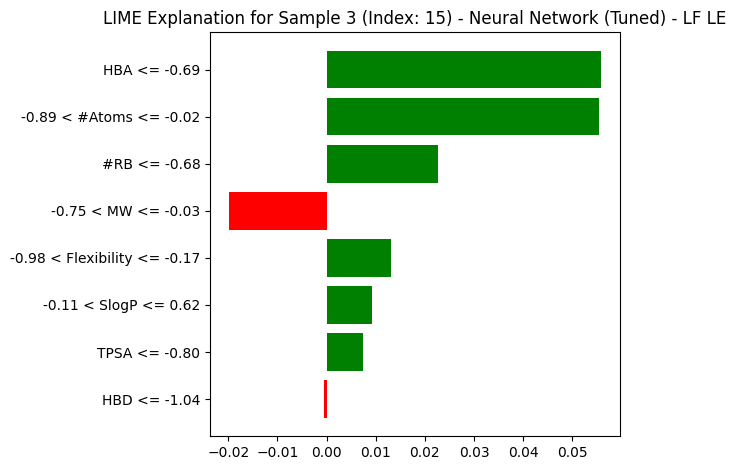

In [29]:
from lime import lime_tabular
import numpy as np
import matplotlib.pyplot as plt # Import matplotlib for plotting
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Create a LIME explainer for each tuned XGBoost model AND the tuned Neural Network model
# Use clearer names for the models
models_to_explain = {}
for target, model in best_xgb_models.items():
    models_to_explain[f'XGBoost (Tuned) - {target}'] = model
models_to_explain['Neural Network (Tuned)'] = best_nn_model


# LIME explainer works on the training data distribution
lime_explainer = {}
for model_name, model in models_to_explain.items():
    print(f"Creating LIME explainer for {model_name}")
    # For multi-output Keras models, LIME needs a predict_fn that returns probabilities/scores for all outputs
    # In regression, this is usually the direct output of the model
    # The predict_fn should accept a numpy array and return a numpy array
    # For single-output models (like each of our XGBoost models), the predict method is already suitable
    if 'Neural Network' in model_name:
         predict_fn = lambda x: model.predict(x)
    else:
        # For XGBoost models, the predict method is suitable
        predict_fn = model.predict


    lime_explainer[model_name] = lime_tabular.LimeTabularExplainer(
        training_data=X_train.values,
        feature_names=X_train.columns.tolist(),
        mode='regression'
    )


# Explain the predictions for a few specific test samples (e.g., the first 3 samples in the test set)
num_samples_to_explain = 3
for model_name, model in models_to_explain.items():
    print(f"\nExplaining predictions for {model_name} using LIME:")
    for i in range(num_samples_to_explain):
        sample = X_test.iloc[i]

        if 'Neural Network' in model_name:
            # For multi-output NN, we get predictions for all targets at once
            predicted_values = model.predict(sample.values.reshape(1, -1))[0]
            true_values = y_test.iloc[i]
            print(f"\n  - Sample {i+1} (Index: {X_test.index[i]}):")
            print(f"    True Values: {true_values.to_dict()}, Predicted Values: {predicted_values.round(4)}")

            # Explain for each target in the multi-output NN
            for j, target in enumerate(y_test.columns):
                 print(f"\n    Explaining for Target: {target}")
                 # Create a predict function specifically for this target
                 predict_fn_target = lambda x: model.predict(x)[:, j]
                 explanation = lime_tabular.LimeTabularExplainer(
                     training_data=X_train.values,
                     feature_names=X_train.columns.tolist(),
                     mode='regression'
                 ).explain_instance(
                     data_row=sample.values,
                     predict_fn=predict_fn_target,
                     num_features=len(X_test.columns)
                 )
                 print("    Explanation:")
                 for reason, weight in explanation.as_list():
                     print(f"      - {reason}: {weight:.4f}")

                 explanation.as_pyplot_figure()
                 plt.title(f"LIME Explanation for Sample {i+1} (Index: {X_test.index[i]}) - {model_name} - {target}")
                 plt.tight_layout()
                 plt.show()

        else: # For XGBoost models (and other single-output regressors if added)
            # Extract the target name from the model_name for XGBoost
            parts = model_name.split(' - ')
            xgb_model_base_name = parts[0] # e.g., 'XGBoost (Tuned)'
            target = parts[1] # e.g., 'LF Rank Score'

            true_value = y_test.iloc[i][target]
            predicted_value = model.predict(sample.values.reshape(1, -1))[0]


            print(f"\n  - Sample {i+1} (Index: {X_test.index[i]}):")
            print(f"    True {target}: {true_value:.4f}, Predicted {target}: {predicted_value:.4f}")

            # Explain the prediction for the current sample using the pre-created explainer
            explanation = lime_explainer[model_name].explain_instance(
                data_row=sample.values,
                predict_fn=model.predict,
                num_features=len(X_test.columns) # Explain all features
            )

            # Display the explanation
            print("    Explanation:")
            for reason, weight in explanation.as_list():
                print(f"      - {reason}: {weight:.4f}")

            # Visualize the explanation
            explanation.as_pyplot_figure()
            # Modified title to include model_name and target
            plt.title(f"LIME Explanation for Sample {i+1} (Index: {X_test.index[i]}) - {xgb_model_base_name} - {target}")
            plt.tight_layout()
            plt.show()

In [30]:
import joblib
import os

# Define the directory to save the models
save_directory = '/content/tuned_models/'
os.makedirs(save_directory, exist_ok=True)

# Dictionary of models to save (including single models and the dict of XGBoost models)
all_tuned_models = {
    'RandomForest_Tuned': best_rf_model,
    'DecisionTree_Tuned': best_dt_model,
    'NeuralNetwork_Tuned': best_nn_model
}

# Add each tuned XGBoost model individually
for target, xgb_model in best_xgb_models.items():
    # Sanitize target name for filename
    safe_target_name = target.replace(' ', '_').replace('#', 'Num').replace('-', '_')
    all_tuned_models[f'XGBoost_Tuned_{safe_target_name}'] = xgb_model


print("Saving all tuned models...")
for model_name, model in all_tuned_models.items():
    # Define the save path for the current model
    save_path = os.path.join(save_directory, f'{model_name}.pkl')

    try:
        joblib.dump(model, save_path)
        print(f"Model '{model_name}' successfully saved to {save_path}")
    except Exception as e:
        print(f"An error occurred while saving model '{model_name}': {e}")

print("\nAll specified models have been processed.")

Saving all tuned models...
Model 'RandomForest_Tuned' successfully saved to /content/tuned_models/RandomForest_Tuned.pkl
Model 'DecisionTree_Tuned' successfully saved to /content/tuned_models/DecisionTree_Tuned.pkl
Model 'NeuralNetwork_Tuned' successfully saved to /content/tuned_models/NeuralNetwork_Tuned.pkl
Model 'XGBoost_Tuned_LF_Rank_Score' successfully saved to /content/tuned_models/XGBoost_Tuned_LF_Rank_Score.pkl
Model 'XGBoost_Tuned_LF_dG' successfully saved to /content/tuned_models/XGBoost_Tuned_LF_dG.pkl
Model 'XGBoost_Tuned_LF_VSscore' successfully saved to /content/tuned_models/XGBoost_Tuned_LF_VSscore.pkl
Model 'XGBoost_Tuned_LF_LE' successfully saved to /content/tuned_models/XGBoost_Tuned_LF_LE.pkl

All specified models have been processed.


# **Comprehensive Summary of Analysis**

Based on the evaluation metrics from the tuned models, the **Neural Network (Tuned)** model appears to be the best-performing algorithm overall for predicting the docking scores, achieving the highest R² values for LF Rank Score, LF dG, and LF VSscore, and a competitive R² for LF LE. The **tuned XGBoost models** also performed exceptionally well, particularly for LF LE, and are strong contenders, showing very high R² values across all targets.

Here's a summary of what we've done:

1.  **Data Preprocessing:**
    *   Loaded the data from the Excel file.
    *   Cleaned and selected relevant molecular property and docking score columns.
    *   Identified and removed outliers using the IQR method.
    *   Scaled the features using `StandardScaler`.
    *   Split the data into training and testing sets.

2.  **Initial Regression Analysis:**
    *   Performed Simple Linear Regression (SLR) for each molecular property against each docking score to understand individual relationships.
    *   Generated a correlation matrix and plots to visualize these relationships.
    *   Performed Multiple Linear Regression (MLR) using all molecular properties to predict each docking score, providing a combined effect analysis.
    *   Interpreted the coefficients, p-values, and R² values from both SLR and MLR.

3.  **Advanced Model Training and Evaluation:**
    *   Trained and evaluated other regression models: Random Forest, Decision Tree, XGBoost, and a Neural Network.
    *   Evaluated the initial models using Mean Squared Error (MSE) and R-squared (R²).

4.  **Hyperparameter Tuning:**
    *   Performed hyperparameter tuning using GridSearchCV for Random Forest, Decision Tree, and XGBoost models to find the best model configurations.
    *   Manually tuned the Neural Network model with different parameter combinations and early stopping.

5.  **Tuned Model Re-evaluation and Comparison:**
    *   Re-evaluated all tuned models on the test set using MSE, R², and Mean Absolute Error (MAE).
    *   Compared the performance of all tuned models side-by-side in a table to identify the best performers for each target.

**Tuned Model Performance Comparison:**

| Model                  | Target        |        MSE |       R² |       MAE |
|:-----------------------|:--------------|-----------:|---------:|----------:|
| XGBoost (Tuned)        | LF LE         | 0.00032169 | 0.953846 | 0.0140208 |
| Random Forest (Tuned)  | LF LE         | 0.00119249 | 0.828909 | 0.0255981 |
| Neural Network (Tuned) | LF LE         | 0.00154246 | 0.778698 | 0.0302593 |
| Decision Tree (Tuned)  | LF LE         | 0.00171504 | 0.753937 | 0.0289826 |
| Neural Network (Tuned) | LF Rank Score | 0.294599   | 0.984172 | 0.448885  |
| XGBoost (Tuned)        | LF Rank Score | 0.529232   | 0.971566 | 0.557280  |
| Random Forest (Tuned)  | LF Rank Score | 1.071953   | 0.942408 | 0.710242  |
| Decision Tree (Tuned)  | LF Rank Score | 2.264528   | 0.878335 | 1.055187  |
| Neural Network (Tuned) | LF VSscore    | 0.293103   | 0.988257 | 0.457173  |
| XGBoost (Tuned)        | LF VSscore    | 0.551744   | 0.977895 | 0.567916  |
| Random Forest (Tuned)  | LF VSscore    | 1.925741   | 0.922846 | 1.071282  |
| Decision Tree (Tuned)  | LF VSscore    | 3.089934   | 0.876203 | 1.289588  |
| Neural Network (Tuned) | LF dG         | 0.428886   | 0.983150 | 0.474108  |
| XGBoost (Tuned)        | LF dG         | 0.719724   | 0.971723 | 0.623457  |
| Random Forest (Tuned)  | LF dG         | 1.011586   | 0.960257 | 0.676723  |
| Decision Tree (Tuned)  | LF dG         | 1.789977   | 0.929675 | 1.003023  |


6.  **Model Explainability (Local Insights):**
    *   Used LIME (Local Interpretable Model-agnostic Explanations) to understand the feature contributions to individual predictions for both the tuned XGBoost models (per target) and the tuned Neural Network model.
    *   Visualized the LIME explanations for selected samples.

7.  **Model Saving:**
    *   Demonstrated how to save individual models and saved all tuned models to `.pkl` files using `joblib` for future use.

**Key Insights from the Analysis:**

*   **Model Performance:** Both the tuned Neural Network and tuned XGBoost models achieved very high predictive performance (high R²) for the docking scores, significantly outperforming the simple and multiple linear regression models. The Neural Network showed slightly better performance for most targets.
*   **Local Feature Contributions (from LIME):** The LIME analysis provided molecule-specific insights, showing how different molecular properties contribute positively or negatively to the predicted docking score for a given compound. This local interpretability is valuable for understanding individual predictions and potentially guiding molecular design.
*   **Predictive Power of Molecular Descriptors:** The analysis confirms that the selected molecular properties are strong predictors of the docking scores, highlighting their relevance in computational drug discovery or materials science contexts.

This comprehensive analysis, from initial data preprocessing and linear modeling to advanced machine learning, tuning, and explainability, provides a  understanding of the relationships between molecular properties and docking scores and identifies high-performing predictive models.